
# 🐍 Análisis de Reptiles y Anfibios de México con Ciencia de Datos

**Proyecto final del Diplomado en Ciencia de Datos – UNAM DGTIC**

- **Autor:** Erik Manuel Barajas Torres  
- **Fecha de entrega:** 14/05/2025  
- **Emisión:** 10  
- **Entorno de trabajo:** Google Colab

---

Este proyecto analiza los registros de reptiles y anfibios de México utilizando técnicas de ciencia de datos. Se aplicó limpieza y codificación de datos, reducción de dimensionalidad con PCA, clustering (KMeans y DBSCAN), modelado de series de tiempo con Prophet, y modelos supervisados para clasificación y regresión. Además, se realizaron análisis geográficos y validación de hipótesis para identificar zonas y especies prioritarias en conservación.


In [1]:
!pip install mlxtend
!pip install prophet
!pip install yellowbrick
!pip install panel plotly
!pip install jupyter_bokeh --quiet
!pip install panel plotly --quiet

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.stats import ttest_ind
from xgboost import XGBRegressor
from prophet import Prophet

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import panel as pn

pn.extension('plotly')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Limpieza y preparación de datos
Se cargó el archivo original de CONABIO y se realizó limpieza eliminando columnas con más del 70–90% de nulos. Se homogenizaron valores categóricos en las columnas `nom059`, `iucn`, `cites`, `ambiente`, `validacionambiente` y `endemismo`, y se filtraron los registros desde 1950 en adelante. También se eliminaron columnas irrelevantes como latitud/longitud, ya que no aportaban valor directo al análisis de series ni al PCA.


In [3]:

df = pd.read_excel('/content/drive/MyDrive/ciencia_datos/notebook/RepAnf_Proyecto.xlsx')
df.head()

grupobio                                        subgrupobio familiavalida  \
0  Reptiles  boas, cobras, coralillos, culebras, pitones, s...     Viperidae   
1  Reptiles  boas, cobras, coralillos, culebras, pitones, s...     Viperidae   
2  Reptiles  boas, cobras, coralillos, culebras, pitones, s...    Colubridae   
3  Reptiles  boas, cobras, coralillos, culebras, pitones, s...    Colubridae   
4  Reptiles  boas, cobras, coralillos, culebras, pitones, s...    Natricidae   

   generovalido         especievalida nom059 cites                      iucn  \
0      Crotalus     Crotalus cerastes    NaN   NaN  PreocupaciÃ³n menor (LC)   
1      Crotalus      Crotalus viridis    NaN   NaN  PreocupaciÃ³n menor (LC)   
2  Lampropeltis   Lampropeltis getula    NaN   NaN                       NaN   
3  Lampropeltis   Lampropeltis getula    NaN   NaN                       NaN   
4    Thamnophis  Thamnophis marcianus    NaN   NaN  PreocupaciÃ³n menor (LC)   

  prioritaria exoticainvasora  ...  aniocolecta  tipo ejemplarfosil proyecto  \
0         NaN             NaN  ...         1960   NaN           NaN    JM001   
1         NaN             NaN  ...         1911   NaN           NaN    JM001   
2         NaN             NaN  ...           \N   NaN           NaN    JM001   
3         NaN             NaN  ...           \N   NaN           NaN    JM001   
4         NaN             NaN  ...           \N   NaN           NaN    JM001   

                                        formadecitar licenciauso  \
0  RamÃ­rez-Bautista A. 2018. DistribuciÃ³n poten...   CC_BY_4_0   
1  RamÃ­rez-Bautista A. 2018. DistribuciÃ³n poten...   CC_BY_4_0   
2  RamÃ­rez-Bautista A. 2018. DistribuciÃ³n poten...   CC_BY_4_0   
3  RamÃ­rez-Bautista A. 2018. DistribuciÃ³n poten...   CC_BY_4_0   
4  RamÃ­rez-Bautista A. 2018. DistribuciÃ³n poten...   CC_BY_4_0   

                                         urlproyecto urlorigen  obsusoinfo  \
0  http://www.snib.mx/proyectos/cgi-bin/datos2.cg...       NaN         NaN   
1  http://www.snib.mx/proyectos/cgi-bin/datos2.cg...       NaN         NaN   
2  http://www.snib.mx/proyectos/cgi-bin/datos2.cg...       NaN         NaN   
3  http://www.snib.mx/proyectos/cgi-bin/datos2.cg...       NaN         NaN   
4  http://www.snib.mx/proyectos/cgi-bin/datos2.cg...       NaN         NaN   

   version  
0  2024-12  
1  2024-12  
2  2024-12  
3  2024-12  
4  2024-12  

[5 rows x 98 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743879 entries, 0 to 743878
Data columns (total 98 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   grupobio                      743879 non-null  object        
 1   subgrupobio                   743587 non-null  object        
 2   familiavalida                 735931 non-null  object        
 3   generovalido                  733070 non-null  object        
 4   especievalida                 724388 non-null  object        
 5   nom059                        309269 non-null  object        
 6   cites                         86406 non-null   object        
 7   iucn                          686706 non-null  object        
 8   prioritaria                   63188 non-null   object        
 9   exoticainvasora               12219 non-null   object        
 10  longitud                      743879 non-null  float64       
 11  latitud      

In [5]:
# Verificaré cuáles columnas tienen nulos, y que no aportan a mi base, para poder excluirlas o en su defecto, eliminarlas
print(df.isnull().sum().sort_values(ascending=False).to_string())


categoriaresidenciaaves         743879
formadecrecimiento              743879
categoriainfraespecie2valida    743879
taxonextinto                    743848
categoriainfraespecie2          743824
calificadordeterminacion        743488
ejemplarfosil                   742726
probablelocnodecampo            737332
tipo                            736848
exoticainvasora                 731660
obsusoinfo                      723859
mt24nombremunicipiomapa         714115
mt24nombreestadomapa            714105
mt24clavemunicipiomapa          714104
mt24claveestadomapa             714104
categoriainfraespecievalida     691022
nivelprioridad                  680691
prioritaria                     680691
categoriainfraespecie           658850
cites                           657473
endemismo                       493455
determinador                    436010
nom059                          434610
fechadeterminacion              411487
urlproyecto                     410285
anp                      

In [6]:
#Elimino las columnas que tienen más del 770% con datos nulos
df_2 = df.loc[:, df.isnull().mean() < 0.7]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743879 entries, 0 to 743878
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   grupobio                  743879 non-null  object        
 1   subgrupobio               743587 non-null  object        
 2   familiavalida             735931 non-null  object        
 3   generovalido              733070 non-null  object        
 4   especievalida             724388 non-null  object        
 5   nom059                    309269 non-null  object        
 6   iucn                      686706 non-null  object        
 7   longitud                  743879 non-null  float64       
 8   latitud                   743879 non-null  float64       
 9   estadomapa                713911 non-null  object        
 10  municipiomapa             713777 non-null  object        
 11  localidad                 718678 non-null  object        
 12  fe

In [7]:
print("Columnas antes:", df.shape[1])
print("Columnas con <70% nulos:", df_2.shape[1])
print("Columnas eliminadas:", df.shape[1] - df_2.shape[1])


Columnas antes: 98
Columnas con <70% nulos: 78
Columnas eliminadas: 20


In [8]:
# Mostrar porcentaje de nulos por columna ordenado
porcentaje_nulos = df_2.isnull().mean().sort_values(ascending=False) * 100
porcentaje_nulos[porcentaje_nulos > 30]  # Puedes cambiar el umbral a 30, 50, etc.


endemismo             66.335385
determinador          58.613027
nom059                58.424824
fechadeterminacion    55.316389
urlproyecto           55.154803
anp                   48.981084
urlorigen             47.855229
numcolecta            45.390043
colector              31.903576
dtype: float64

In [9]:
#Verifico si hay columnas con contenido identico para elimnar
duplicadas = df_2.T[df.T.duplicated()]
print("Columnas duplicadas (contenido idéntico):")
print(duplicadas.index.tolist())


KeyboardInterrupt: 

In [10]:
#Quito columnas que no me sirven para mi proyecto, ya que no aplicaan o no son relevantes para la herpetofauna
columnas_excluir = [
    'categoriaresidenciaaves', 'formadecrecimiento', 'taxonextinto',
    'ejemplarfosil', 'probablelocnodecampo', 'obsusoinfo',
    'usvserieI', 'usvserieII', 'usvserieIII', 'usvserieIV',
    'usvserieV', 'usvserieVI', 'usvserieVI.1', 'usvserieVII'
]

df_2 = df_2.drop(columns=[col for col in columnas_excluir if col in df_2.columns])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743879 entries, 0 to 743878
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   grupobio                  743879 non-null  object        
 1   subgrupobio               743587 non-null  object        
 2   familiavalida             735931 non-null  object        
 3   generovalido              733070 non-null  object        
 4   especievalida             724388 non-null  object        
 5   nom059                    309269 non-null  object        
 6   iucn                      686706 non-null  object        
 7   longitud                  743879 non-null  float64       
 8   latitud                   743879 non-null  float64       
 9   estadomapa                713911 non-null  object        
 10  municipiomapa             713777 non-null  object        
 11  localidad                 718678 non-null  object        
 12  fe

In [11]:
#Verifico si hay registros duplicados
df_2.duplicated().sum()


np.int64(0)

In [12]:
#Obtengo los registros por año de colecta
df_2['aniocolecta'] = pd.to_numeric(df_2['aniocolecta'], errors='coerce')
df_2 = df_2.dropna(subset=['aniocolecta'])
df_2['aniocolecta'] = df_2['aniocolecta'].astype(int)


<ipython-input-12-892fe4530fdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['aniocolecta'] = df_2['aniocolecta'].astype(int)


In [13]:
# Cuento cuantos valores no numéricos hay en la columna "aniocolecta"
no_numericos = df_2[~df_2['aniocolecta'].astype(str).str.match(r'^\d+$')]
print(f"Filas con valores no numéricos en aniocolecta: {len(no_numericos)}")

Filas con valores no numéricos en aniocolecta: 0


In [14]:
# Reemplazar directamente el texto '\N' por 9999
df_3= df_2.copy()
df_3['aniocolecta'] = df_3['aniocolecta'].replace('\\N', 9999)

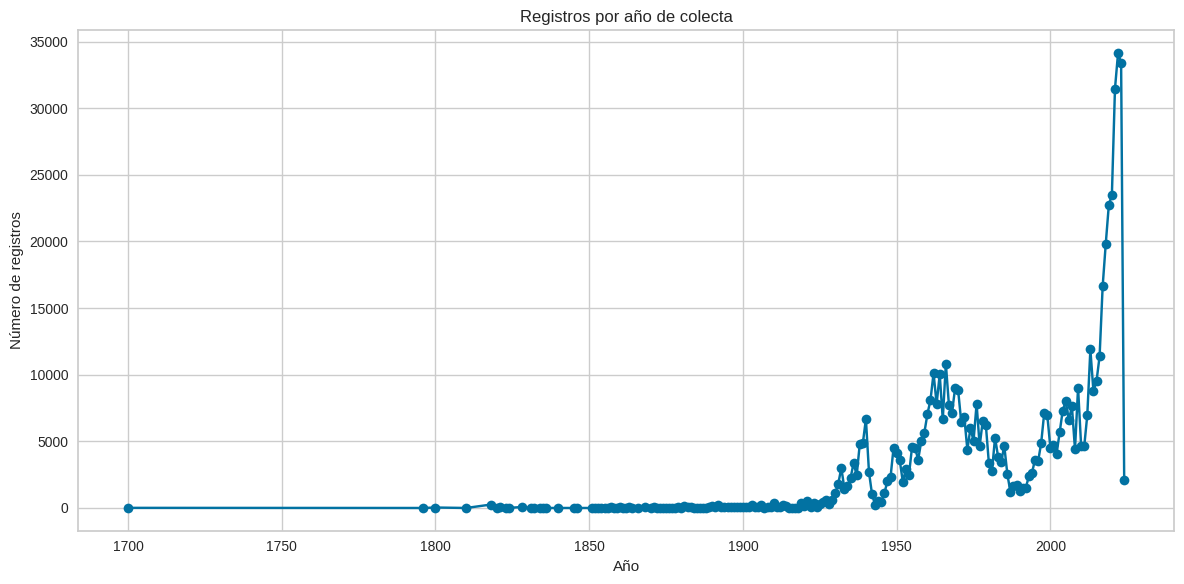

In [15]:
# Filtrar solo los años válidos para graficar
df_3_limpio = df_3[df_3['aniocolecta'] != 9999]

# Agrupar y graficar
registros_por_anio = df_3_limpio.groupby('aniocolecta').size().reset_index(name='registros')
registros_por_anio = registros_por_anio.sort_values('aniocolecta')

plt.figure(figsize=(12, 6))
plt.plot(registros_por_anio['aniocolecta'], registros_por_anio['registros'], marker='o')
plt.title('Registros por año de colecta')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
df_3_limpio['aniocolecta'] = pd.to_numeric(df_3_limpio['aniocolecta'], errors='coerce')
print("Registros antes de 1940:", df_3_limpio[df_3_limpio['aniocolecta'] < 1940].shape[0])
print("Registros entre 1940 y 1959:", df_3_limpio[(df_3_limpio['aniocolecta'] >= 1940) & (df_3_limpio['aniocolecta'] < 1960)].shape[0])


Registros antes de 1940: 34931
Registros entre 1940 y 1959: 59963


    aniocolecta  n_registros
0          1930         1119
1          1931         1805
2          1932         3011
3          1933         1461
4          1934         1620
5          1935         2236
6          1936         3381
7          1937         2443
8          1938         4791
9          1939         4850
10         1940         6685
11         1941         2684
12         1942         1015
13         1943          229
14         1944          508
15         1945          482
16         1946         1102
17         1947         2011
18         1948         2292
19         1949         4527
20         1950         4152
21         1951         3579
22         1952         1969
23         1953         2918
24         1954         2491
25         1955         4558
26         1956         4486
27         1957         3633
28         1958         5008
29         1959         5634
30         1960         7042
31         1961         8098
32         1962        10108
33         196

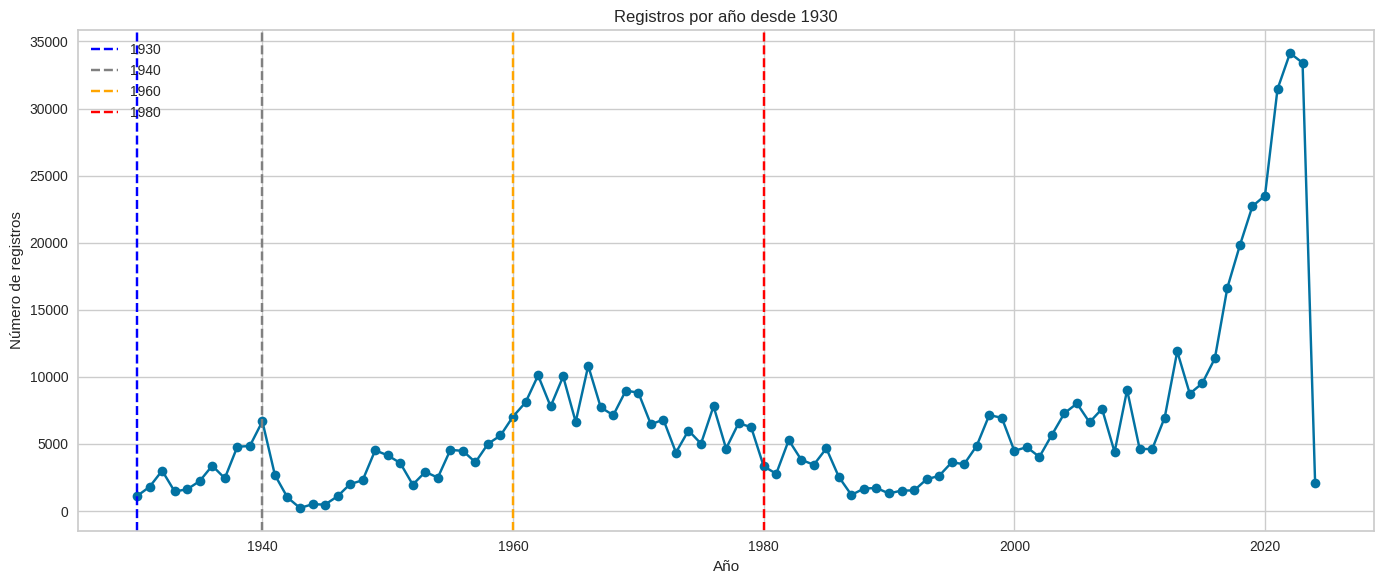

In [18]:
df_3_limpio['aniocolecta'] = pd.to_numeric(df_3_limpio['aniocolecta'], errors='coerce')

# Filtrar desde 1930
df_1930 = df_3_limpio[df_3_limpio['aniocolecta'] >= 1930]

# Conteo por año
conteo = df_1930.groupby('aniocolecta').size().reset_index(name='n_registros')

# Mostrar tabla
print(conteo.head(40))

# Graficar con líneas de corte
plt.figure(figsize=(14, 6))
plt.plot(conteo['aniocolecta'], conteo['n_registros'], marker='o')
plt.axvline(1930, color='blue', linestyle='--', label='1930')
plt.axvline(1940, color='gray', linestyle='--', label='1940')
plt.axvline(1960, color='orange', linestyle='--', label='1960')
plt.axvline(1980, color='red', linestyle='--', label='1980')
plt.title('Registros por año desde 1930')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Elegiré los que en el campo de año colecta sean mayor del 1950, ya que anterior a esto la información no es confiable
df_4 = df_3_limpio[(df_3_limpio['aniocolecta'] >= 1950) & (df_3_limpio['aniocolecta'] < 9999)]
df_4.shape

(555001, 70)

In [26]:
#agrego la columna cites para futuro análisis
df['aniocolecta'] = pd.to_numeric(df['aniocolecta'], errors='coerce')
df_filtrado = df[(df['aniocolecta'] >= 1950) & (df['aniocolecta'] < 9999)]

df_4['cites'] = df_filtrado['cites'].values

<ipython-input-26-3a016115449a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['cites'] = df_filtrado['cites'].values


In [27]:
df_4.columns

Index(['grupobio', 'subgrupobio', 'familiavalida', 'generovalido',
       'especievalida', 'nom059', 'iucn', 'longitud', 'latitud', 'estadomapa',
       'municipiomapa', 'localidad', 'fechacolecta', 'anp', 'fuente',
       'urlejemplar', 'idejemplar', 'ultimafechaactualizacion',
       'idnombrecatvalido', 'idnombrecat', 'reino', 'phylumdivision', 'clase',
       'orden', 'familia', 'genero', 'especie', 'autor', 'estatustax',
       'reftax', 'taxonvalidado', 'reinovalido', 'phylumdivisionvalido',
       'clasevalida', 'ordenvalido', 'autorvalido', 'reftaxvalido',
       'nombrecomun', 'ambiente', 'validacionambiente', 'endemismo', 'region',
       'datum', 'geovalidacion', 'paismapa', 'claveestadomapa',
       'clavemunicipiomapa', 'incertidumbreXY', 'altitudmapa', 'coleccion',
       'institucion', 'paiscoleccion', 'numcatalogo', 'numcolecta',
       'procedenciaejemplar', 'determinador', 'fechadeterminacion',
       'diadeterminacion', 'mesdeterminacion', 'aniodeterminacion', 'colec

In [28]:
# Rellenar NaNs
df_4['nom059'] = df_4['nom059'].fillna('Sin dato')

# Reemplazo con prioridad: primero (P), luego (A), luego (Pr)
df_4['nom059'] = df_4['nom059'].where(~df_4['nom059'].str.contains(r'\(P\)', na=False), 'En peligro de extinción')
df_4['nom059'] = df_4['nom059'].where(~df_4['nom059'].str.contains(r'\(A\)', na=False), 'Amenazada')
df_4['nom059'] = df_4['nom059'].where(~df_4['nom059'].str.contains(r'\(Pr\)', na=False), 'Sujeta a protección especial')


<ipython-input-28-67b0a4667e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['nom059'] = df_4['nom059'].fillna('Sin dato')
<ipython-input-28-67b0a4667e41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['nom059'] = df_4['nom059'].where(~df_4['nom059'].str.contains(r'\(P\)', na=False), 'En peligro de extinción')
<ipython-input-28-67b0a4667e41>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [30]:
df_4['nom059'].value_counts().sort_index()


nom059
Amenazada                        87338
En peligro de extinción          16221
Sin dato                        322940
Sujeta a protección especial    128502
Name: count, dtype: int64

In [31]:
df_4['cites'] = df_4['cites'].fillna('Sin dato')

df_4['cites'] = df_4['cites'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
df_4.loc[df_4['cites'].str.contains('Apéndice III', na=False), 'cites'] = 'III'
df_4.loc[df_4['cites'].str.contains('Apéndice II', na=False), 'cites'] = 'II'
df_4.loc[df_4['cites'].str.contains('Apéndice I', na=False), 'cites'] = 'I'


<ipython-input-31-d75d0e45ba1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['cites'] = df_4['cites'].fillna('Sin dato')
<ipython-input-31-d75d0e45ba1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['cites'] = df_4['cites'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)


In [32]:
df_4['cites'].value_counts().sort_index()


cites
I             7766
II           68181
III            485
Sin dato    478569
Name: count, dtype: int64

In [33]:
# Llenar NaNs
df_4['iucn'] = df_4['iucn'].fillna('Sin dato')

# Reemplazar usando las siglas estándar de la UICN
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(CR\)', na=False), 'En peligro crítico')  # En peligro crítico
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(EN\)', na=False), 'En peligro')  # En peligro
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(VU\)', na=False), 'Vulnerable')  # Vulnerable
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(NT\)', na=False), 'Casi amenazada')  # Casi amenazada
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(LC\)', na=False), 'Preocupación Menor')  # Preocupación menor
df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(DD\)', na=False), 'Datos insuficientes')  # Datos insuficientes

<ipython-input-33-709be38f8342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['iucn'] = df_4['iucn'].fillna('Sin dato')
<ipython-input-33-709be38f8342>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['iucn'] = df_4['iucn'].where(~df_4['iucn'].str.contains(r'\(CR\)', na=False), 'En peligro crítico')  # En peligro crítico
<ipython-input-33-709be38f8342>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [34]:
df_4['iucn'].value_counts()


iucn
Preocupación Menor     458629
Sin dato                39349
Vulnerable              17924
En peligro              16707
En peligro crítico      11309
Casi amenazada           8415
Datos insuficientes      2668
Name: count, dtype: int64

In [35]:
df_4['ambiente'] = df_4['ambiente'].replace({
    'DulceacuÃ\xadcola': 'Agua dulce',
    'DulceacuÃ­cola': 'Agua dulce'
})

# Rellenar valores vacíos o nulos con 'Sin dato'
df_4['ambiente'] = df_4['ambiente'].fillna('Sin dato')
df_4['ambiente'] = df_4['ambiente'].replace('', 'Sin dato')


<ipython-input-35-809ee1374cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['ambiente'] = df_4['ambiente'].replace({
<ipython-input-35-809ee1374cf0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['ambiente'] = df_4['ambiente'].fillna('Sin dato')
<ipython-input-35-809ee1374cf0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [36]:
df_4['ambiente'] = df_4['ambiente'].str.replace('DulceacuÃ­cola', 'Agua Dulce', regex=False)


<ipython-input-36-92a88a94a91a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['ambiente'] = df_4['ambiente'].str.replace('DulceacuÃ­cola', 'Agua Dulce', regex=False)


In [37]:
df_4['ambiente'].value_counts()

ambiente
Terrestre                        352608
Agua Dulce; Terrestre            185778
Marino                            10154
Sin dato                           3035
Agua Dulce; Marino; Terrestre      2511
Agua dulce                          915
Name: count, dtype: int64

In [38]:
df_4['validacionambiente'] = df_4['validacionambiente'].replace({
    val: 'Válido' for val in df_4['validacionambiente'].unique()
    if val.startswith('VÃ¡lido') or val.startswith('Válido')
})

df_4['validacionambiente'] = df_4['validacionambiente'].replace({
    'No aplica': 'No aplica',
    'No procesado': 'No procesado'
})


<ipython-input-38-438cbcb59d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['validacionambiente'] = df_4['validacionambiente'].replace({
<ipython-input-38-438cbcb59d0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['validacionambiente'] = df_4['validacionambiente'].replace({


In [39]:
df_4['validacionambiente'].value_counts()

validacionambiente
Válido          550905
No procesado      3272
No aplica          824
Name: count, dtype: int64

In [40]:
df_4['endemismo'] = df_4['endemismo'].replace('EndÃ©mica', 'Endémica')

df_4['endemismo'] = df_4['endemismo'].fillna('No endémica')


<ipython-input-40-998627b6121c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['endemismo'] = df_4['endemismo'].replace('EndÃ©mica', 'Endémica')
<ipython-input-40-998627b6121c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['endemismo'] = df_4['endemismo'].fillna('No endémica')


In [41]:
df_4['endemismo'].value_counts()

endemismo
No endémica    370213
Endémica       184788
Name: count, dtype: int64

In [42]:
df_5 = df_4[['especievalida', 'nom059', 'iucn', 'estadomapa', 'ambiente', 'validacionambiente', 'endemismo']]

df_5 = df_5.groupby('especievalida').agg({
    'nom059': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato',
    'iucn': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato',
    'ambiente': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato',
    'validacionambiente': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato',
    'endemismo': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato',
    'estadomapa': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin dato'
})
df_5.head()

nom059                 iucn  \
especievalida                                                          
Abronia antauges   Sujeta a protección especial  Datos insuficientes   
Abronia bogerti         En peligro de extinción  Datos insuficientes   
Abronia chiszari        En peligro de extinción           En peligro   
Abronia cuetzpali                      Sin dato             Sin dato   
Abronia deppii                        Amenazada           En peligro   

                    ambiente validacionambiente endemismo  \
especievalida                                               
Abronia antauges   Terrestre             Válido  Endémica   
Abronia bogerti    Terrestre             Válido  Endémica   
Abronia chiszari   Terrestre             Válido  Endémica   
Abronia cuetzpali  Terrestre             Válido  Endémica   
Abronia deppii     Terrestre             Válido  Endémica   

                                        estadomapa  
especievalida                                       
Abronia antauges   VERACRUZ DE IGNACIO DE LA LLAVE  
Abronia bogerti                           CAMPECHE  
Abronia chiszari   VERACRUZ DE IGNACIO DE LA LLAVE  
Abronia cuetzpali                           OAXACA  
Abronia deppii                              MEXICO

In [43]:
print("NOM-059:", df_5['nom059'].unique())
print("IUCN:", df_5['iucn'].unique())
print("AMBIENTE:", df_5['ambiente'].unique())
print("VALIDACION AMBIENTE:", df_5['validacionambiente'].unique())
print("ENDÉMICO:", df_5['endemismo'].unique())


NOM-059: ['Sujeta a protección especial' 'En peligro de extinción' 'Sin dato'
 'Amenazada']
IUCN: ['Datos insuficientes' 'En peligro' 'Sin dato' 'Preocupación Menor'
 'Vulnerable' 'Casi amenazada' 'En peligro crítico']
AMBIENTE: ['Terrestre' 'Sin dato' 'Agua Dulce; Terrestre' 'Agua dulce' 'Marino'
 'Agua Dulce; Marino; Terrestre']
VALIDACION AMBIENTE: ['Válido' 'No procesado']
ENDÉMICO: ['Endémica' 'No endémica']


In [44]:
df_5.columns

Index(['nom059', 'iucn', 'ambiente', 'validacionambiente', 'endemismo',
       'estadomapa'],
      dtype='object')

In [45]:
df_pivot=df_5.copy()
df_encoded = pd.get_dummies(df_pivot, columns=[
     'estadomapa', 'ambiente', 'validacionambiente',
    'endemismo', 'nom059', 'iucn'
], drop_first=True)
df_encoded.head()

estadomapa_ALABAMA  estadomapa_ALAJUELA  \
especievalida                                                
Abronia antauges                False                False   
Abronia bogerti                 False                False   
Abronia chiszari                False                False   
Abronia cuetzpali               False                False   
Abronia deppii                  False                False   

                   estadomapa_AMAZONAS  estadomapa_ANTIOQUIA  \
especievalida                                                  
Abronia antauges                 False                 False   
Abronia bogerti                  False                 False   
Abronia chiszari                 False                 False   
Abronia cuetzpali                False                 False   
Abronia deppii                   False                 False   

                   estadomapa_ARECIBO  estadomapa_ARIZONA  \
especievalida                                               
Abronia antauges                False               False   
Abronia bogerti                 False               False   
Abronia chiszari                False               False   
Abronia cuetzpali               False               False   
Abronia deppii                  False               False   

                   estadomapa_ATLANTICO  estadomapa_ATLANTIDA  \
especievalida                                                   
Abronia antauges                  False                 False   
Abronia bogerti                   False                 False   
Abronia chiszari                  False                 False   
Abronia cuetzpali                 False                 False   
Abronia deppii                    False                 False   

                   estadomapa_AÃ‘ASCO  estadomapa_BAJA CALIFORNIA  ...  \
especievalida                                                      ...   
Abronia antauges                False                       False  ...   
Abronia bogerti                 False                       False  ...   
Abronia chiszari                False                       False  ...   
Abronia cuetzpali               False                       False  ...   
Abronia deppii                  False                       False  ...   

                   endemismo_No endémica  nom059_En peligro de extinción  \
especievalida                                                              
Abronia antauges                   False                           False   
Abronia bogerti                    False                            True   
Abronia chiszari                   False                            True   
Abronia cuetzpali                  False                           False   
Abronia deppii                     False                           False   

                   nom059_Sin dato  nom059_Sujeta a protección especial  \
especievalida                                                             
Abronia antauges             False                                 True   
Abronia bogerti              False                                False   
Abronia chiszari             False                                False   
Abronia cuetzpali             True                                False   
Abronia deppii               False                                False   

                   iucn_Datos insuficientes  iucn_En peligro  \
especievalida                                                  
Abronia antauges                       True            False   
Abronia bogerti                        True            False   
Abronia chiszari                      False             True   
Abronia cuetzpali                     False            False   
Abronia deppii                        False             True   

                   iucn_En peligro crítico  iucn_Preocupación Menor  \
especievalida                                                         
Abronia antauges                     False                    False   
Abronia bog

In [46]:
df_encoded.columns

Index(['estadomapa_ALABAMA', 'estadomapa_ALAJUELA', 'estadomapa_AMAZONAS',
       'estadomapa_ANTIOQUIA', 'estadomapa_ARECIBO', 'estadomapa_ARIZONA',
       'estadomapa_ATLANTICO', 'estadomapa_ATLANTIDA', 'estadomapa_AÃ‘ASCO',
       'estadomapa_BAJA CALIFORNIA',
       ...
       'endemismo_No endémica', 'nom059_En peligro de extinción',
       'nom059_Sin dato', 'nom059_Sujeta a protección especial',
       'iucn_Datos insuficientes', 'iucn_En peligro',
       'iucn_En peligro crítico', 'iucn_Preocupación Menor', 'iucn_Sin dato',
       'iucn_Vulnerable'],
      dtype='object', length=150)

In [47]:
df_encoded

estadomapa_ALABAMA  estadomapa_ALAJUELA  \
especievalida                                                           
Abronia antauges                           False                False   
Abronia bogerti                            False                False   
Abronia chiszari                           False                False   
Abronia cuetzpali                          False                False   
Abronia deppii                             False                False   
...                                          ...                  ...   
Xenosaurus platyceps                       False                False   
Xenosaurus rackhami                        False                False   
Xenosaurus rectocollaris                   False                False   
Xenosaurus sanmartinensis                  False                False   
Xenosaurus tzacualtipantecus               False                False   

                              estadomapa_AMAZONAS  estadomapa_ANTIOQUIA  \
especievalida                                                             
Abronia antauges                            False                 False   
Abronia bogerti                             False                 False   
Abronia chiszari                            False                 False   
Abronia cuetzpali                           False                 False   
Abronia deppii                              False                 False   
...                                           ...                   ...   
Xenosaurus platyceps                        False                 False   
Xenosaurus rackhami                         False                 False   
Xenosaurus rectocollaris                    False                 False   
Xenosaurus sanmartinensis                   False                 False   
Xenosaurus tzacualtipantecus                False                 False   

                              estadomapa_ARECIBO  estadomapa_ARIZONA  \
especievalida                                                          
Abronia antauges                           False               False   
Abronia bogerti                            False               False   
Abronia chiszari                           False               False   
Abronia cuetzpali                          False               False   
Abronia deppii                             False               False   
...                                          ...                 ...   
Xenosaurus platyceps                       False               False   
Xenosaurus rackhami                        False               False   
Xenosaurus rectocollaris                   False               False   
Xenosaurus sanmartinensis                  False               False   
Xenosaurus tzacualtipantecus               False               False   

                              estadomapa_ATLANTICO  estadomapa_ATLANTIDA  \
especievalida                                                              
Abronia antauges                             False                 False   
Abronia bogerti                              False                 False   
Abronia chiszari                             False                 False   
Abronia cuetzpali                            False                 False   
Abronia deppii                               False                 False   
...                                            ...                   ...   
Xenosaurus platyceps                         False                 False   
Xenosaurus rackhami                          False                 False   
Xenosaurus rectocollaris                     False                 False   
Xenosaurus sanmartinensis                    False                 False   
Xenosaurus tzacualtipantecus                 False                 False   

                              estadomapa_AÃ‘ASCO  estadomapa_BAJA CALIFORNIA  \
especievalida                                                                  
Abronia antauges  

### PCA y Clustering
Se aplicó análisis de componentes principales (PCA) para reducir la dimensionalidad del dataset codificado (One-Hot Encoding). Posteriormente, se utilizaron algoritmos de agrupamiento no supervisado: K-Means y DBSCAN. El mejor valor de Silhouette Score se obtuvo con k=2 (0.42), lo cual indica que hay dos agrupaciones principales con buena separación. DBSCAN permitió visualizar múltiples agrupaciones naturales con menor sensibilidad a la escala.


In [48]:
X = df_encoded.values

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

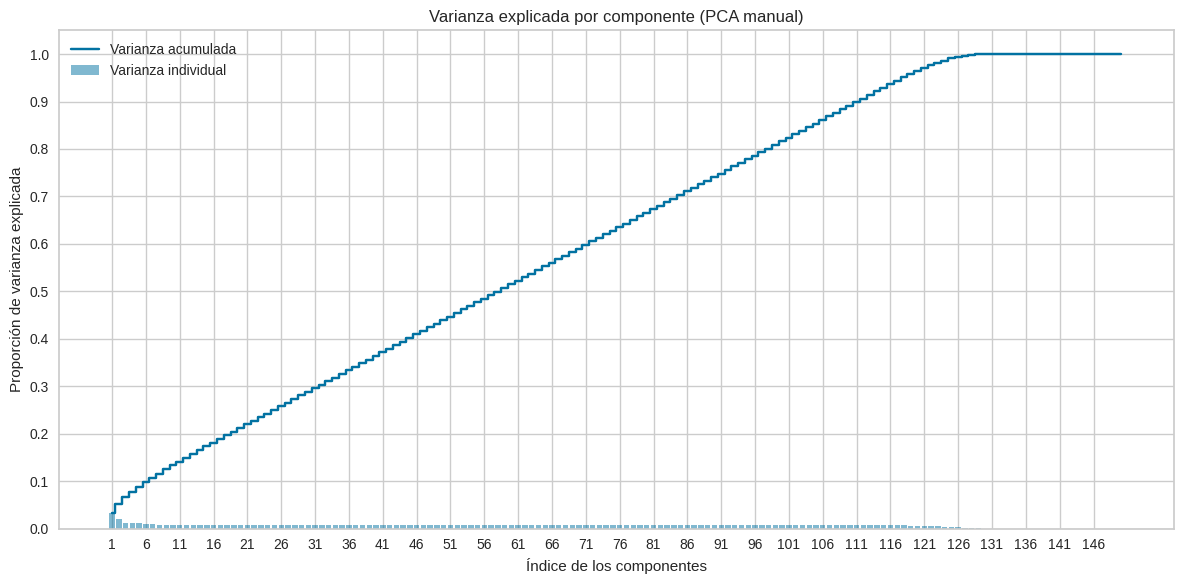

In [49]:
#Graficamos
N = len(var_exp)
plt.figure(figsize=(12, 6))
plt.bar(range(1, N + 1), var_exp, alpha=0.5, align='center', label='Varianza individual')
plt.step(range(1, N + 1), cum_var_exp, where='mid', label='Varianza acumulada')
plt.xlabel('Índice de los componentes')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componente (PCA manual)')
plt.xticks(np.arange(1, N + 1, step=5))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [50]:
# Encuentra el número mínimo de componentes que acumulan al menos el 70% de la varianza
for i, val in enumerate(cum_var_exp):
    if val >= 0.70:
        print(f"{i+1} componentes explican al menos el 70% de la varianza.")
        break


85 componentes explican al menos el 70% de la varianza.


In [51]:
pca = PCA(n_components=85)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)

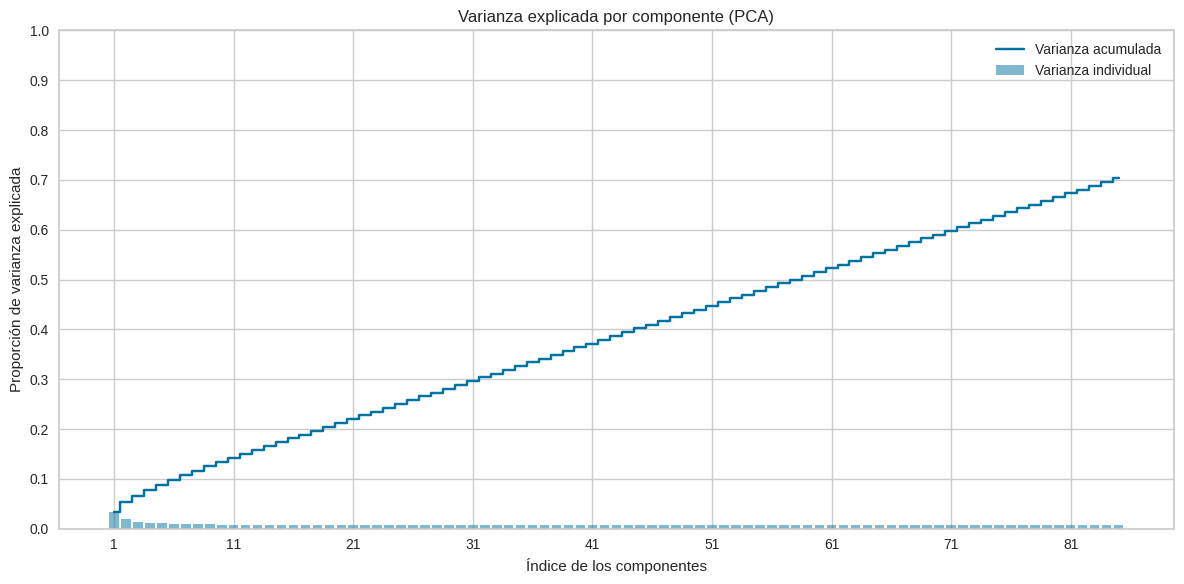

In [52]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
N = len(var_exp)

plt.figure(figsize=(12, 6))
plt.bar(range(1, N + 1), var_exp, alpha=0.5, align='center', label='Varianza individual')
plt.step(range(1, N + 1), cum_var_exp, where='mid', label='Varianza acumulada')
plt.xlabel('Índice de los componentes')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componente (PCA)')
plt.xticks(np.arange(1, N + 1, step=10))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

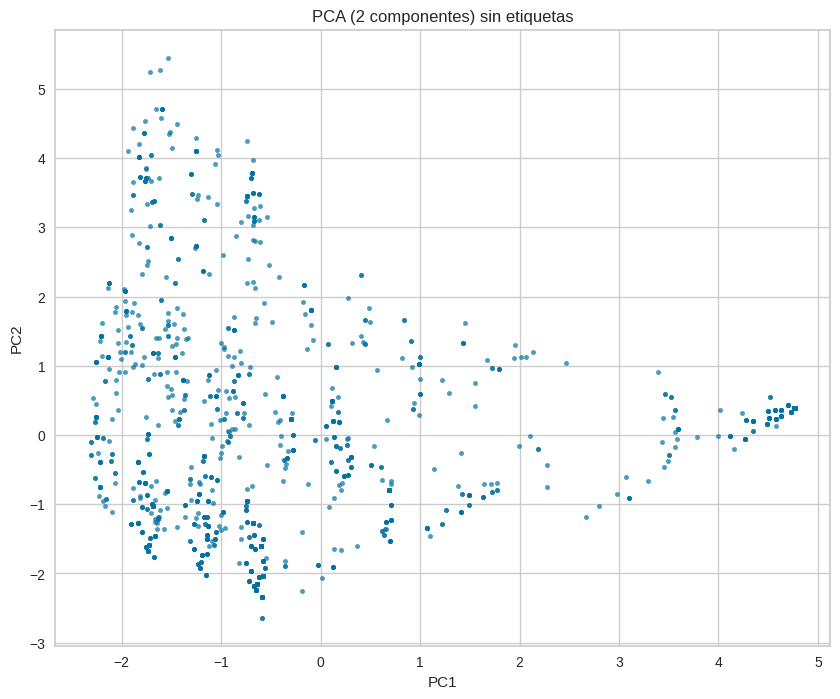

In [53]:
X_plot = X_train_pca[:, :2]

plt.figure(figsize=(10, 8))
plt.scatter(X_plot[:, 0], X_plot[:, 1], s=10, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 componentes) sin etiquetas')
plt.grid(True)
plt.show()


In [54]:
pca.components_

array([[ 0.00000000e+00,  6.28406912e-02,  3.83781888e-02, ...,
        -2.27024391e-01,  3.79696936e-01, -5.45318372e-02],
       [ 0.00000000e+00,  8.87074411e-03,  5.25702675e-03, ...,
        -3.78900128e-01,  1.89503019e-02,  1.76943696e-01],
       [-0.00000000e+00,  6.85344567e-03,  1.36993507e-02, ...,
        -1.89557410e-01,  1.19022478e-01, -1.11788762e-01],
       ...,
       [-0.00000000e+00, -1.50707891e-02, -1.21312774e-02, ...,
         3.80315808e-04,  3.76128659e-05, -1.01087984e-03],
       [-0.00000000e+00, -0.00000000e+00, -5.62977468e-15, ...,
        -2.01227923e-16, -1.94289029e-16,  1.00613962e-16],
       [ 0.00000000e+00,  0.00000000e+00,  6.33344842e-14, ...,
        -7.59114993e-15,  1.40998324e-14,  4.40077662e-15]])

In [55]:
X_reconstructed = pca.inverse_transform(X_train_pca)

mse = mean_squared_error(X_train_std, X_reconstructed)
print(f"Error de reconstrucción (MSE): {mse:.4f}")

Error de reconstrucción (MSE): 0.2633


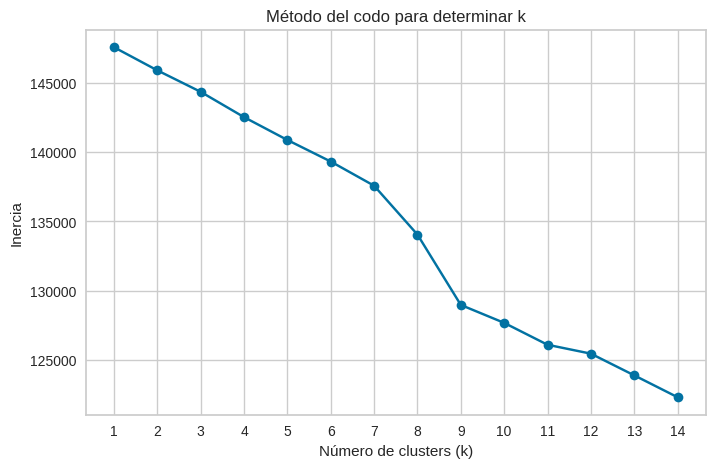

In [56]:
inertias = []
k_values = range(1, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


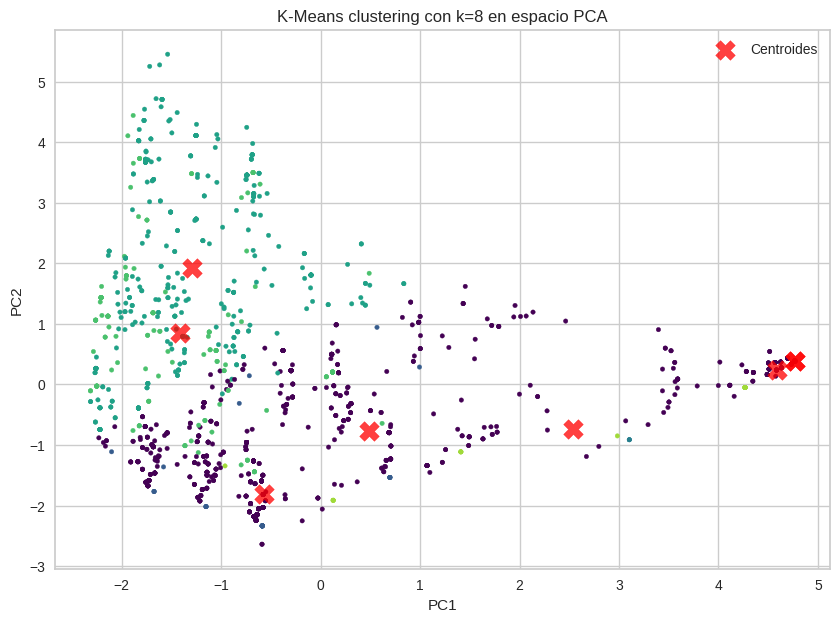

In [57]:
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means clustering con k=8 en espacio PCA')
plt.legend()
plt.grid(True)
plt.show()


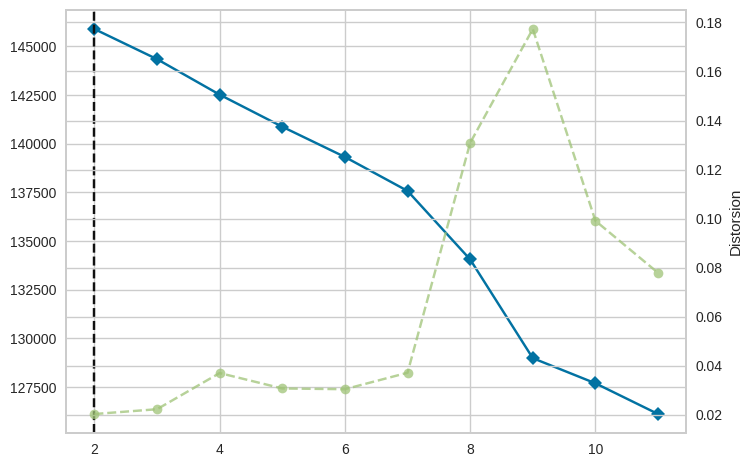

In [58]:
vis = KElbowVisualizer(KMeans(random_state=42), k=(2,12), timings=True)

vis.fit(X_train_pca)
plt.xlabel('Numero de grupos')
plt.ylabel('Distorsion')
plt.show()

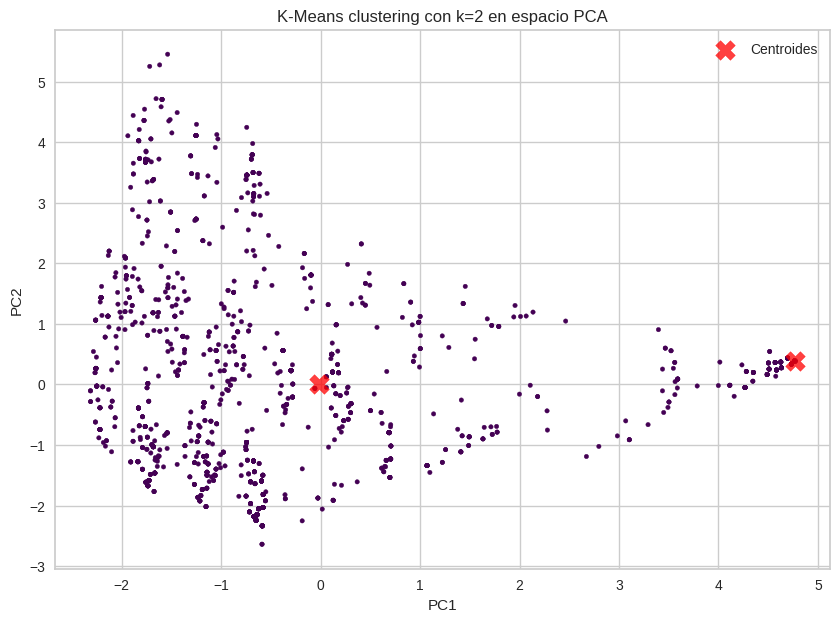

In [59]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

# Visualizar los clusters en las primeras 2 componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means clustering con k=2 en espacio PCA')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
print("Tipo:", type(clusters))
print("Dimensiones:", clusters.shape)
print("Valores únicos:", np.unique(clusters))
print("Tipo de dato interno:", clusters.dtype)


Tipo: <class 'numpy.ndarray'>
Dimensiones: (1578,)
Valores únicos: [0 1]
Tipo de dato interno: int32


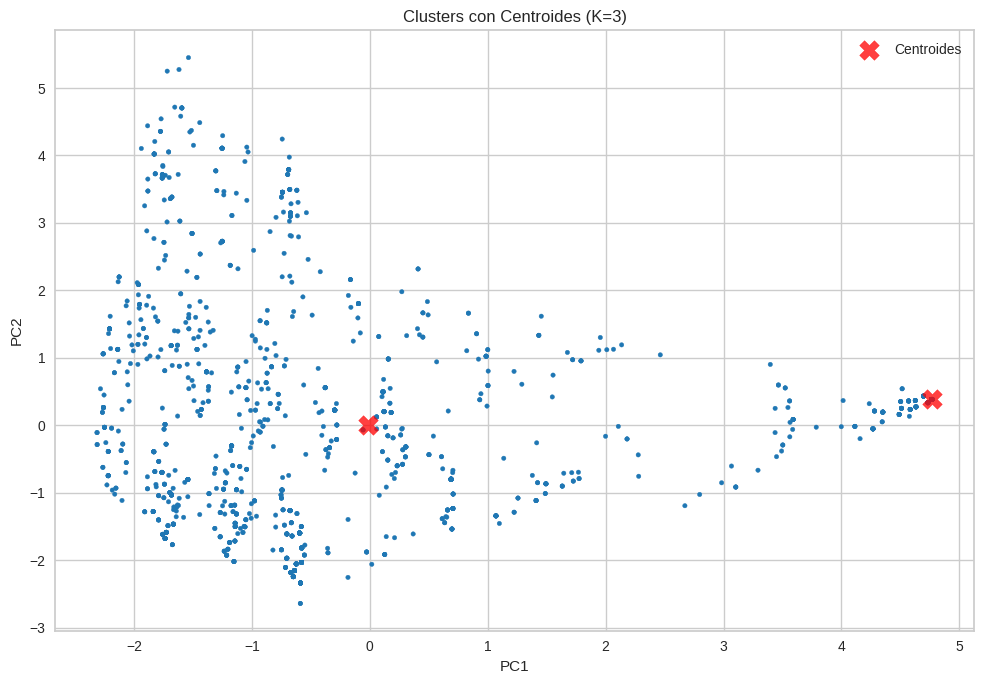

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='tab10', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters con Centroides (K=3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
df_clusters = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters
df_clusters['especievalida'] = df_encoded.index[:len(df_clusters)]

especies_por_cluster = df_clusters.groupby('Cluster')['especievalida'].unique()

for cluster_id, especies in especies_por_cluster.items():
    print(f"\nCluster {cluster_id} tiene {len(especies)} especies.")
    print(especies[:10])  # primeras 10 especies para ver ejemplos



Cluster 0 tiene 1573 especies.
['Abronia antauges' 'Abronia bogerti' 'Abronia chiszari'
 'Abronia cuetzpali' 'Abronia deppii' 'Abronia frosti'
 'Abronia fuscolabialis' 'Abronia gadovii' 'Abronia gadovii gadovii'
 'Abronia gadovii levigata']

Cluster 1 tiene 5 especies.
['Kinosternon durangoense' 'Leptophis mexicanus septentrionalis'
 'Marisora unimarginata' 'Micruroides euryxanthus australis'
 'Pituophis deppei jani']


In [63]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
y_kmeans = kmeans.predict(X_train_pca)

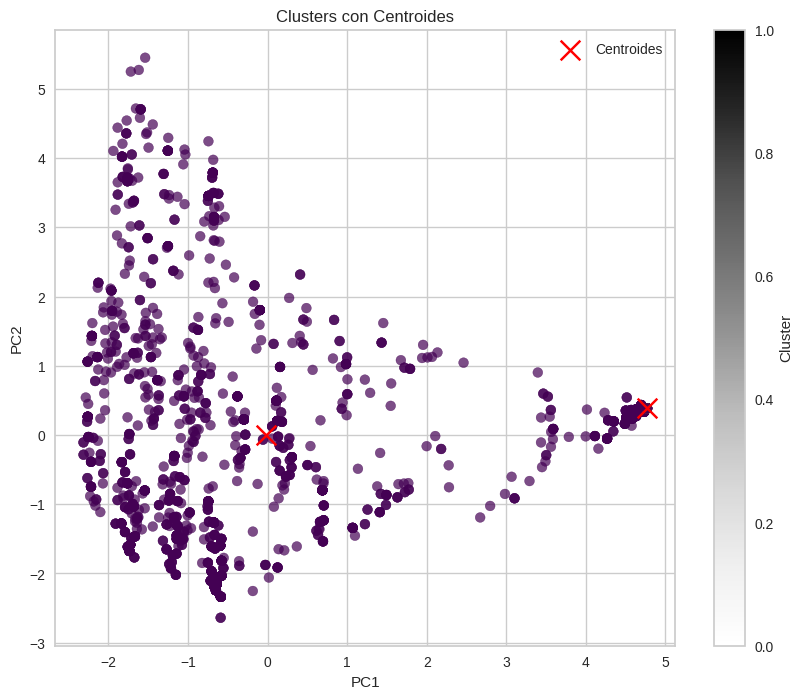

In [64]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters con Centroides')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


In [65]:
df_clusters = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
df_clusters['Cluster'] = y_kmeans

cluster_summary = df_clusters.groupby('Cluster').mean()
print(cluster_summary)


              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0       -0.015152 -0.001223 -0.002111  0.002009  0.002881  0.000241  0.000054   
1        4.766730  0.384867  0.664258 -0.631921 -0.906249 -0.075905 -0.017017   

              PC8       PC9      PC10  ...          PC76          PC77  \
Cluster                                ...                               
0        0.000196  0.000751 -0.000466  ...  5.201497e-16  1.033520e-13   
1       -0.061597 -0.236246  0.146659  ... -1.679363e-13 -3.239716e-11   

                 PC78          PC79      PC80      PC81      PC82      PC83  \
Cluster                                                                       
0        1.285216e-14  1.195630e-13  0.000035  0.000697  0.002282  0.000210   
1       -4.040831e-12 -3.763070e-11 -0.011031 -0.219278 -0.717844 -0.066068   

                 PC84          PC85  
Cluster                

In [66]:
# Calcular el silhouette score
silhouette_avg = silhouette_score(X_train_pca, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.4281


In [67]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)  # O tu matriz con PCA u original
    score = silhouette_score(X_train_pca, labels)
    scores.append(score)
    print(f"k={k}, silhouette={score:.4f}")


k=2, silhouette=0.4281
k=3, silhouette=-0.0914
k=4, silhouette=-0.0803
k=5, silhouette=-0.0755
k=6, silhouette=-0.0522
k=7, silhouette=-0.0435
k=8, silhouette=-0.0254
k=9, silhouette=0.0469
k=10, silhouette=0.0614


In [68]:
# ahora usamos dbscan para ver si tenemos mejores clusters
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan.fit(X_train_pca)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_ruido = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos considerados ruido: {n_ruido}")


Número de clusters encontrados: 76
Número de puntos considerados ruido: 443


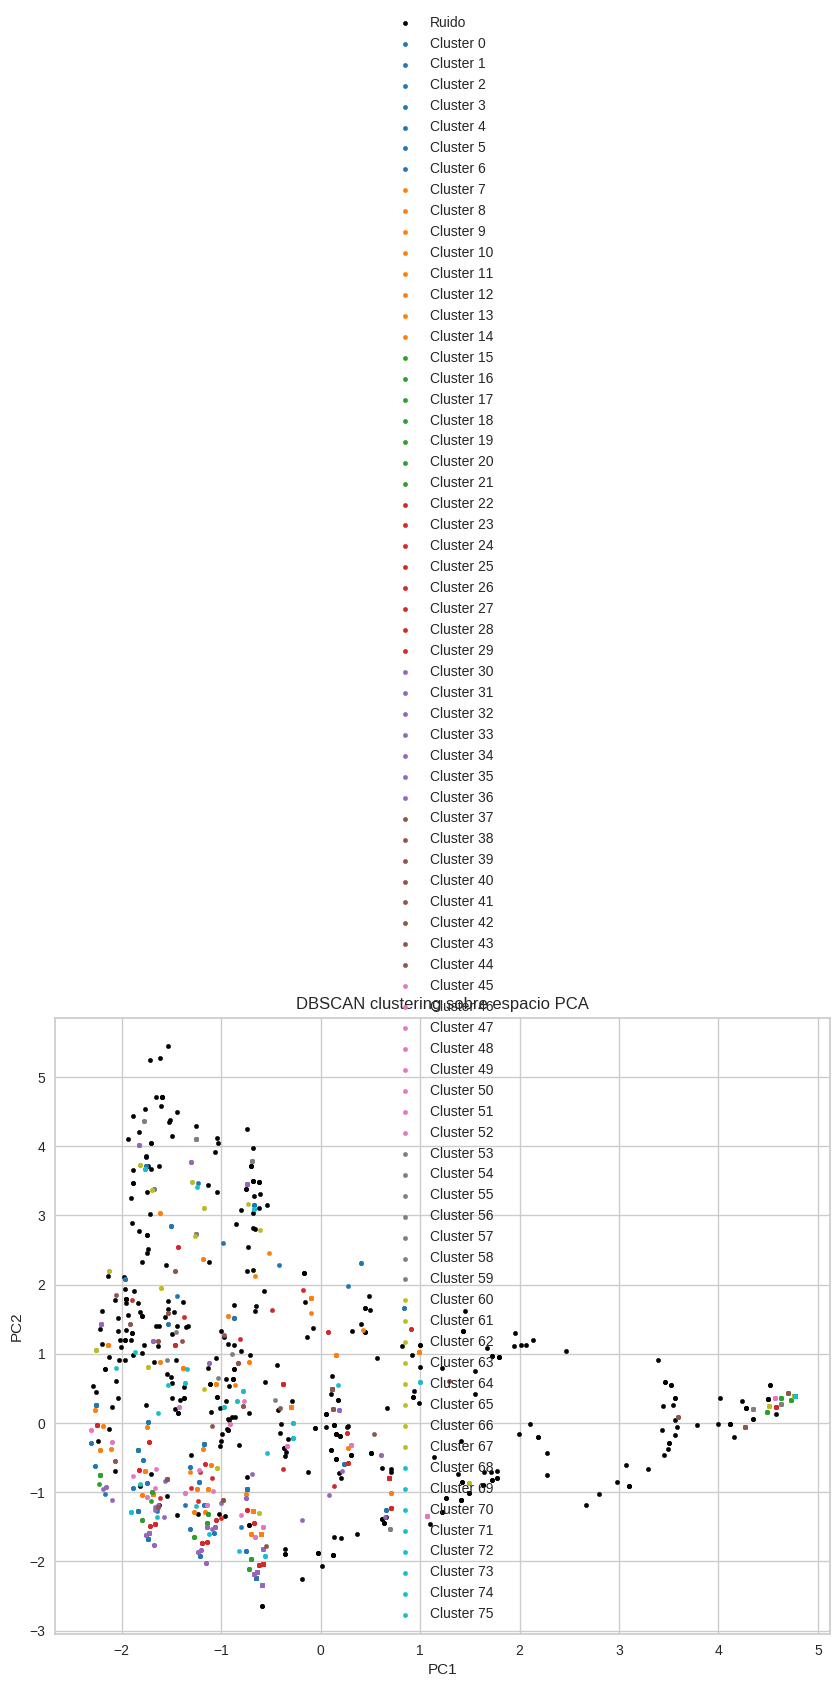

In [69]:
unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 8))
for i, label in enumerate(unique_labels):
    if label == -1:
        color = 'black'
        label_name = 'Ruido'
    else:
        color = colors[i]
        label_name = f'Cluster {label}'

    plt.scatter(
        X_train_pca[labels == label, 0],
        X_train_pca[labels == label, 1],
        c=[color], label=label_name, s=10
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN clustering sobre espacio PCA')
plt.legend()
plt.grid(True)
plt.show()


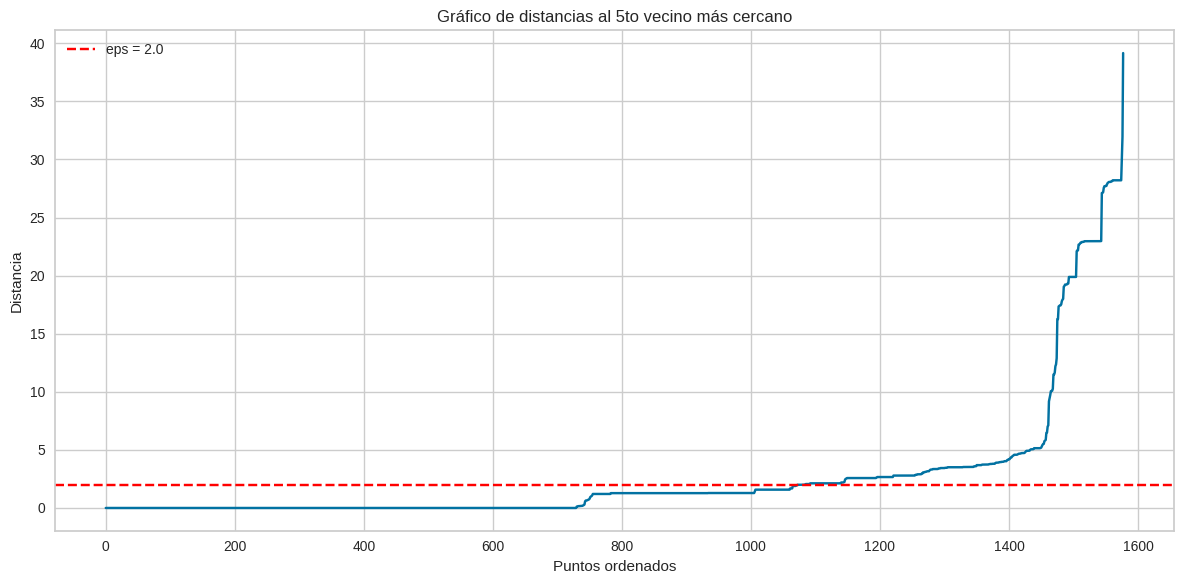

In [70]:
# Ajustamos el modelo de vecinos más cercanos
vecinos = NearestNeighbors(n_neighbors=5)
vecinos_fit = vecinos.fit(X_train_pca)
distancias, indices = vecinos_fit.kneighbors(X_train_pca)

# Tomar las distancias del 5to vecino (columna 4)
distancia_5 = np.sort(distancias[:, 4])

# Graficar con línea vertical en eps = 2.0
plt.figure(figsize=(12, 6))
plt.plot(distancia_5)
plt.axhline(y=2.0, color='red', linestyle='--', label='eps = 2.0')
plt.title("Gráfico de distancias al 5to vecino más cercano")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Crear DataFrame con resultados
df_clusters_dbscan = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
df_clusters_dbscan['Cluster'] = labels
df_clusters_dbscan['especie'] = df_encoded.index[:len(df_clusters_dbscan)]

# Ver resumen de cuántas especies por cluster
resumen_clusters = df_clusters_dbscan['Cluster'].value_counts().sort_index()
print("Resumen de especies por cluster:\n", resumen_clusters)

# Ver ejemplos por cluster
for cl in sorted(df_clusters_dbscan['Cluster'].unique()):
    especies = df_clusters_dbscan[df_clusters_dbscan['Cluster'] == cl]['especie'].values
    print(f"\nCluster {cl} contiene {len(especies)} especies.")
    print(especies[:10])  # Muestra solo 10 ejemplos por cluster


Resumen de especies por cluster:
 Cluster
-1     443
 0      50
 1      22
 2      22
 3      14
      ... 
 71      9
 72      8
 73      6
 74      5
 75      6
Name: count, Length: 77, dtype: int64

Cluster -1 contiene 443 especies.
['Abronia bogerti' 'Abronia cuetzpali' 'Abronia deppii'
 'Abronia moreletii temporalis' 'Abronia viridiflava' 'Acris gryllus'
 'Adelphicos latifasciatum' 'Adelphicos nigrilatum'
 'Adelphicos quadrivirgatum' 'Adelphicos sargii']

Cluster 0 contiene 50 especies.
['Abronia antauges' 'Abronia juarezi' 'Abronia ochoterenai'
 'Anaxyrus kelloggi' 'Anolis auratus' 'Anolis gadovii' 'Anolis marmoratus'
 'Anolis microlepidotus' 'Anolis schiedii' 'Aquiloeurycea rubrimembris']

Cluster 1 contiene 22 especies.
['Abronia chiszari' 'Anaxyrus mexicanus' 'Anniella geronimensis'
 'Anolis garmani' 'Anolis gundlachi' 'Anolis insignis' 'Anolis umbrivagus'
 'Aspidoscelis gularis gularis' 'Barisia imbricata' 'Dipsas sanctijoannis']

Cluster 2 contiene 22 especies.
['Abronia fro

In [72]:
dbscan = DBSCAN(eps=5, min_samples=5)  # Ajustamos eps a ~5
dbscan.fit(X_train_pca)

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_ruido = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos considerados ruido: {n_ruido}")


Número de clusters encontrados: 44
Número de puntos considerados ruido: 130


In [73]:
print("PCA shape:", X_train_pca.shape[0])
print("df_encoded shape:", df_encoded.shape[0])


PCA shape: 1578
df_encoded shape: 2255


In [74]:
df_clusters = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
df_clusters['Cluster'] = labels
df_clusters['Especie'] = df_encoded.index[:X_train_pca.shape[0]] # Slice the index to match X_train_pca shape

especies_por_cluster = df_clusters[df_clusters['Cluster'] != -1].groupby('Cluster')['Especie'].apply(list)

for clus, especies in especies_por_cluster.items():
    print(f"\nCluster {clus} tiene {len(especies)} especies.")
    print(especies[:10])  # Muestra 10 de ejemplo



Cluster 0 tiene 628 especies.
['Abronia antauges', 'Abronia frosti', 'Abronia gadovii', 'Abronia graminea', 'Abronia juarezi', 'Abronia matudai', 'Abronia monticola', 'Abronia moreletii', 'Abronia moreletii rafaeli', 'Abronia ochoterenai']

Cluster 1 tiene 51 especies.
['Abronia bogerti', 'Abronia gadovii gadovii', 'Abronia smithi', 'Agkistrodon piscivorus', 'Ambystoma gracile', 'Anolis dunni', 'Anolis eulaemus', 'Anolis hobartsmithi', 'Anolis mccraniei', 'Anolis nebuloides']

Cluster 2 tiene 33 especies.
['Abronia chiszari', 'Anaxyrus mexicanus', 'Anniella geronimensis', 'Anolis compressicauda', 'Anolis cymbops', 'Anolis gaigei', 'Anolis garmani', 'Anolis gundlachi', 'Anolis insignis', 'Anolis umbrivagus']

Cluster 3 tiene 9 especies.
['Abronia cuetzpali', 'Chironius exoletus', 'Conopsis nasus', 'Ecnomiohyla echinata', 'Hemidactylus turcicus', 'Incilius nebulifer', 'Incilius perplexus', 'Nerodia sipedon', 'Phrynosoma taurus']

Cluster 4 tiene 20 especies.
['Abronia fuscolabialis', 'A

In [75]:
# Excluir los puntos clasificados como ruido (-1)
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil_score = silhouette_score(X_train_pca[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {sil_score:.4f}")
else:
    print("No se puede calcular Silhouette Score: solo hay un cluster válido.")


Silhouette Score (sin ruido): 0.4768


### Validación de hipótesis y análisis CITES
Se exploró la coincidencia entre especies listadas en CITES y aquellas con declive poblacional. Se identificaron cinco especies del Apéndice I que coinciden con las que presentan fuertes descensos, todas ellas también incluidas en NOM-059 e IUCN, reforzando su relevancia ecológica y urgencia de conservación.


In [76]:
# Veremos las especies que tienen cites
especies_cites = df_4[df_4['cites'].isin(['I', 'II', 'III'])]
print(f"Número de especies con registro CITES: {especies_cites.shape[0]}")
especies_cites.head()


Número de especies con registro CITES: 76432


grupobio                                        subgrupobio  \
20406  Reptiles  camaleones, geckos, iguanas, lagartijas, lagartos   
20490  Reptiles                                   tortugas marinas   
20541  Reptiles  camaleones, geckos, iguanas, lagartijas, lagartos   
20582  Reptiles      tortugas dulceacuÃ­colas, tortugas terrestres   
20594  Reptiles  camaleones, geckos, iguanas, lagartijas, lagartos   

         familiavalida  generovalido           especievalida  \
20406  Phrynosomatidae    Phrynosoma     Phrynosoma modestum   
20490      Cheloniidae      Chelonia          Chelonia mydas   
20541  Phrynosomatidae    Phrynosoma  Phrynosoma platyrhinos   
20582      Geoemydidae  Rhinoclemmys     Rhinoclemmys rubida   
20594  Phrynosomatidae    Phrynosoma      Phrynosoma mcallii   

                             nom059                iucn    longitud  \
20406                      Sin dato  Preocupación Menor -106.393478   
20490       En peligro de extinción          Vulnerable -113.594000   
20541                      Sin dato  Preocupación Menor -115.000000   
20582  Sujeta a protección especial      Casi amenazada  -95.057917   
20594                     Amenazada      Casi amenazada -113.520015   

         latitud           estadomapa  ... diacolecta mescolecta aniocolecta  \
20406  31.246254            CHIHUAHUA  ...          5          9        2014   
20490  26.715000  BAJA CALIFORNIA SUR  ...         20         10        1998   
20541  31.500000      BAJA CALIFORNIA  ...         30          5        1971   
20582  16.268114               OAXACA  ...         22         11        2012   
20594  31.585027               SONORA  ...         26          4        2018   

                  proyecto                                       formadecitar  \
20406          Naturalista  CONABIO. 2019. Naturalista. ComisiÃ³n Nacional...   
20490                 gbif  Nichols, W. 2014. Pacific turtle tracks: Turtl...   
20541  Arizona Vertebrados  Rentail N. P. 2004. UAZ Vertebrates collection...   
20582          Naturalista  CONABIO. 2019. Naturalista. ComisiÃ³n Nacional...   
20594          Naturalista  CONABIO. 2019. Naturalista. ComisiÃ³n Nacional...   

        licenciauso urlproyecto  \
20406      CC-BY-NC         NaN   
20490  CC_BY_NC_4_0         NaN   
20541      CC-BY-NC         NaN   
20582      CC-BY-NC         NaN   
20594           NaN         NaN   

                                               urlorigen  version cites  
20406  http://conabio.inaturalist.org/observations/20...  2024-12    II  
20490         https://www.gbif.org/occurrence/3085425430  2024-12     I  
20541                                                NaN  2024-12    II  
20582  http://conabio.inaturalist.org/observations/53...  2024-12    II  
20594  https://www.inaturalist.org/observations/11470450  2024-12    II  

[5 rows x 71 columns]

In [91]:
# Intersección entre CITES y especies con declive
especies_cites = df_4[df_4['cites'].isin(['I', 'II', 'III'])]

coinciden_declive = especies_cites[especies_cites['especievalida'].isin(especies_bajan_14.index)]

tabla_declive_cites = coinciden_declive[['especievalida', 'cites', 'nom059', 'iucn']].drop_duplicates()
tabla_declive_cites = tabla_declive_cites.sort_values(by='especievalida')

print(f"Especies con CITES que también presentan declive: {tabla_declive_cites.shape[0]}")
tabla_declive_cites.head(30)

Especies con CITES que también presentan declive: 5


especievalida cites                   nom059  \
204286         Caretta caretta     I  En peligro de extinción   
20490           Chelonia mydas     I  En peligro de extinción   
265900          Chelonia mydas     I  En peligro de extinción   
209215  Eretmochelys imbricata     I  En peligro de extinción   
20699    Lepidochelys olivacea     I  En peligro de extinción   

                      iucn  
204286  Preocupación Menor  
20490           Vulnerable  
265900          En peligro  
209215  En peligro crítico  
20699           Vulnerable

In [92]:
# Tabla con especie, CITES, NOM-059, y IUCN
tabla_cites_completa = especies_cites[['especievalida', 'cites', 'nom059', 'iucn']].drop_duplicates()
tabla_cites_completa.reset_index(drop=True, inplace=True)
tabla_cites_completa.head(30)


especievalida cites                        nom059  \
0                Phrynosoma modestum    II                      Sin dato   
1                     Chelonia mydas     I       En peligro de extinción   
2             Phrynosoma platyrhinos    II                      Sin dato   
3                Rhinoclemmys rubida    II  Sujeta a protección especial   
4                 Phrynosoma mcallii    II                     Amenazada   
5                   Terrapene ornata    II  Sujeta a protección especial   
6                 Ctenosaura similis    II                     Amenazada   
7              Lepidochelys olivacea     I       En peligro de extinción   
8                   Abronia graminea    II                     Amenazada   
9                Phrynosoma cornutum    II                      Sin dato   
10                 Crocodylus acutus    II  Sujeta a protección especial   
11              Phrynosoma coronatum    II                      Sin dato   
12             Phrynosoma orbiculare    II                     Amenazada   
13  Phrynosoma orbiculare orbiculare    II                     Amenazada   
14                  Abronia taeniata    II  Sujeta a protección especial   
15              Kinosternon integrum    II  Sujeta a protección especial   
16                    Abronia deppii    II                     Amenazada   
17     Phrynosoma orbiculare dugesii    II                     Amenazada   
18                 Phrynosoma taurus    II                     Amenazada   
19               Abronia viridiflava    II  Sujeta a protección especial   
20    Phrynosoma orbiculare cortezii    II                     Amenazada   
21                Crotalus totonacus   III  Sujeta a protección especial   
22              Ctenosaura pectinata    II                     Amenazada   
23                 Iguana rhinolopha    II  Sujeta a protección especial   
24                   Abronia gadovii    II  Sujeta a protección especial   
25              Lichanura trivirgata    II                     Amenazada   
26   Phrynosoma orbiculare orientale    II                     Amenazada   
27             Phrynosoma hernandesi    II                      Sin dato   
28          Abronia gadovii levigata    II  Sujeta a protección especial   
29        Rhinoclemmys rubida rubida    II  Sujeta a protección especial   

                  iucn  
0   Preocupación Menor  
1           Vulnerable  
2   Preocupación Menor  
3       Casi amenazada  
4       Casi amenazada  
5       Casi amenazada  
6   Preocupación Menor  
7           Vulnerable  
8           En peligro  
9   Preocupación Menor  
10          Vulnerable  
11  Preocupación Menor  
12  Preocupación Menor  
13  Preocupación Menor  
14          Vulnerable  
15  Preocupación Menor  
16          En peligro  
17  Preocupación Menor  
18  Preocupación Menor  
19  Preocupación Menor  
20  Preocupación Menor  
21  Preocupación Menor  
22  Preocupación Menor  
23  Preocupación Menor  
24  Preocupación Menor  
25  Preocupación Menor  
26  Preocupación Menor  
27  Preocupación Menor  
28  Preocupación Menor  
29      Casi amenazada

### Proyecciones con Prophet
Se utilizó el modelo Prophet de Facebook para proyectar el número de registros de especies entre 2025 y 2030. Se eligieron las 30 especies con mayor declive y las 10 con mayor aumento, basándose en la pendiente de regresión lineal por año. Las proyecciones muestran tendencias que pueden anticipar crisis ecológicas, especialmente en especies con historial descendente constante desde 2010.


In [79]:
df_6 = df_4[['grupobio' , 'aniocolecta','especievalida', 'nom059', 'iucn', 'estadomapa', 'ambiente', 'validacionambiente', 'endemismo']]
df_6.head()

grupobio  aniocolecta           especievalida    nom059  \
0   Reptiles         1960       Crotalus cerastes  Sin dato   
5   Reptiles         2022   Elgaria multicarinata  Sin dato   
7   Reptiles         2023      Anolis hispaniolae  Sin dato   
8   Reptiles         1981  Aspidoscelis uniparens  Sin dato   
10  Reptiles         1993          Crotalus atrox  Sin dato   

                  iucn  estadomapa   ambiente validacionambiente    endemismo  
0   Preocupación Menor  CALIFORNIA  Terrestre             Válido  No endémica  
5   Preocupación Menor  CALIFORNIA  Terrestre             Válido  No endémica  
7             Sin dato      SAMANA   Sin dato       No procesado  No endémica  
8   Preocupación Menor  NEW MEXICO  Terrestre             Válido  No endémica  
10  Preocupación Menor     ARIZONA  Terrestre             Válido  No endémica

In [80]:
# Agrupamos por especie válida y año de colecta
serie_tiempo = df_6.groupby(['especievalida', 'aniocolecta']).size().reset_index(name='n_registros')

# Verificamos
serie_tiempo.head()


especievalida  aniocolecta  n_registros
0  Abronia antauges         1964            1
1  Abronia antauges         2013            1
2   Abronia bogerti         1999            1
3  Abronia chiszari         1986            3
4  Abronia chiszari         1994            1

In [81]:
serie_tiempo_ordenado = serie_tiempo.sort_values(by='n_registros', ascending=False)

# Mostramos los primeros 20
serie_tiempo_ordenado.head(20)


especievalida  aniocolecta  n_registros
12617              Ctenosaura similis         2023         2504
12616              Ctenosaura similis         2022         2239
17938               Iguana rhinolopha         2023         2038
17937               Iguana rhinolopha         2022         1711
12613              Ctenosaura similis         2019         1512
12615              Ctenosaura similis         2021         1493
17936               Iguana rhinolopha         2021         1254
12540            Ctenosaura pectinata         2023         1170
17934               Iguana rhinolopha         2019         1065
12539            Ctenosaura pectinata         2022         1004
17935               Iguana rhinolopha         2020          978
7614   Chiropterotriton multidentatus         1972          953
12538            Ctenosaura pectinata         2021          924
10087            Crocodylus moreletii         2004          888
31549            Sceloporus grammicus         2005          887
12614              Ctenosaura similis         2020          884
12612              Ctenosaura similis         2018          841
10095            Crocodylus moreletii         2012          814
5544              Aspidoscelis tigris         2009          813
31565            Sceloporus grammicus         2021          723

In [82]:
pendientes = []

# Iteramos por especie
for especie, grupo in serie_tiempo.groupby('especievalida'):
    if grupo['aniocolecta'].nunique() >= 10:  # Solo especies con datos suficientes
        X = grupo['aniocolecta'].values.reshape(-1, 1)
        y = grupo['n_registros'].values
        modelo = LinearRegression()
        modelo.fit(X, y)
        pendiente = modelo.coef_[0]
        pendientes.append({'especie': especie, 'pendiente': pendiente})

# Convertimos a DataFrame
pendientes_df = pd.DataFrame(pendientes)

# Ordenamos
especies_bajan = pendientes_df.sort_values('pendiente').head(30)  # Más negativas
especies_suben = pendientes_df.sort_values('pendiente', ascending=False).head(10)  # Más positivas

# Mostramos
print("Especies que más han disminuido:")
print(especies_bajan)

print("\nEspecies que más han aumentado:")
print(especies_suben)


Especies que más han disminuido:
                                   especie  pendiente
150               Aspidoscelis parvisocius  -1.653985
857                    Sceloporus angustus  -1.447697
1069                   Thorius macdougalli  -1.113862
110   Aspidoscelis angusticeps angusticeps  -1.110916
219           Chiropterotriton chiropterus  -1.082900
202       Callisaurus draconoides brevipes  -1.067954
984                       Smilisca dentata  -0.833218
205     Callisaurus draconoides inusitatus  -0.748942
224         Chiropterotriton multidentatus  -0.714310
132      Aspidoscelis guttatus immutabilis  -0.677827
124             Aspidoscelis deppii deppii  -0.675441
122                  Aspidoscelis cozumela  -0.670453
619                     Lithobates pipiens  -0.652105
1070                     Thorius munificus  -0.624662
32                     Ambystoma lermaense  -0.569737
1122                          Uta squamata  -0.558234
887                  Sceloporus grandaevus  -0.54

In [83]:
# Filtrar los datos desde 2014
serie_ult = serie_tiempo[(serie_tiempo['aniocolecta'] >= 2010) & (serie_tiempo['aniocolecta'] < 2024)]


In [84]:
# Pivotamos para comparar el año inicial y final
pivot_14 = serie_ult.pivot(index='aniocolecta', columns='especievalida', values='n_registros').fillna(0)

# Calculamos la diferencia 2024 - 2014 para cada especie
cambio_especies = pivot_14.loc[2023] - pivot_14.loc[2010]

# Ordenamos
especies_bajan_14 = cambio_especies.sort_values().head(30)
especies_suben_14 = cambio_especies.sort_values(ascending=False).head(10)


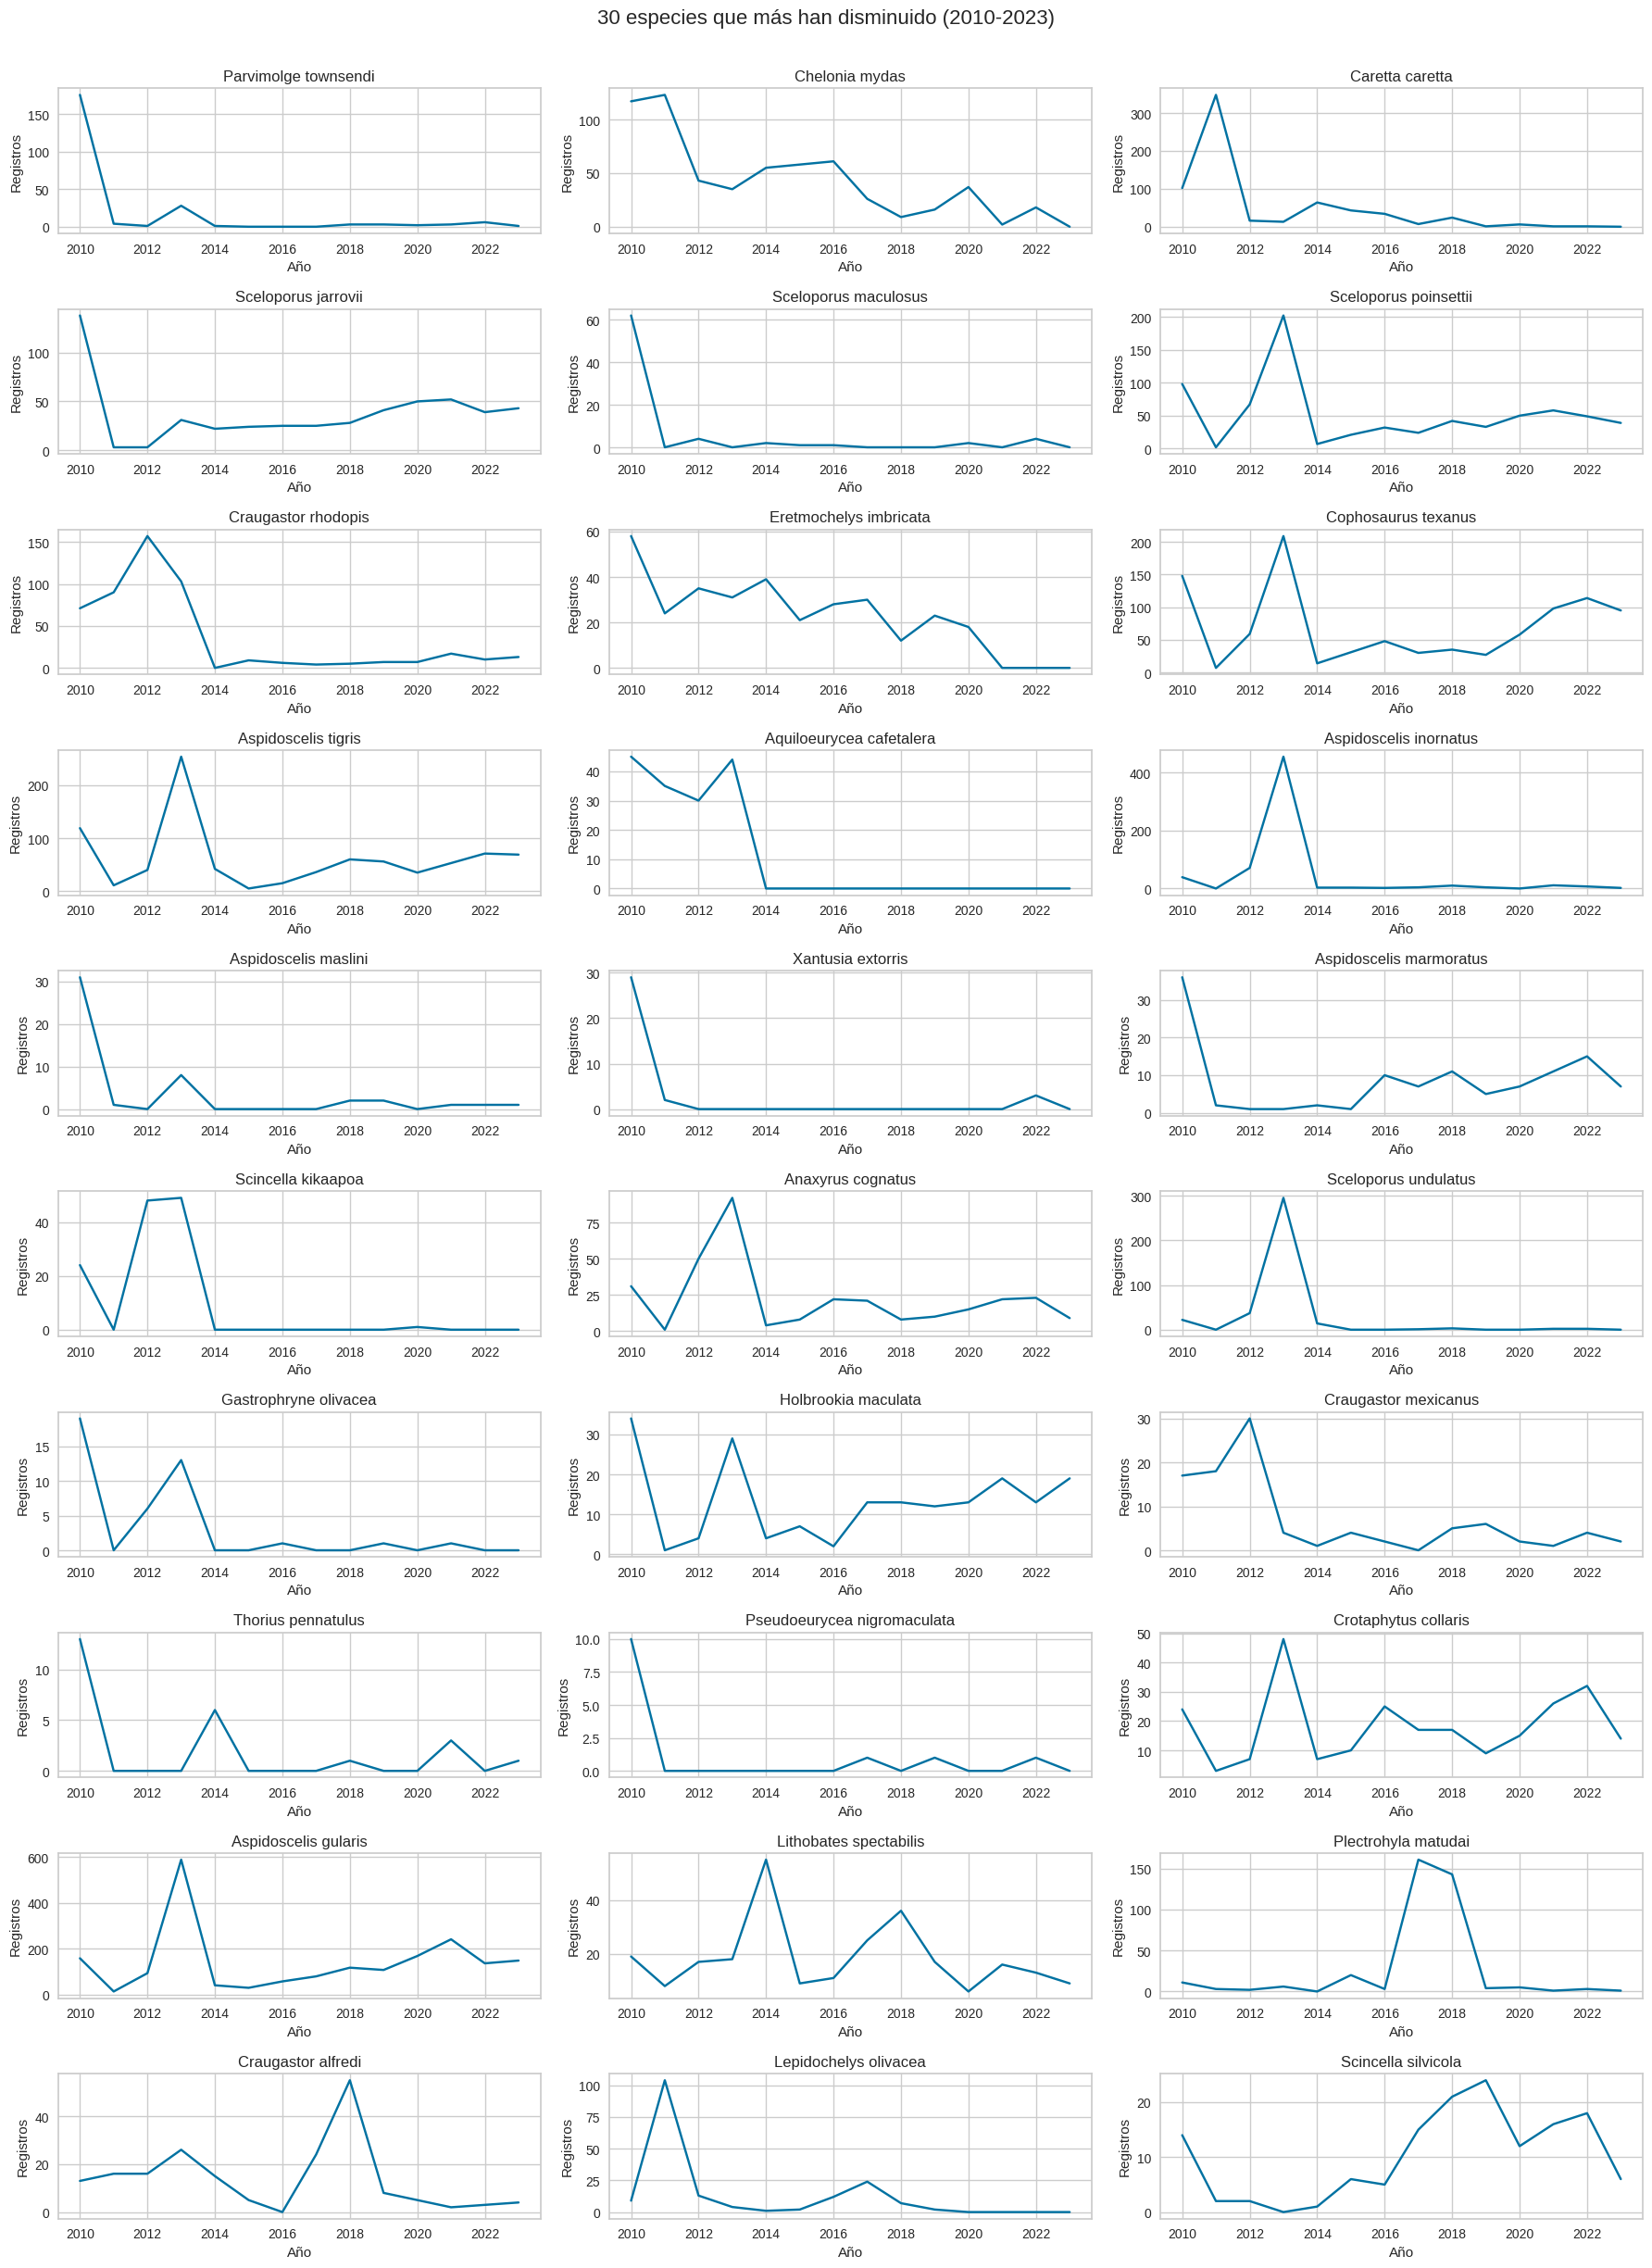

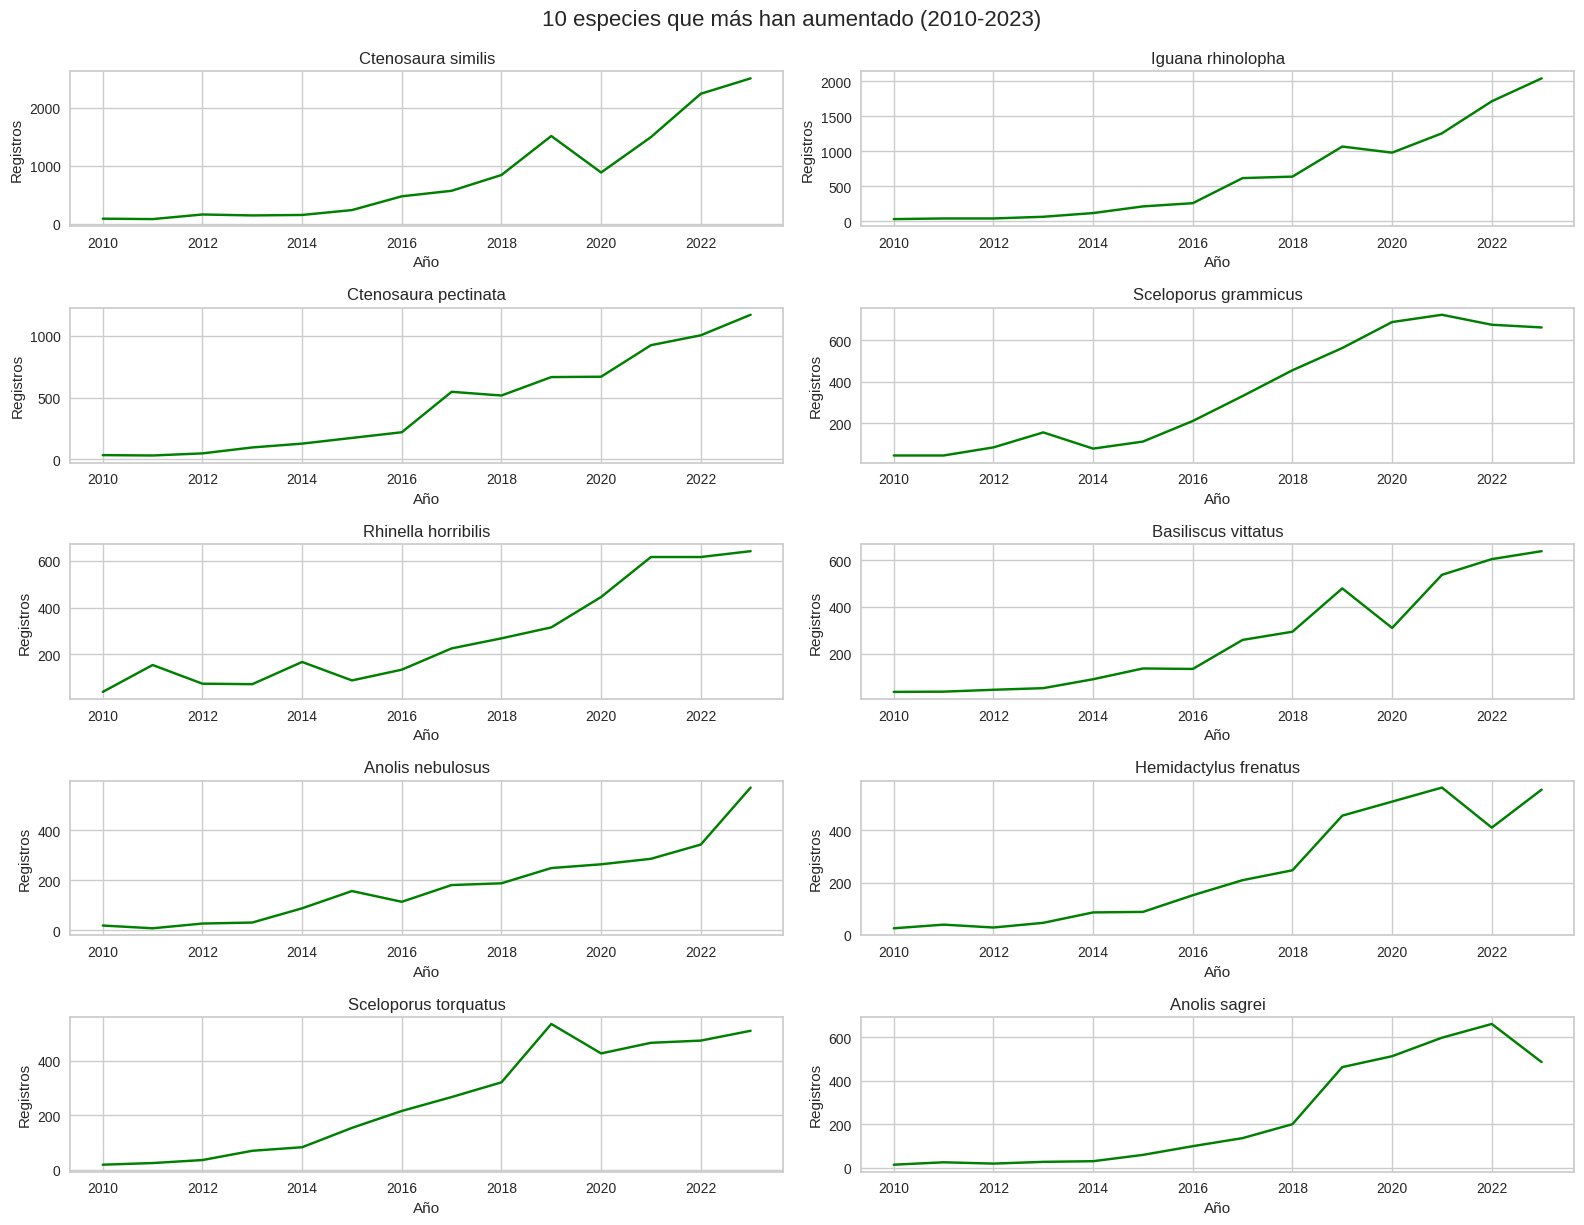

In [85]:
# Crear subgráficos para las especies que han disminuido
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(18, 24))
axs = axs.flatten()

for i, especie in enumerate(especies_bajan_14.index):
    axs[i].plot(pivot_14.index, pivot_14[especie])
    axs[i].set_title(especie)
    axs[i].set_xlabel("Año")
    axs[i].set_ylabel("Registros")

plt.tight_layout()
plt.suptitle("30 especies que más han disminuido (2010-2023)", fontsize=16, y=1.02)
plt.show()

# Crear subgráficos para las especies que han aumentado
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
axs = axs.flatten()

for i, especie in enumerate(especies_suben_14.index):
    axs[i].plot(pivot_14.index, pivot_14[especie], color='green')
    axs[i].set_title(especie)
    axs[i].set_xlabel("Año")
    axs[i].set_ylabel("Registros")

plt.tight_layout()
plt.suptitle("10 especies que más han aumentado (2010-2023)", fontsize=16, y=1.02)
plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/6672pui_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/8l9q3omq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75833', 'data', 'file=/tmp/tmpygyzy8hz/6672pui_.json', 'init=/tmp/tmpygyzy8hz/8l9q3omq.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelnf61twd7/prophet_model-20250514085507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


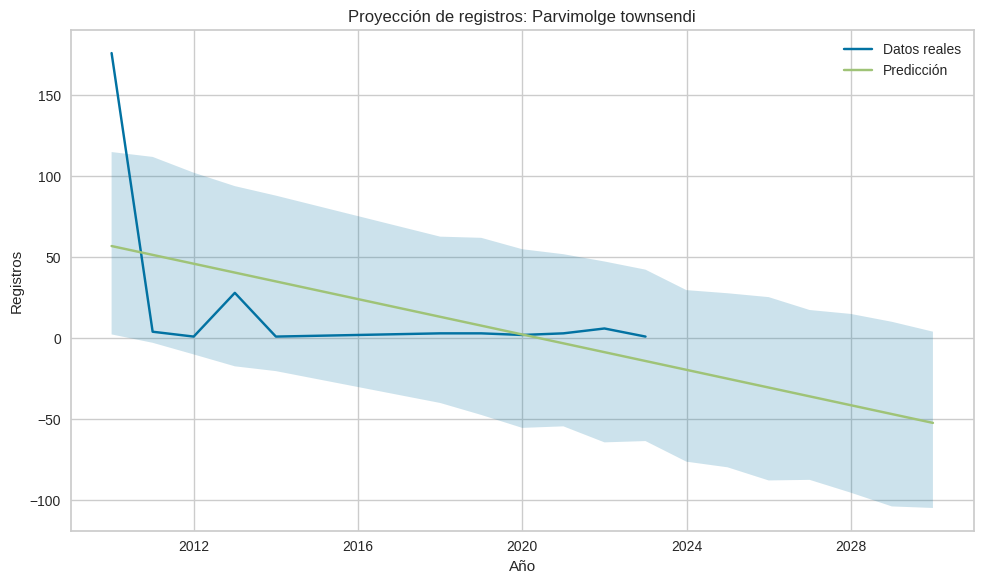

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/ptypaits.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/ga4izoc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56866', 'data', 'file=/tmp/tmpygyzy8hz/ptypaits.json', 'init=/tmp/tmpygyzy8hz/ga4izoc_.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelgknzw2k3/prophet_model-20250514085507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


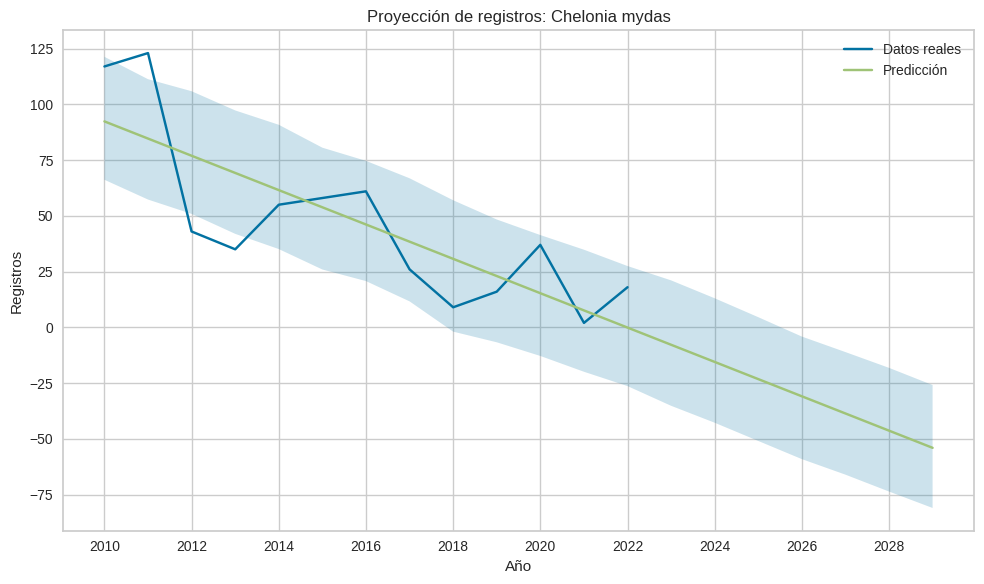

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/19dy5z2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/cd5zsifa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32340', 'data', 'file=/tmp/tmpygyzy8hz/19dy5z2l.json', 'init=/tmp/tmpygyzy8hz/cd5zsifa.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelxdxnlto0/prophet_model-20250514085507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


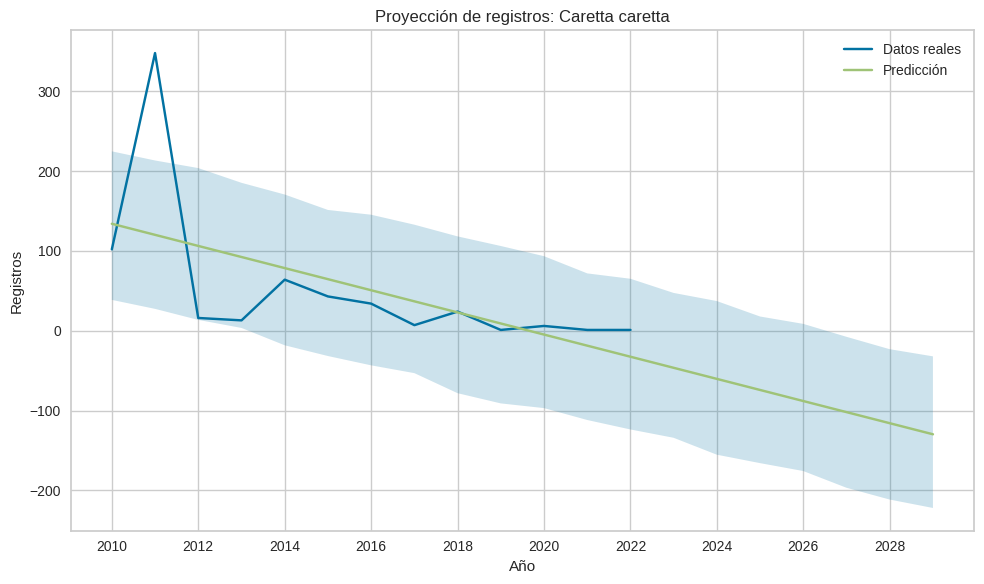

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/w_m8j6d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/tc5ue3fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23915', 'data', 'file=/tmp/tmpygyzy8hz/w_m8j6d0.json', 'init=/tmp/tmpygyzy8hz/tc5ue3fm.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model7uz5r0w7/prophet_model-20250514085508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

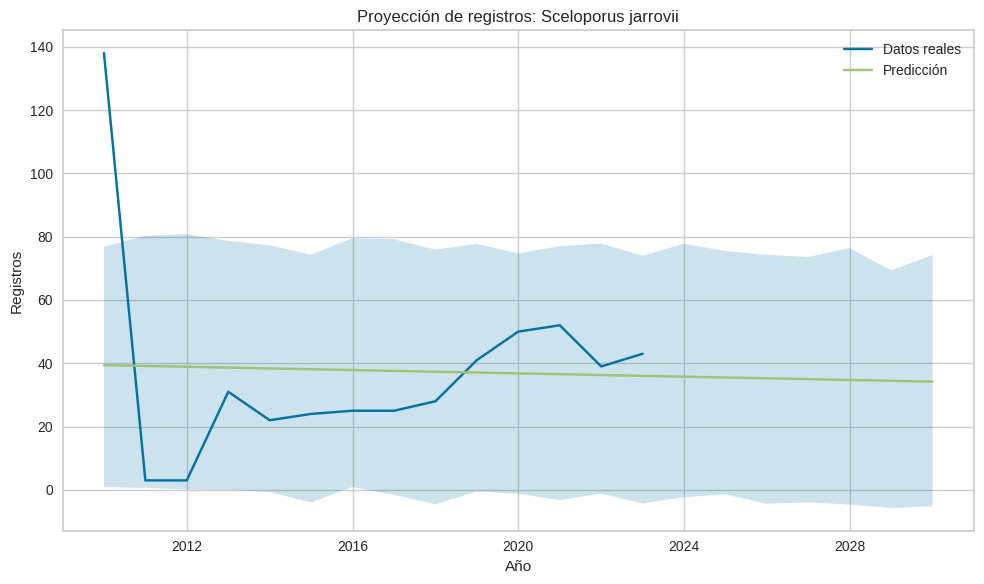

INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/33g05mbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/3rg40qu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36390', 'data', 'file=/tmp/tmpygyzy8hz/33g05mbw.json', 'init=/tmp/tmpygyzy8hz/3rg40qu_.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelk1hom8zl/prophet_model-20250514085508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


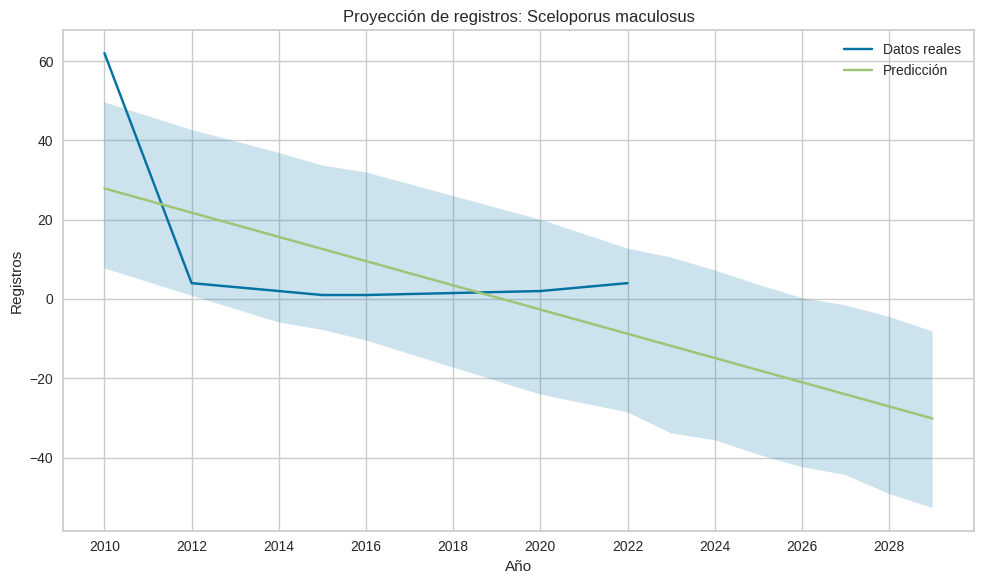

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/n11rjhs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/ihjcki2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29535', 'data', 'file=/tmp/tmpygyzy8hz/n11rjhs7.json', 'init=/tmp/tmpygyzy8hz/ihjcki2f.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model32cjo7l6/prophet_model-20250514085508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

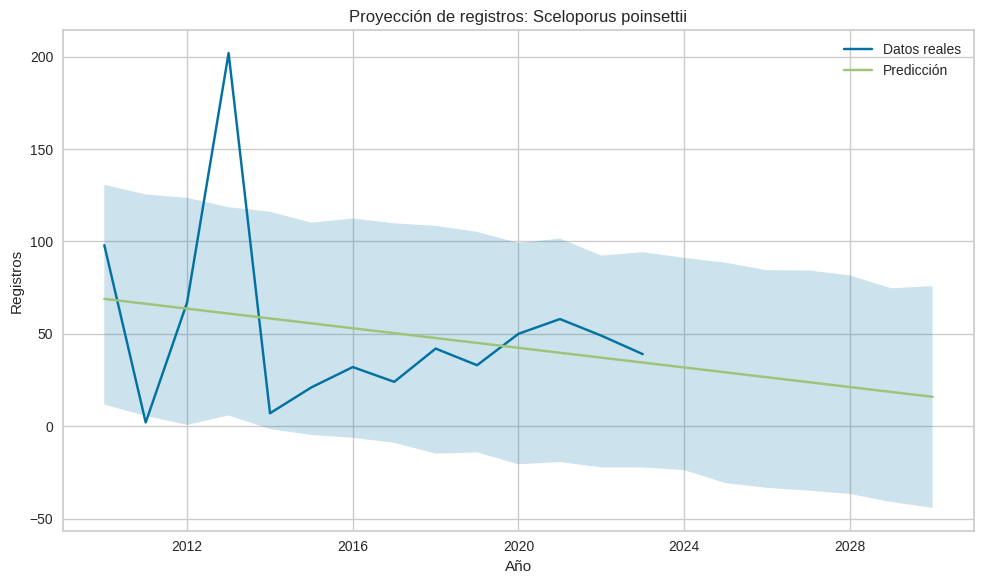

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/x52vlhfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/h94c5_yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42769', 'data', 'file=/tmp/tmpygyzy8hz/x52vlhfe.json', 'init=/tmp/tmpygyzy8hz/h94c5_yv.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelvkjxa3yd/prophet_model-20250514085509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


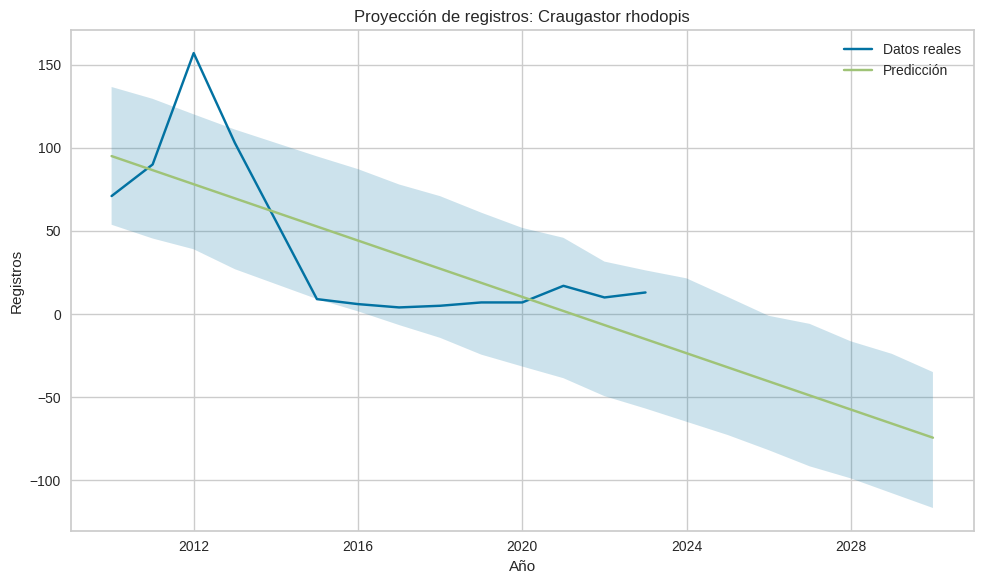

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/5hi1ad6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/u0rnrdvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30872', 'data', 'file=/tmp/tmpygyzy8hz/5hi1ad6y.json', 'init=/tmp/tmpygyzy8hz/u0rnrdvp.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_models4bkwibv/prophet_model-20250514085509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


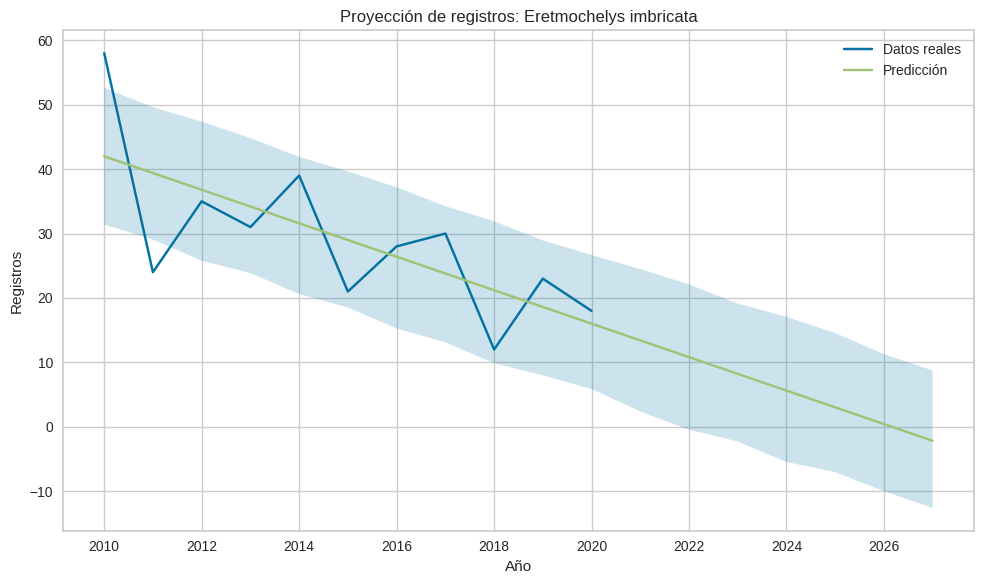

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/ljlka9w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/jnb61ax_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43008', 'data', 'file=/tmp/tmpygyzy8hz/ljlka9w8.json', 'init=/tmp/tmpygyzy8hz/jnb61ax_.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelv438ddea/prophet_model-20250514085509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

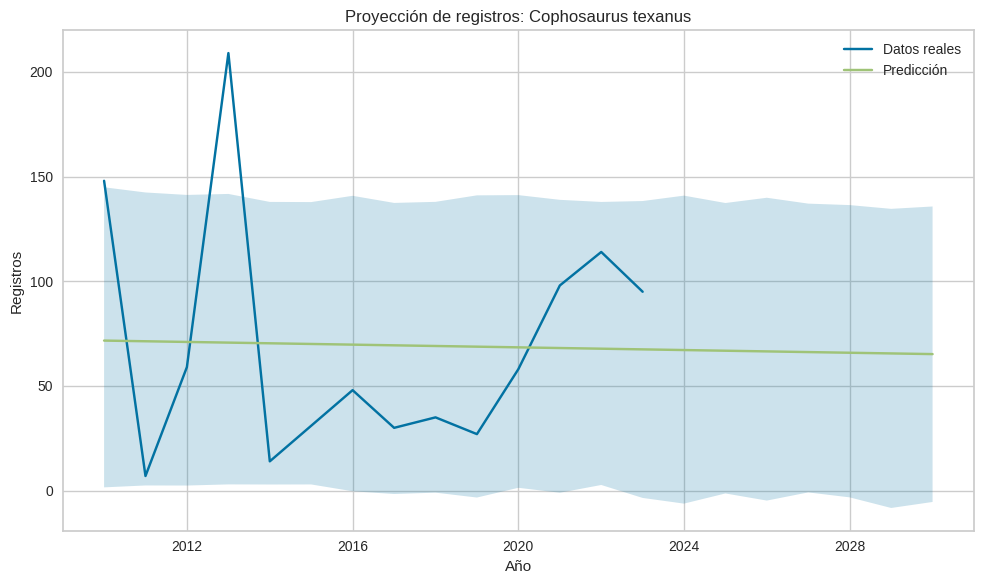

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/pyijawec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/n190gd56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69374', 'data', 'file=/tmp/tmpygyzy8hz/pyijawec.json', 'init=/tmp/tmpygyzy8hz/n190gd56.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelroqhpv2p/prophet_model-20250514085510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

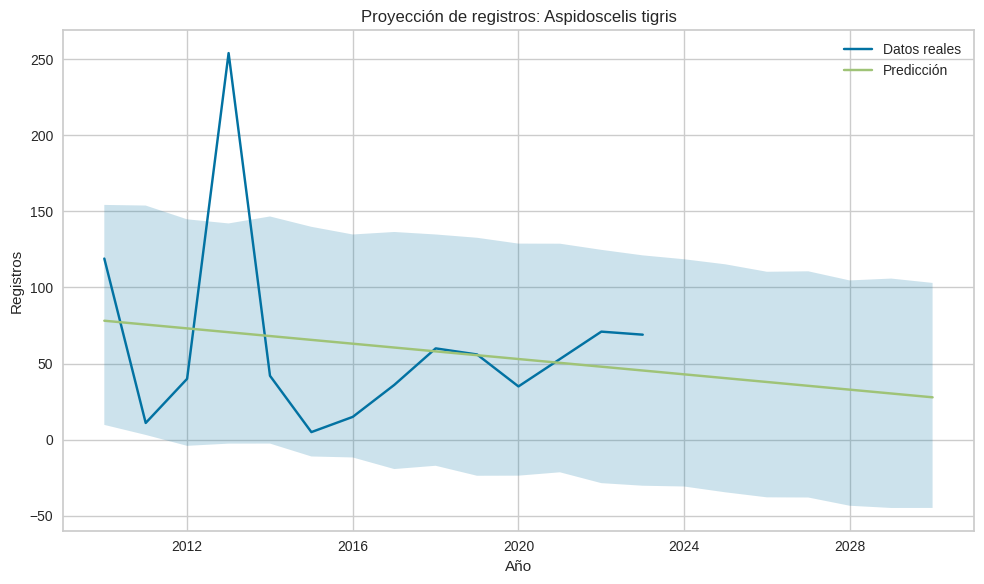

INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/k3faikb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/fjvw0njo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88556', 'data', 'file=/tmp/tmpygyzy8hz/k3faikb0.json', 'init=/tmp/tmpygyzy8hz/fjvw0njo.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelm4_m_oy_/prophet_model-20250514085510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


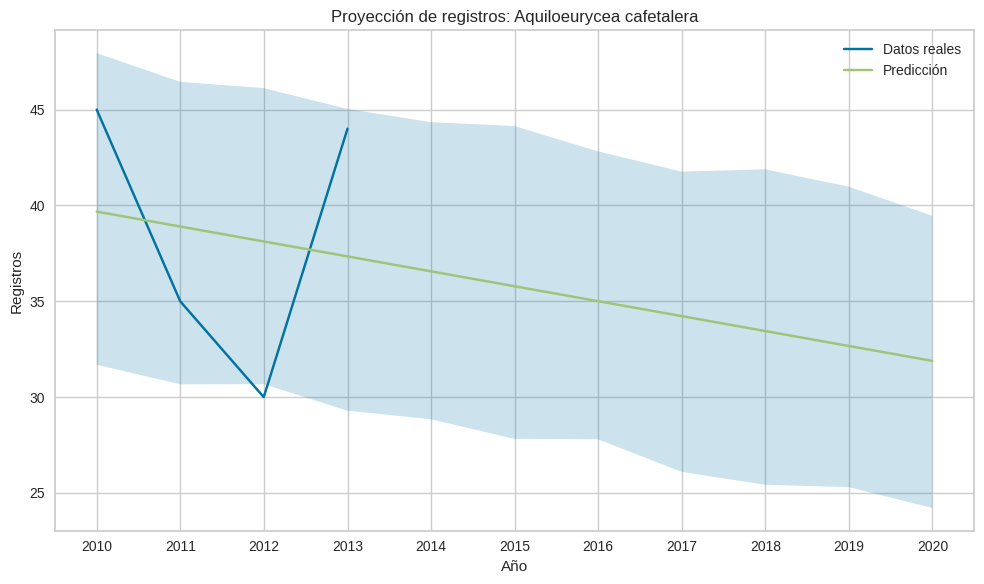

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/xvfyvx77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/qu6yn0cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21260', 'data', 'file=/tmp/tmpygyzy8hz/xvfyvx77.json', 'init=/tmp/tmpygyzy8hz/qu6yn0cd.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model374k1ab6/prophet_model-20250514085511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


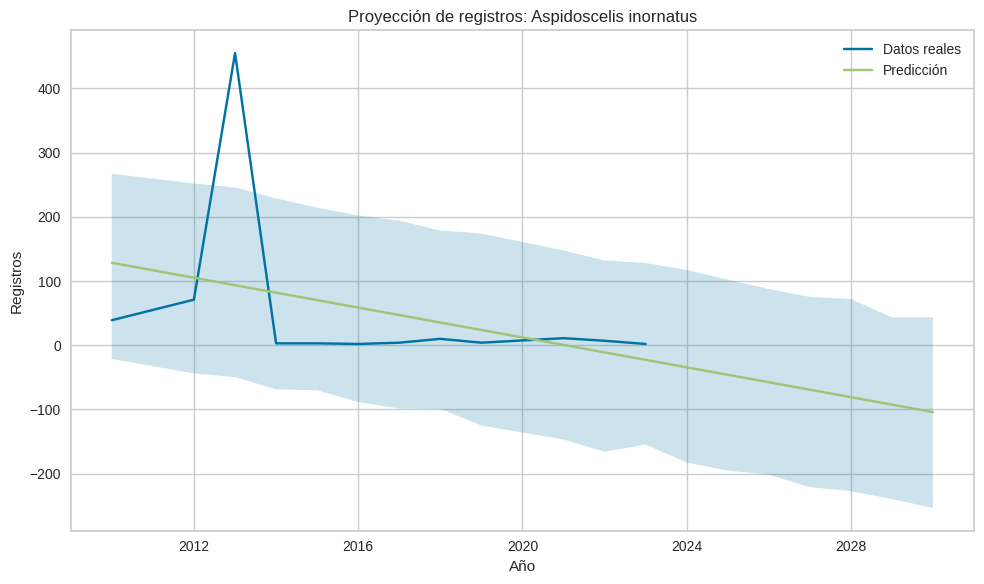

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/yyi1upj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/3gwqpf_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55022', 'data', 'file=/tmp/tmpygyzy8hz/yyi1upj_.json', 'init=/tmp/tmpygyzy8hz/3gwqpf_e.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model1pg86s83/prophet_model-20250514085511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


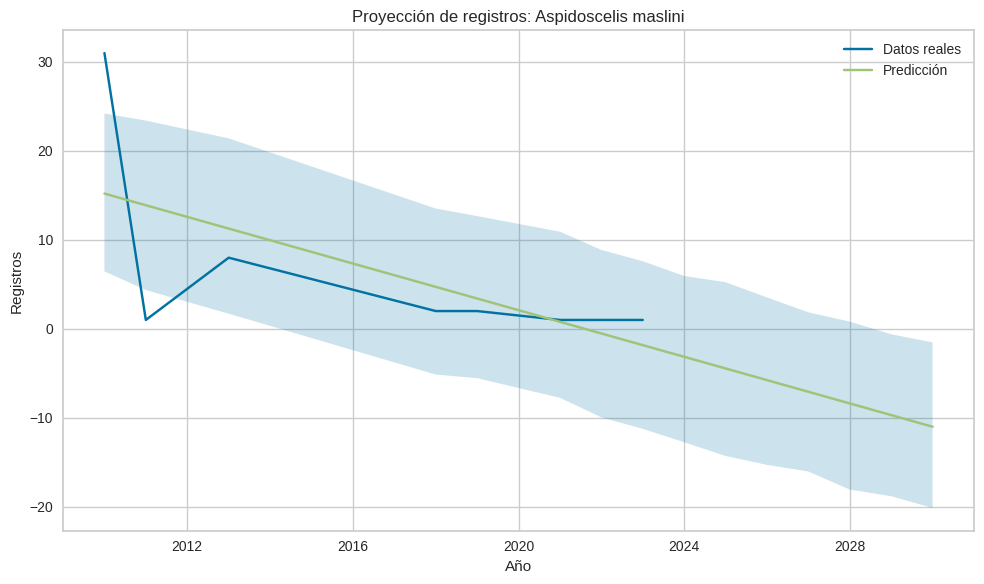

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/jdnv7w19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/ir1cm6nn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28405', 'data', 'file=/tmp/tmpygyzy8hz/jdnv7w19.json', 'init=/tmp/tmpygyzy8hz/ir1cm6nn.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model6h3_cupu/prophet_model-20250514085511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

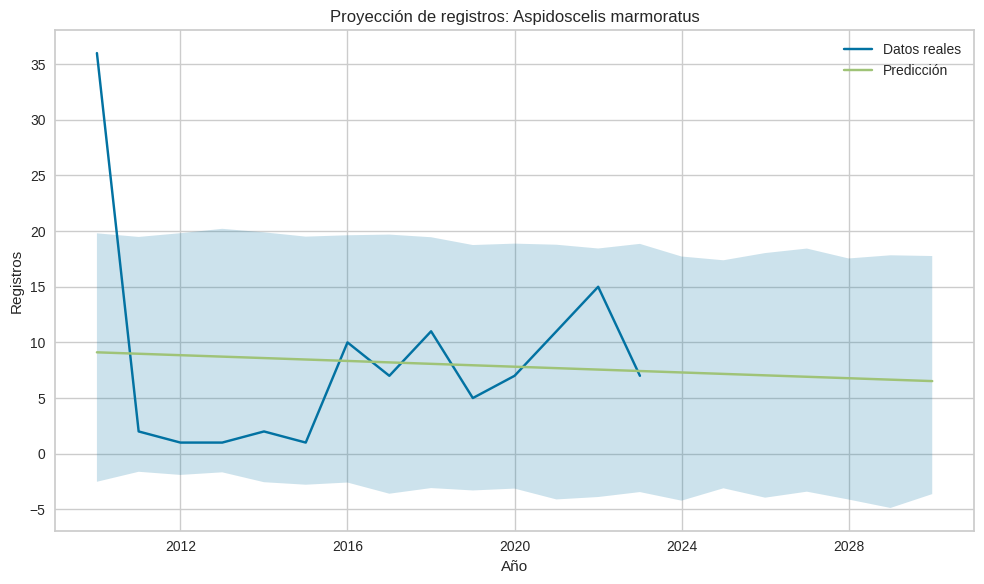

INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/qq_yky22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/562qqbx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42962', 'data', 'file=/tmp/tmpygyzy8hz/qq_yky22.json', 'init=/tmp/tmpygyzy8hz/562qqbx5.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model58_oh638/prophet_model-20250514085512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


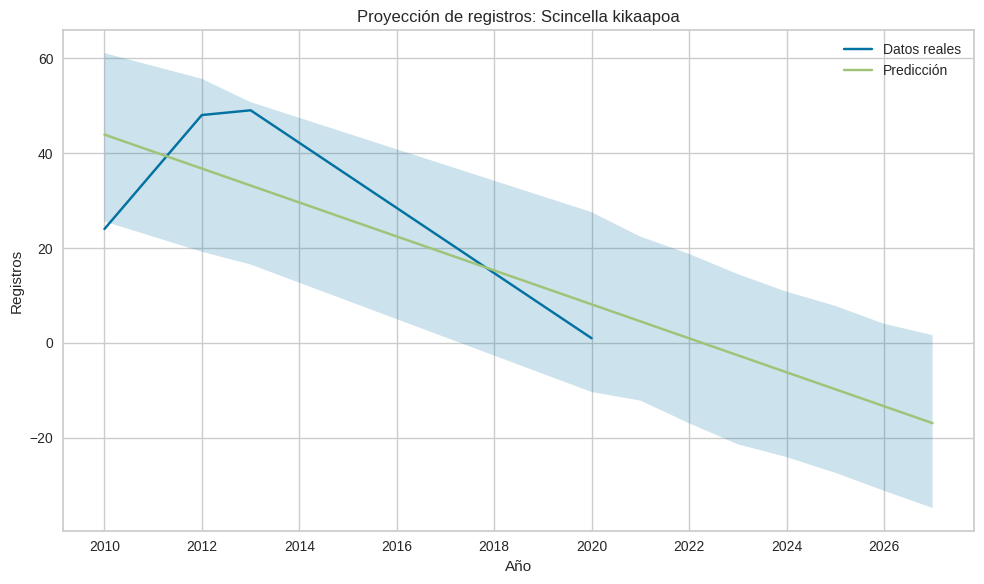

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/j5f4ks4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/hp44mri6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67886', 'data', 'file=/tmp/tmpygyzy8hz/j5f4ks4s.json', 'init=/tmp/tmpygyzy8hz/hp44mri6.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model4adolhgc/prophet_model-20250514085512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

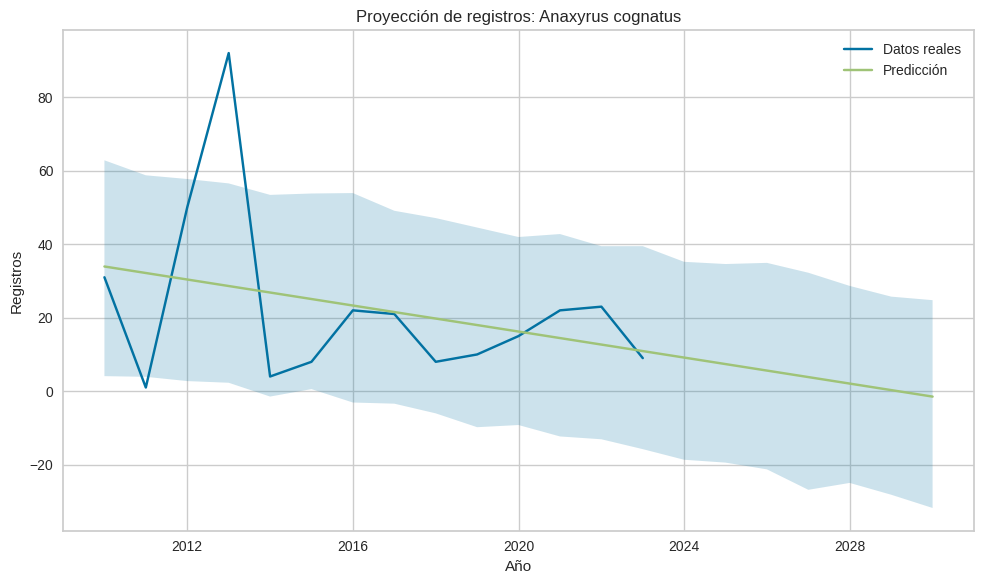

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/jsojcqfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/4fr1l1c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24510', 'data', 'file=/tmp/tmpygyzy8hz/jsojcqfx.json', 'init=/tmp/tmpygyzy8hz/4fr1l1c1.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model6v3aeqj0/prophet_model-20250514085512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


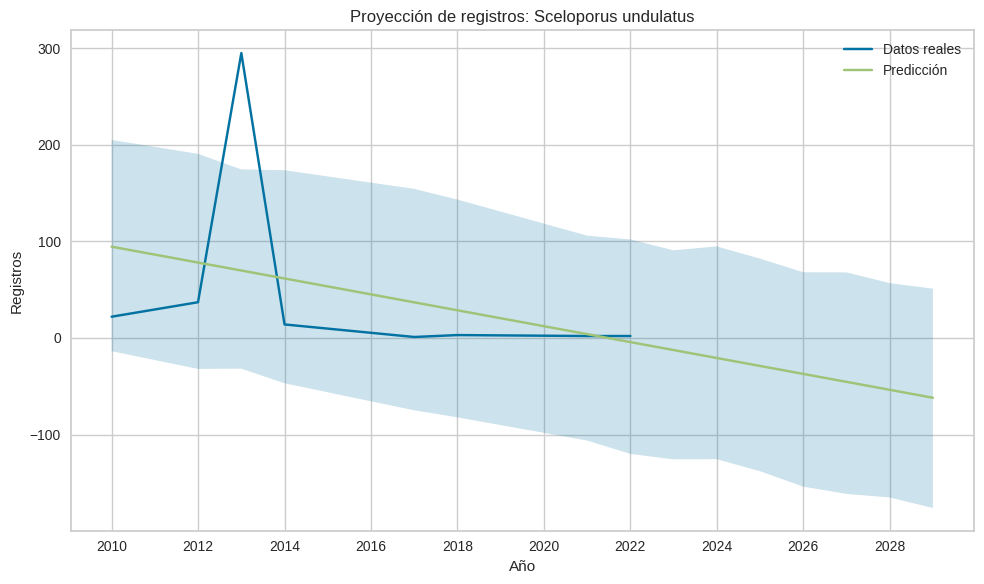

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/h0b8h73r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/lm7ildur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49391', 'data', 'file=/tmp/tmpygyzy8hz/h0b8h73r.json', 'init=/tmp/tmpygyzy8hz/lm7ildur.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model25hmh6oc/prophet_model-20250514085513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


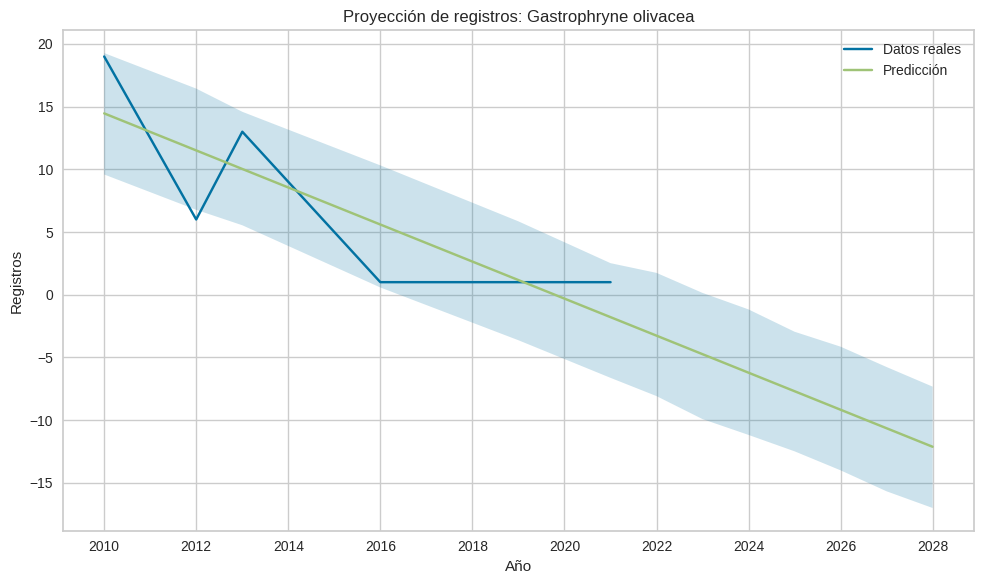

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/hbygengn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/va8p4vr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18600', 'data', 'file=/tmp/tmpygyzy8hz/hbygengn.json', 'init=/tmp/tmpygyzy8hz/va8p4vr3.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelbu8s5ux0/prophet_model-20250514085513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

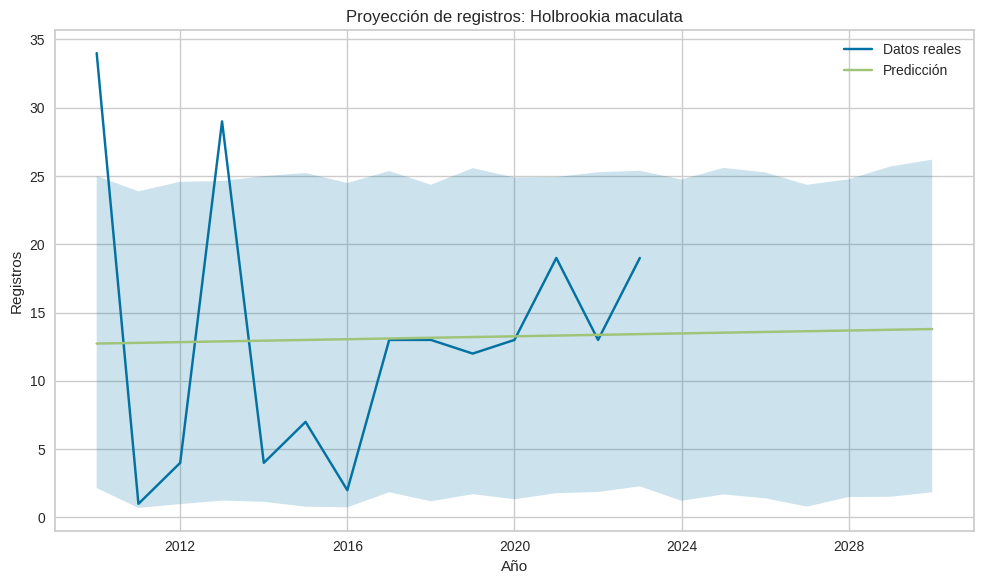

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/h7wjxl2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/5bhj5drw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53823', 'data', 'file=/tmp/tmpygyzy8hz/h7wjxl2v.json', 'init=/tmp/tmpygyzy8hz/5bhj5drw.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modele7ipy63l/prophet_model-20250514085514.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


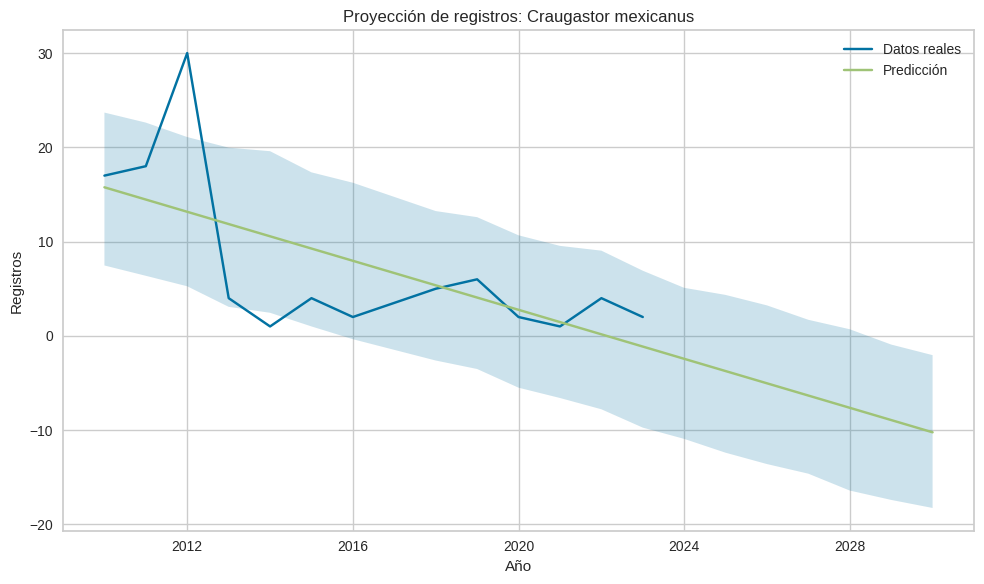

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/nvw6757j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/hi3j8s2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4960', 'data', 'file=/tmp/tmpygyzy8hz/nvw6757j.json', 'init=/tmp/tmpygyzy8hz/hi3j8s2r.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelku21pyd3/prophet_model-20250514085514.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
 

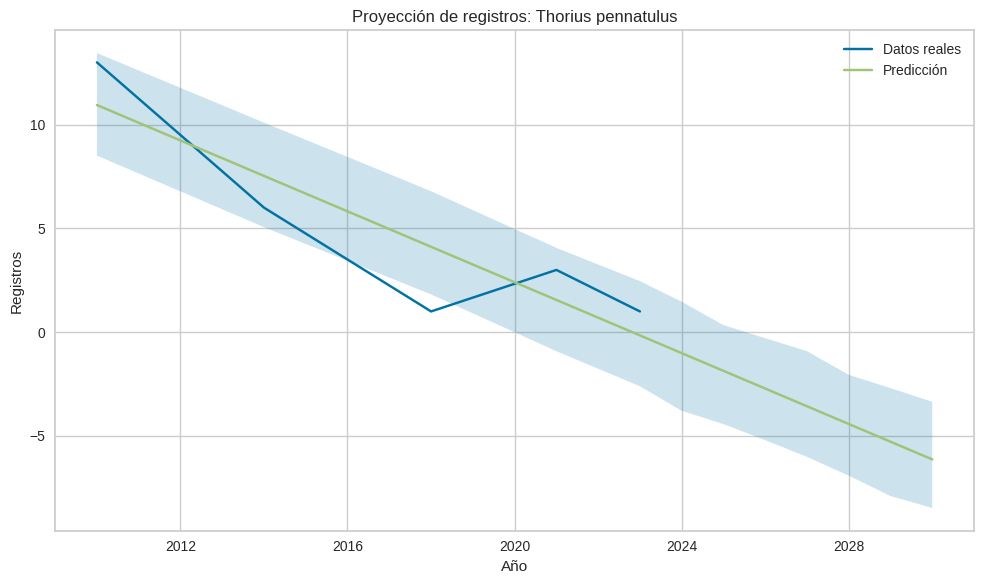

INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/e2kca8r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/6pjhr0hk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33839', 'data', 'file=/tmp/tmpygyzy8hz/e2kca8r7.json', 'init=/tmp/tmpygyzy8hz/6pjhr0hk.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelbdn09ck9/prophet_model-20250514085515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


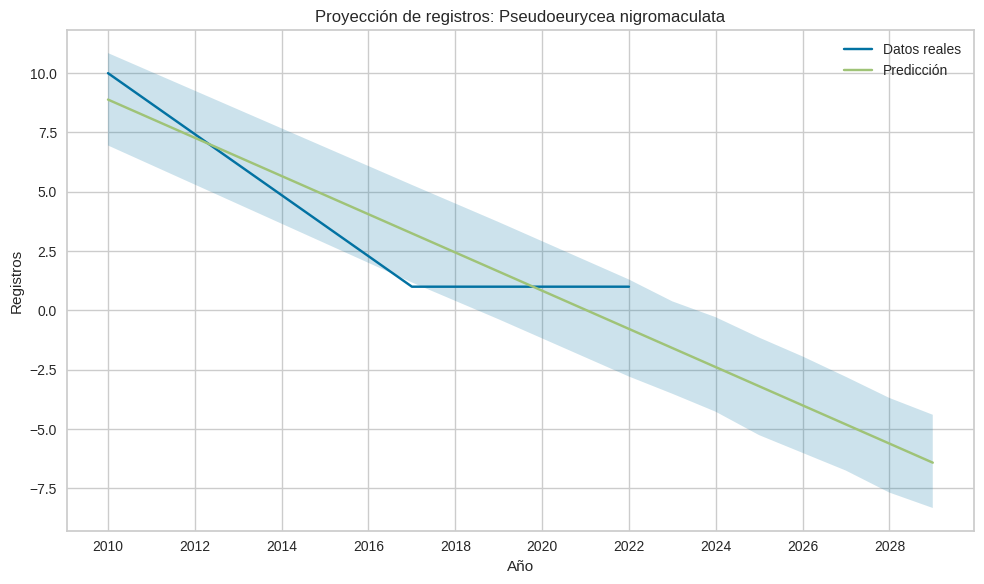

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/o9jl0vwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/rrid5vfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14027', 'data', 'file=/tmp/tmpygyzy8hz/o9jl0vwx.json', 'init=/tmp/tmpygyzy8hz/rrid5vfs.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model6xuu3dr4/prophet_model-20250514085516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

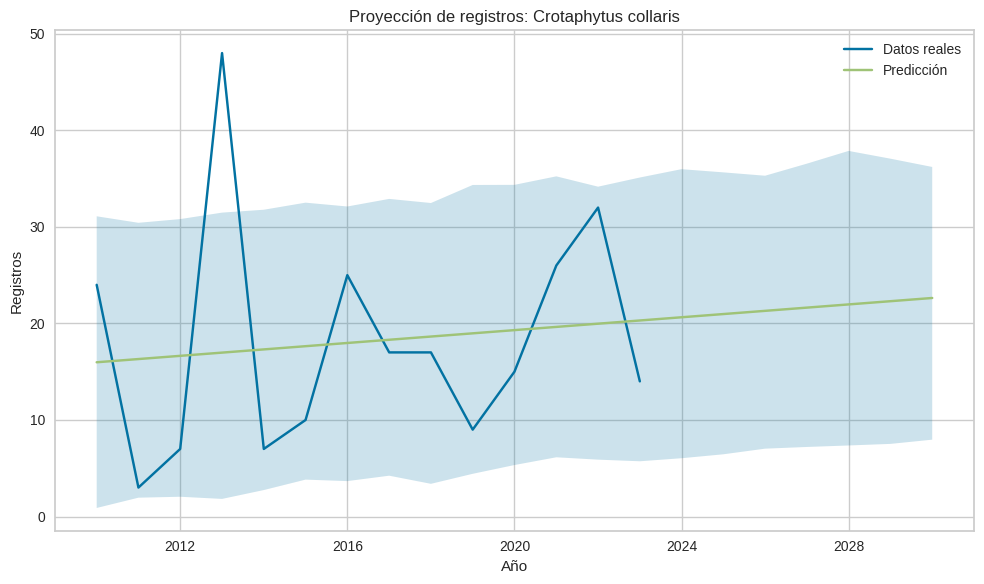

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/15pjs_mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/jqlohmdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40043', 'data', 'file=/tmp/tmpygyzy8hz/15pjs_mj.json', 'init=/tmp/tmpygyzy8hz/jqlohmdp.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelbw1yxcne/prophet_model-20250514085517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

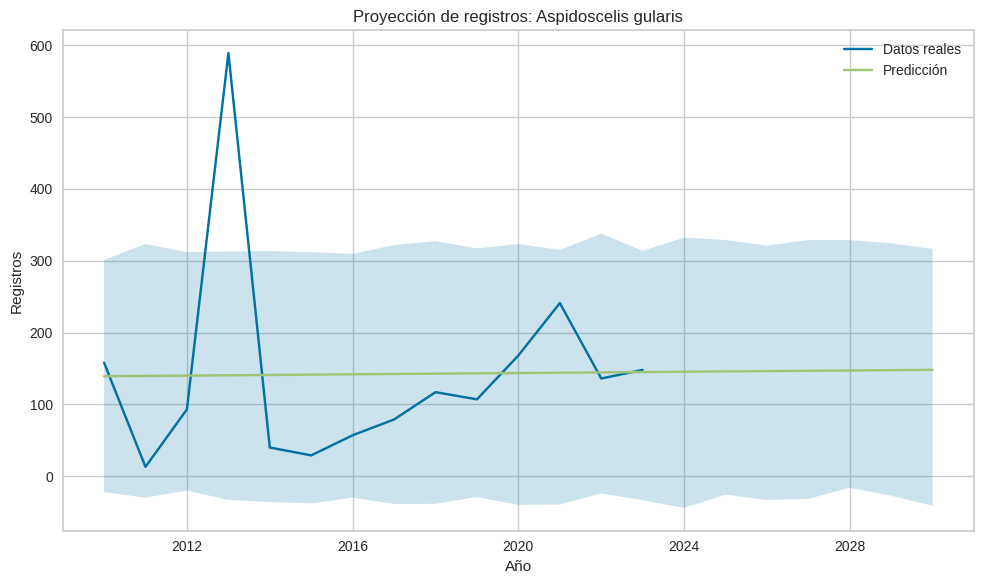

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/sd6w4x7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/_i8os4yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35620', 'data', 'file=/tmp/tmpygyzy8hz/sd6w4x7f.json', 'init=/tmp/tmpygyzy8hz/_i8os4yk.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelbr1sg8tb/prophet_model-20250514085518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

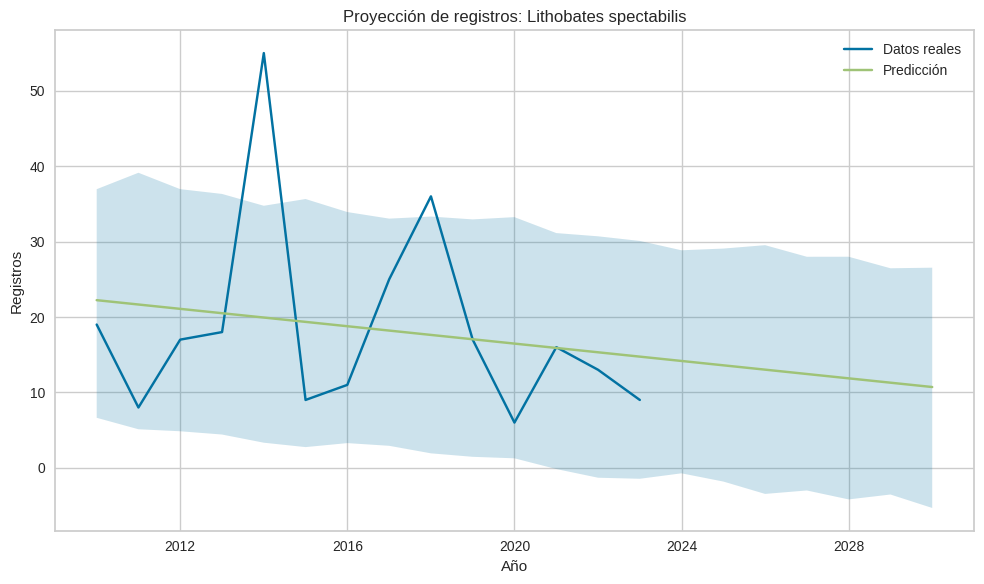

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/w1_khypt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/cy3_193o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70294', 'data', 'file=/tmp/tmpygyzy8hz/w1_khypt.json', 'init=/tmp/tmpygyzy8hz/cy3_193o.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model_ns5r_t1/prophet_model-20250514085519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


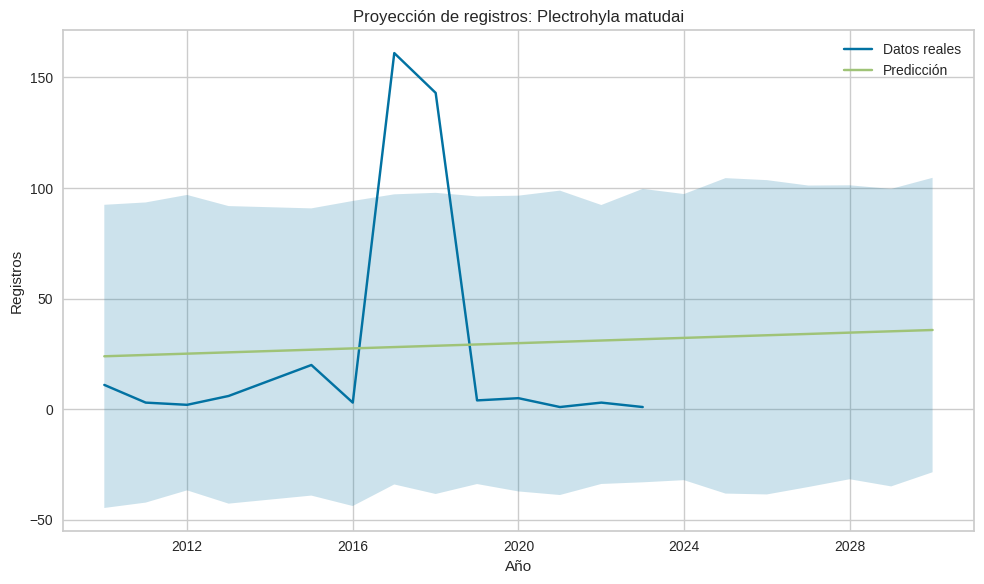

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/b7c9fxab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/dvgvcadx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96859', 'data', 'file=/tmp/tmpygyzy8hz/b7c9fxab.json', 'init=/tmp/tmpygyzy8hz/dvgvcadx.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelxpyec7nb/prophet_model-20250514085519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


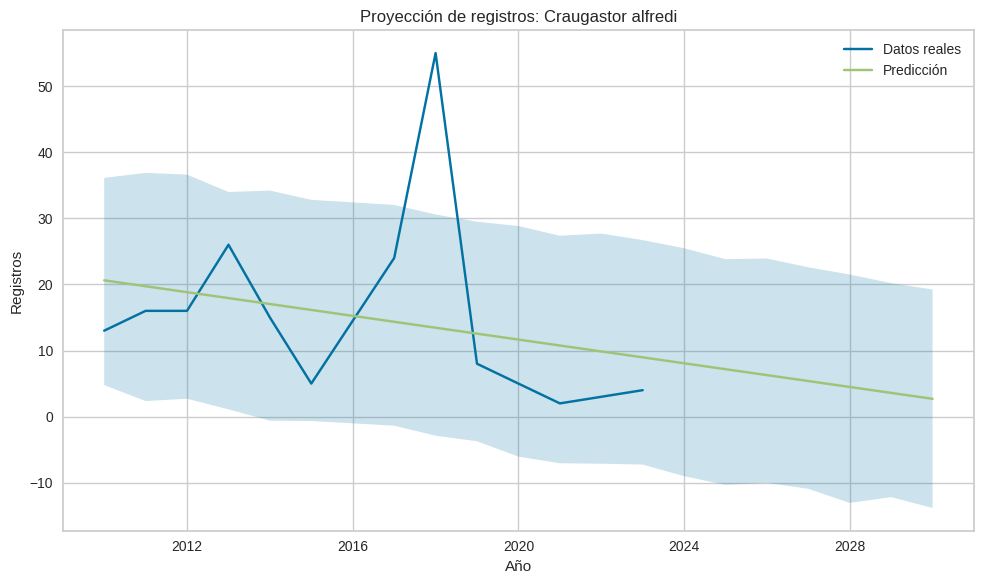

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/cydnf0t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/n6pox1k_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18903', 'data', 'file=/tmp/tmpygyzy8hz/cydnf0t5.json', 'init=/tmp/tmpygyzy8hz/n6pox1k_.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model1j282heb/prophet_model-20250514085521.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


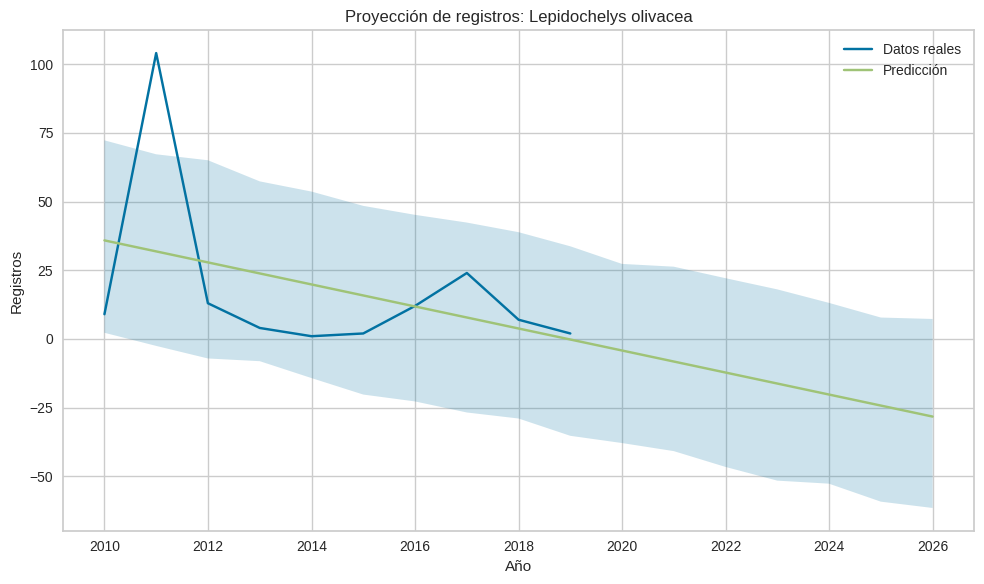

INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/87u086_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/m5fvty_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10516', 'data', 'file=/tmp/tmpygyzy8hz/87u086_9.json', 'init=/tmp/tmpygyzy8hz/m5fvty_0.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelt0khw5mr/prophet_model-20250514085522.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


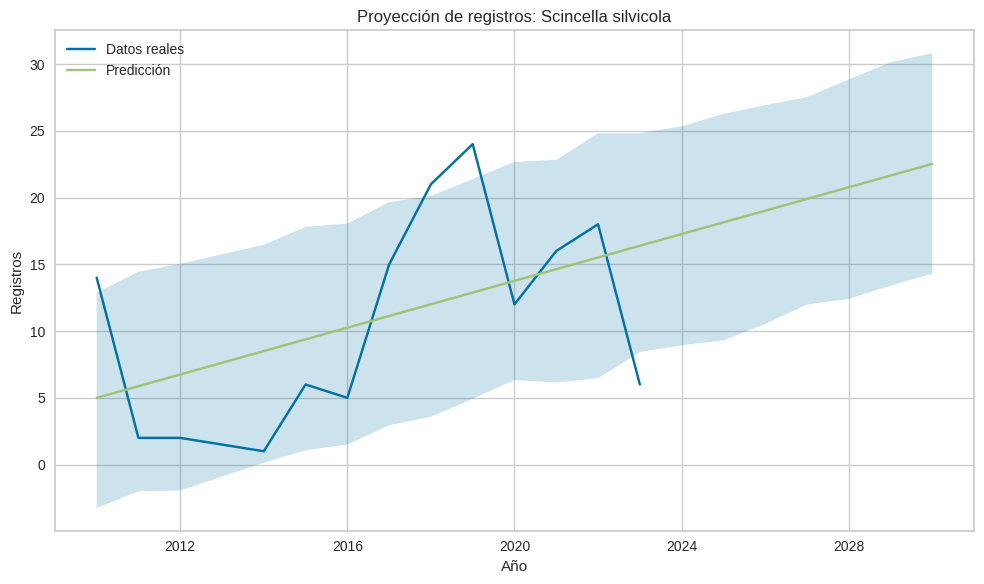

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/qrsnunqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/m7ta2zld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69478', 'data', 'file=/tmp/tmpygyzy8hz/qrsnunqx.json', 'init=/tmp/tmpygyzy8hz/m7ta2zld.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model9ujk19b2/prophet_model-20250514085523.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

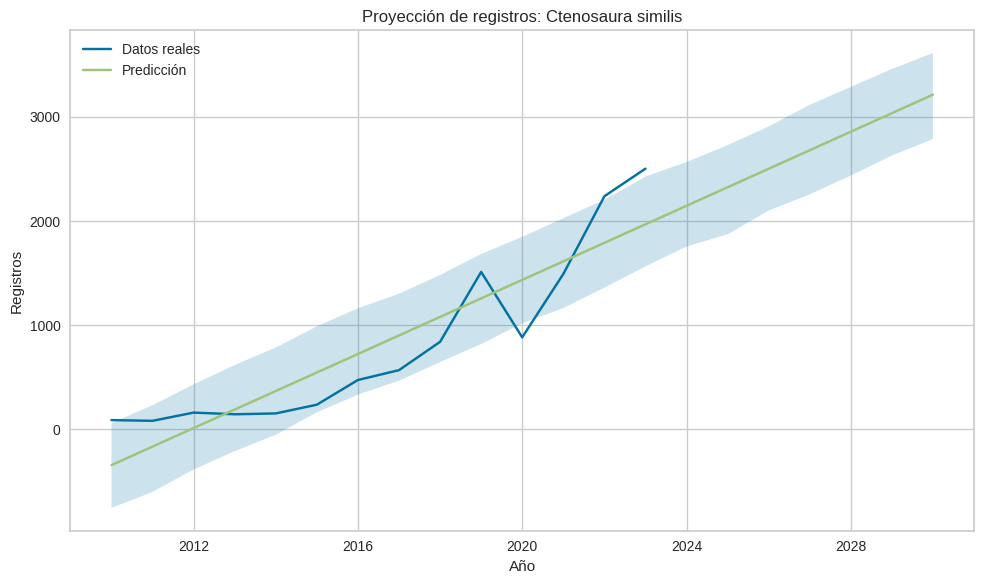

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/k2mehihc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/i12gt8fe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61898', 'data', 'file=/tmp/tmpygyzy8hz/k2mehihc.json', 'init=/tmp/tmpygyzy8hz/i12gt8fe.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model4lobzct3/prophet_model-20250514085524.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

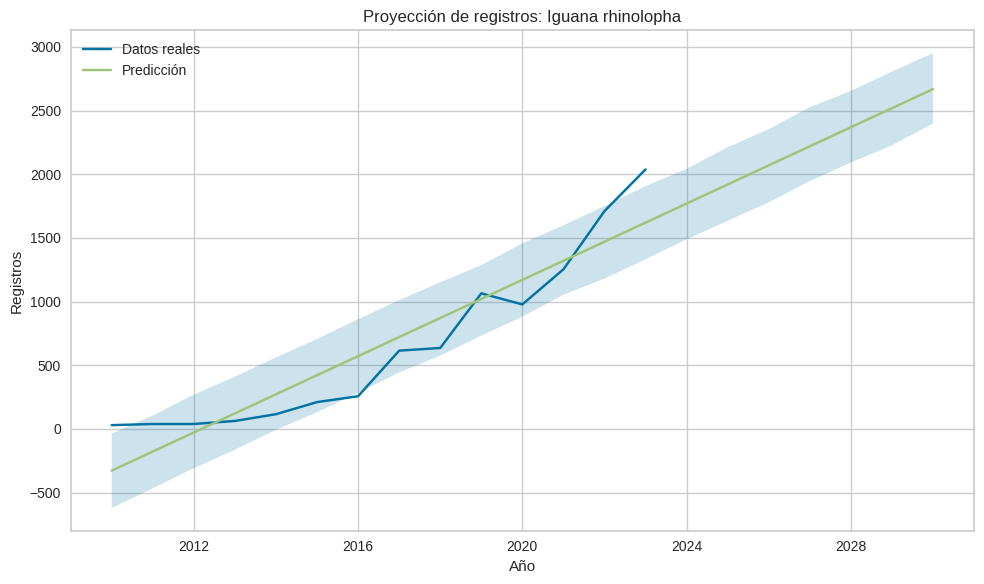

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/5u0yuqf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/gpba7z3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64446', 'data', 'file=/tmp/tmpygyzy8hz/5u0yuqf_.json', 'init=/tmp/tmpygyzy8hz/gpba7z3v.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modeloonhzur0/prophet_model-20250514085524.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

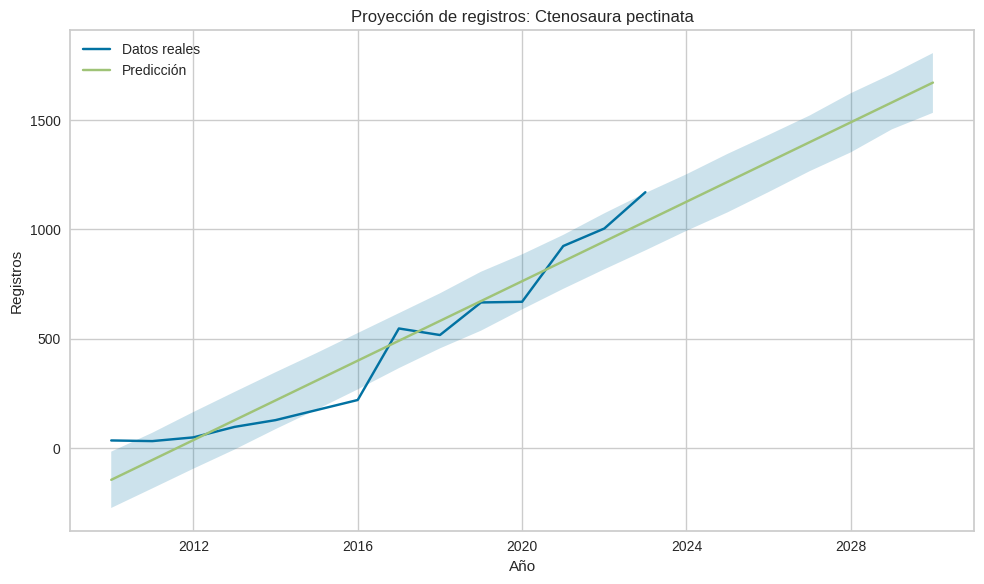

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/0x2zdo1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/k0j_y37_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58309', 'data', 'file=/tmp/tmpygyzy8hz/0x2zdo1t.json', 'init=/tmp/tmpygyzy8hz/k0j_y37_.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelaq7q2nw_/prophet_model-20250514085525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

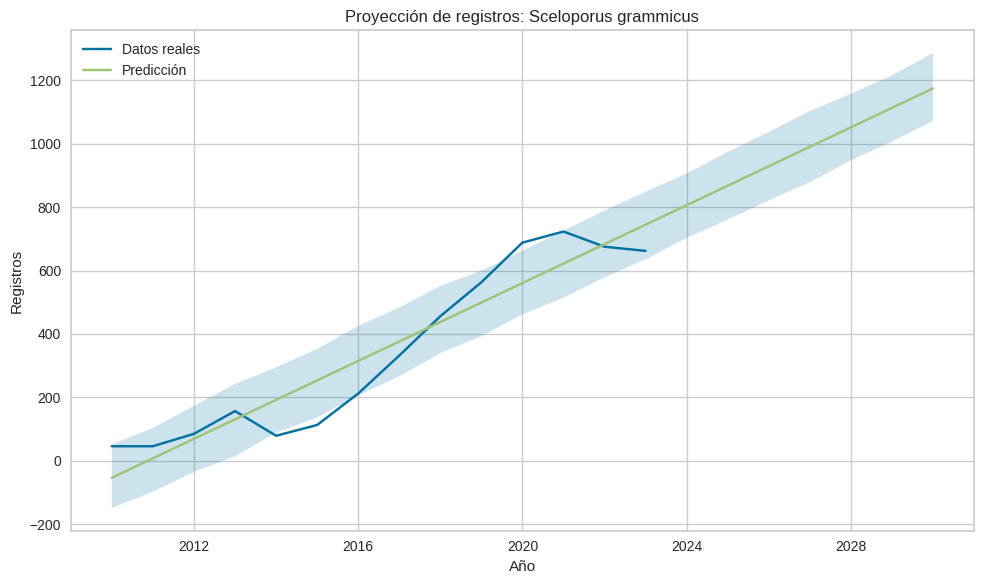

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/_sotforv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/k8niqhfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5346', 'data', 'file=/tmp/tmpygyzy8hz/_sotforv.json', 'init=/tmp/tmpygyzy8hz/k8niqhfv.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelf5prjjm2/prophet_model-20250514085525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


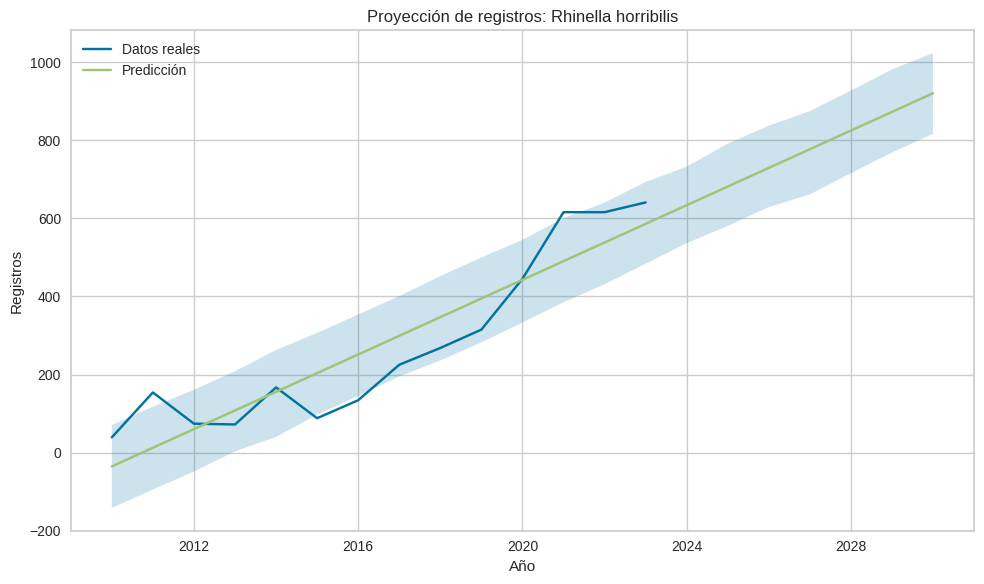

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/cljocsul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/s6w908ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66234', 'data', 'file=/tmp/tmpygyzy8hz/cljocsul.json', 'init=/tmp/tmpygyzy8hz/s6w908ku.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model8x9o2oih/prophet_model-20250514085525.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

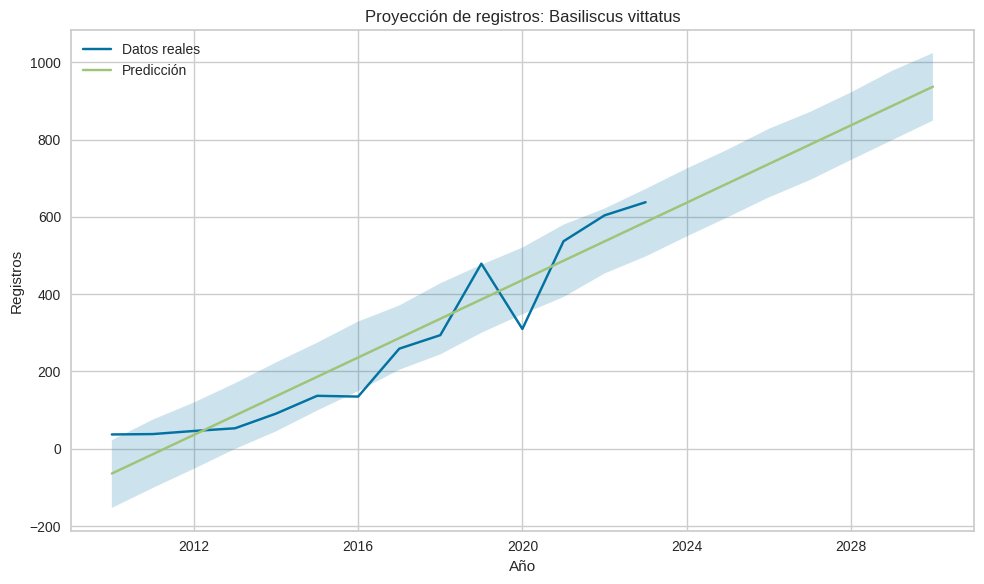

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/nh00r0o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/waskpq79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37816', 'data', 'file=/tmp/tmpygyzy8hz/nh00r0o2.json', 'init=/tmp/tmpygyzy8hz/waskpq79.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelqp98x377/prophet_model-20250514085526.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

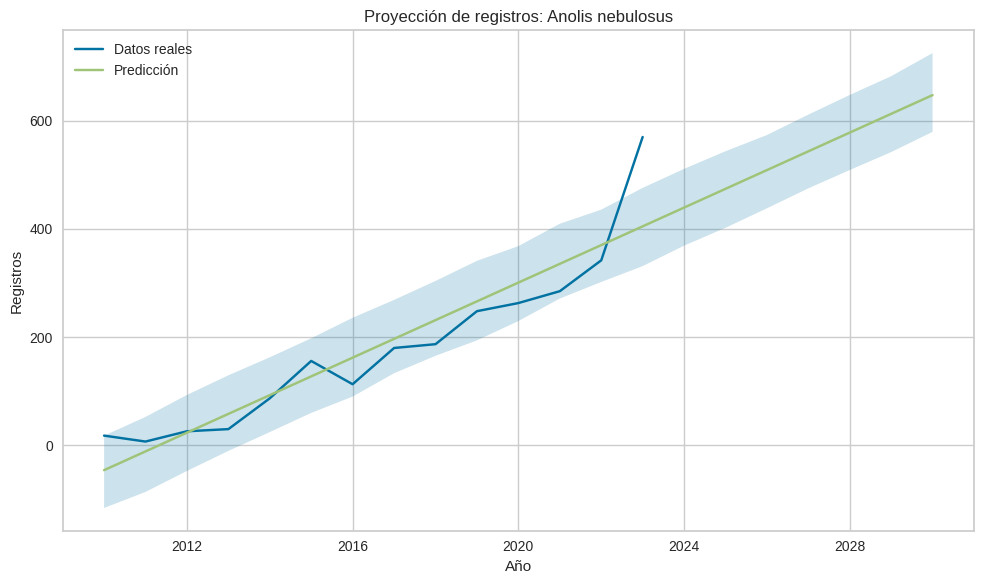

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/x8q4557_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/dqwyvslv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2819', 'data', 'file=/tmp/tmpygyzy8hz/x8q4557_.json', 'init=/tmp/tmpygyzy8hz/dqwyvslv.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelzb0pq3qa/prophet_model-20250514085526.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


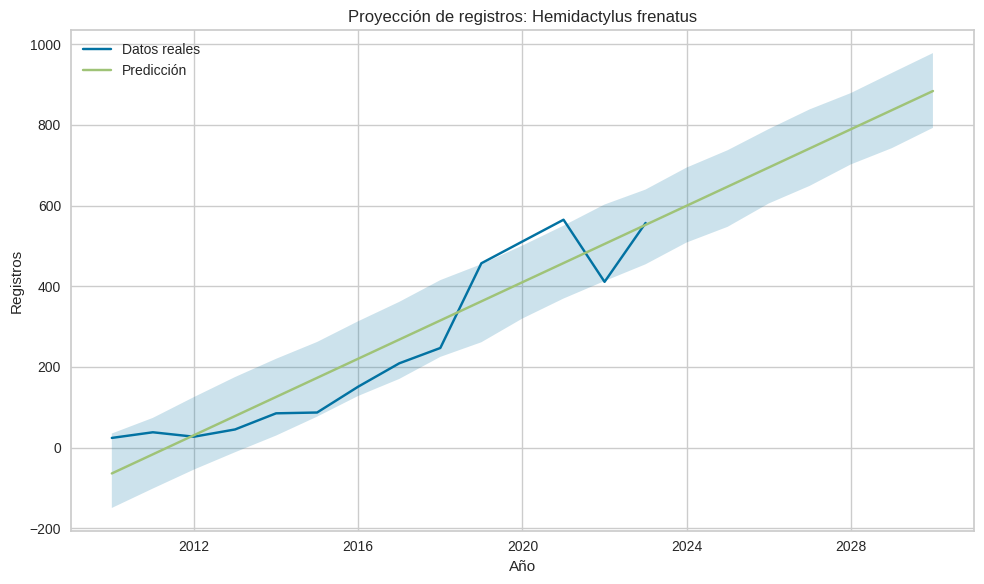

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/52wcgwlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/2y7zry7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84079', 'data', 'file=/tmp/tmpygyzy8hz/52wcgwlu.json', 'init=/tmp/tmpygyzy8hz/2y7zry7u.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelnn8d0vql/prophet_model-20250514085527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

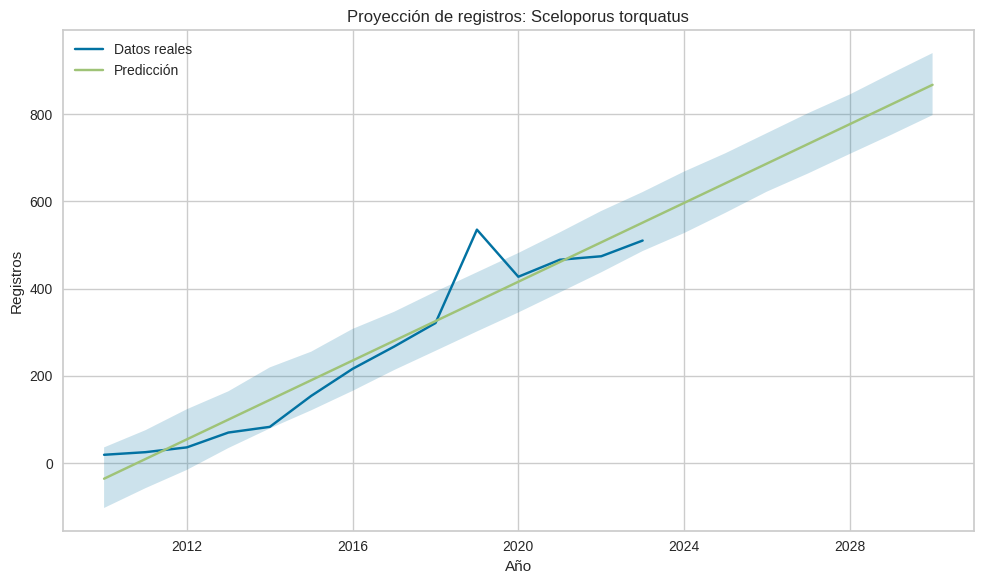

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/mu_yicwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/x40baqqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97070', 'data', 'file=/tmp/tmpygyzy8hz/mu_yicwn.json', 'init=/tmp/tmpygyzy8hz/x40baqqx.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_model8y_2sf4p/prophet_model-20250514085527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:55:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

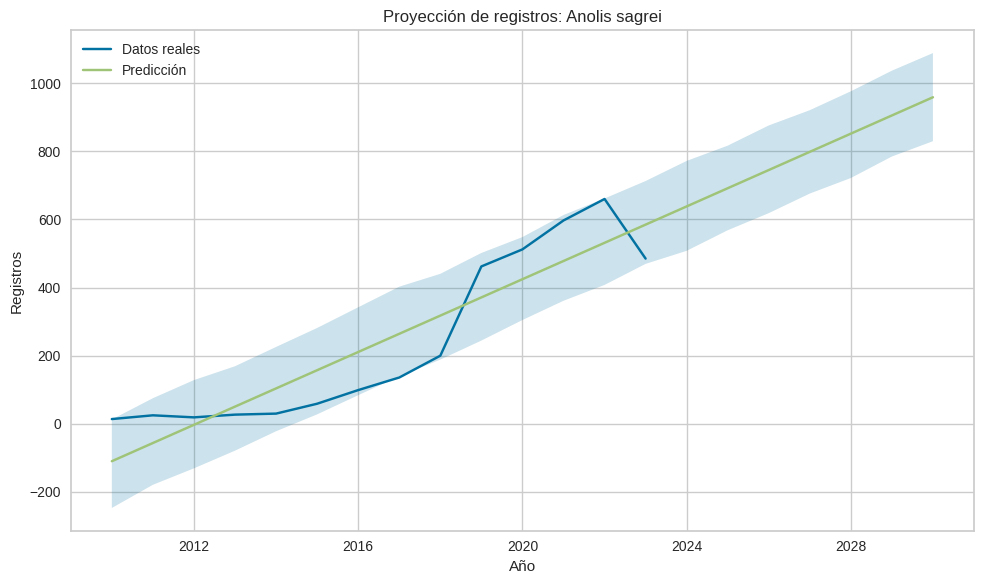

In [87]:
# Tomamos el DataFrame original de serie de tiempo y nos quedamos solo con las especies seleccionadas
especies_seleccionadas = list(especies_bajan_14.index) + list(especies_suben_14.index)

# Para cada especie, generamos la predicción
for especie in especies_seleccionadas:
    datos = serie_tiempo[(serie_tiempo['especievalida'] == especie) &
                          (serie_tiempo['aniocolecta'] >= 2010) &
                          (serie_tiempo['aniocolecta'] <= 2023)]

    #Usamos prophet
    df_prophet = datos[['aniocolecta', 'n_registros']].rename(columns={'aniocolecta': 'ds', 'n_registros': 'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    if df_prophet.shape[0] >= 4:  # solo predecimos si hay al menos 4 datos
        model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
        model.fit(df_prophet)

        # Hacer predicción hasta 2030
        future = model.make_future_dataframe(periods=7, freq='Y')  # 2024 a 2030
        forecast = model.predict(future)

        # Graficar
        plt.figure(figsize=(10, 6))
        plt.plot(df_prophet['ds'], df_prophet['y'], label='Datos reales')
        plt.plot(forecast['ds'], forecast['yhat'], label='Predicción')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2)
        plt.title(f"Proyección de registros: {especie}")
        plt.xlabel("Año")
        plt.ylabel("Registros")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/jfy3ugt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpygyzy8hz/_vje9ot9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12273', 'data', 'file=/tmp/tmpygyzy8hz/jfy3ugt9.json', 'init=/tmp/tmpygyzy8hz/_vje9ot9.json', 'output', 'file=/tmp/tmpygyzy8hz/prophet_modelp7p2p40c/prophet_model-20250514085657.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:56:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


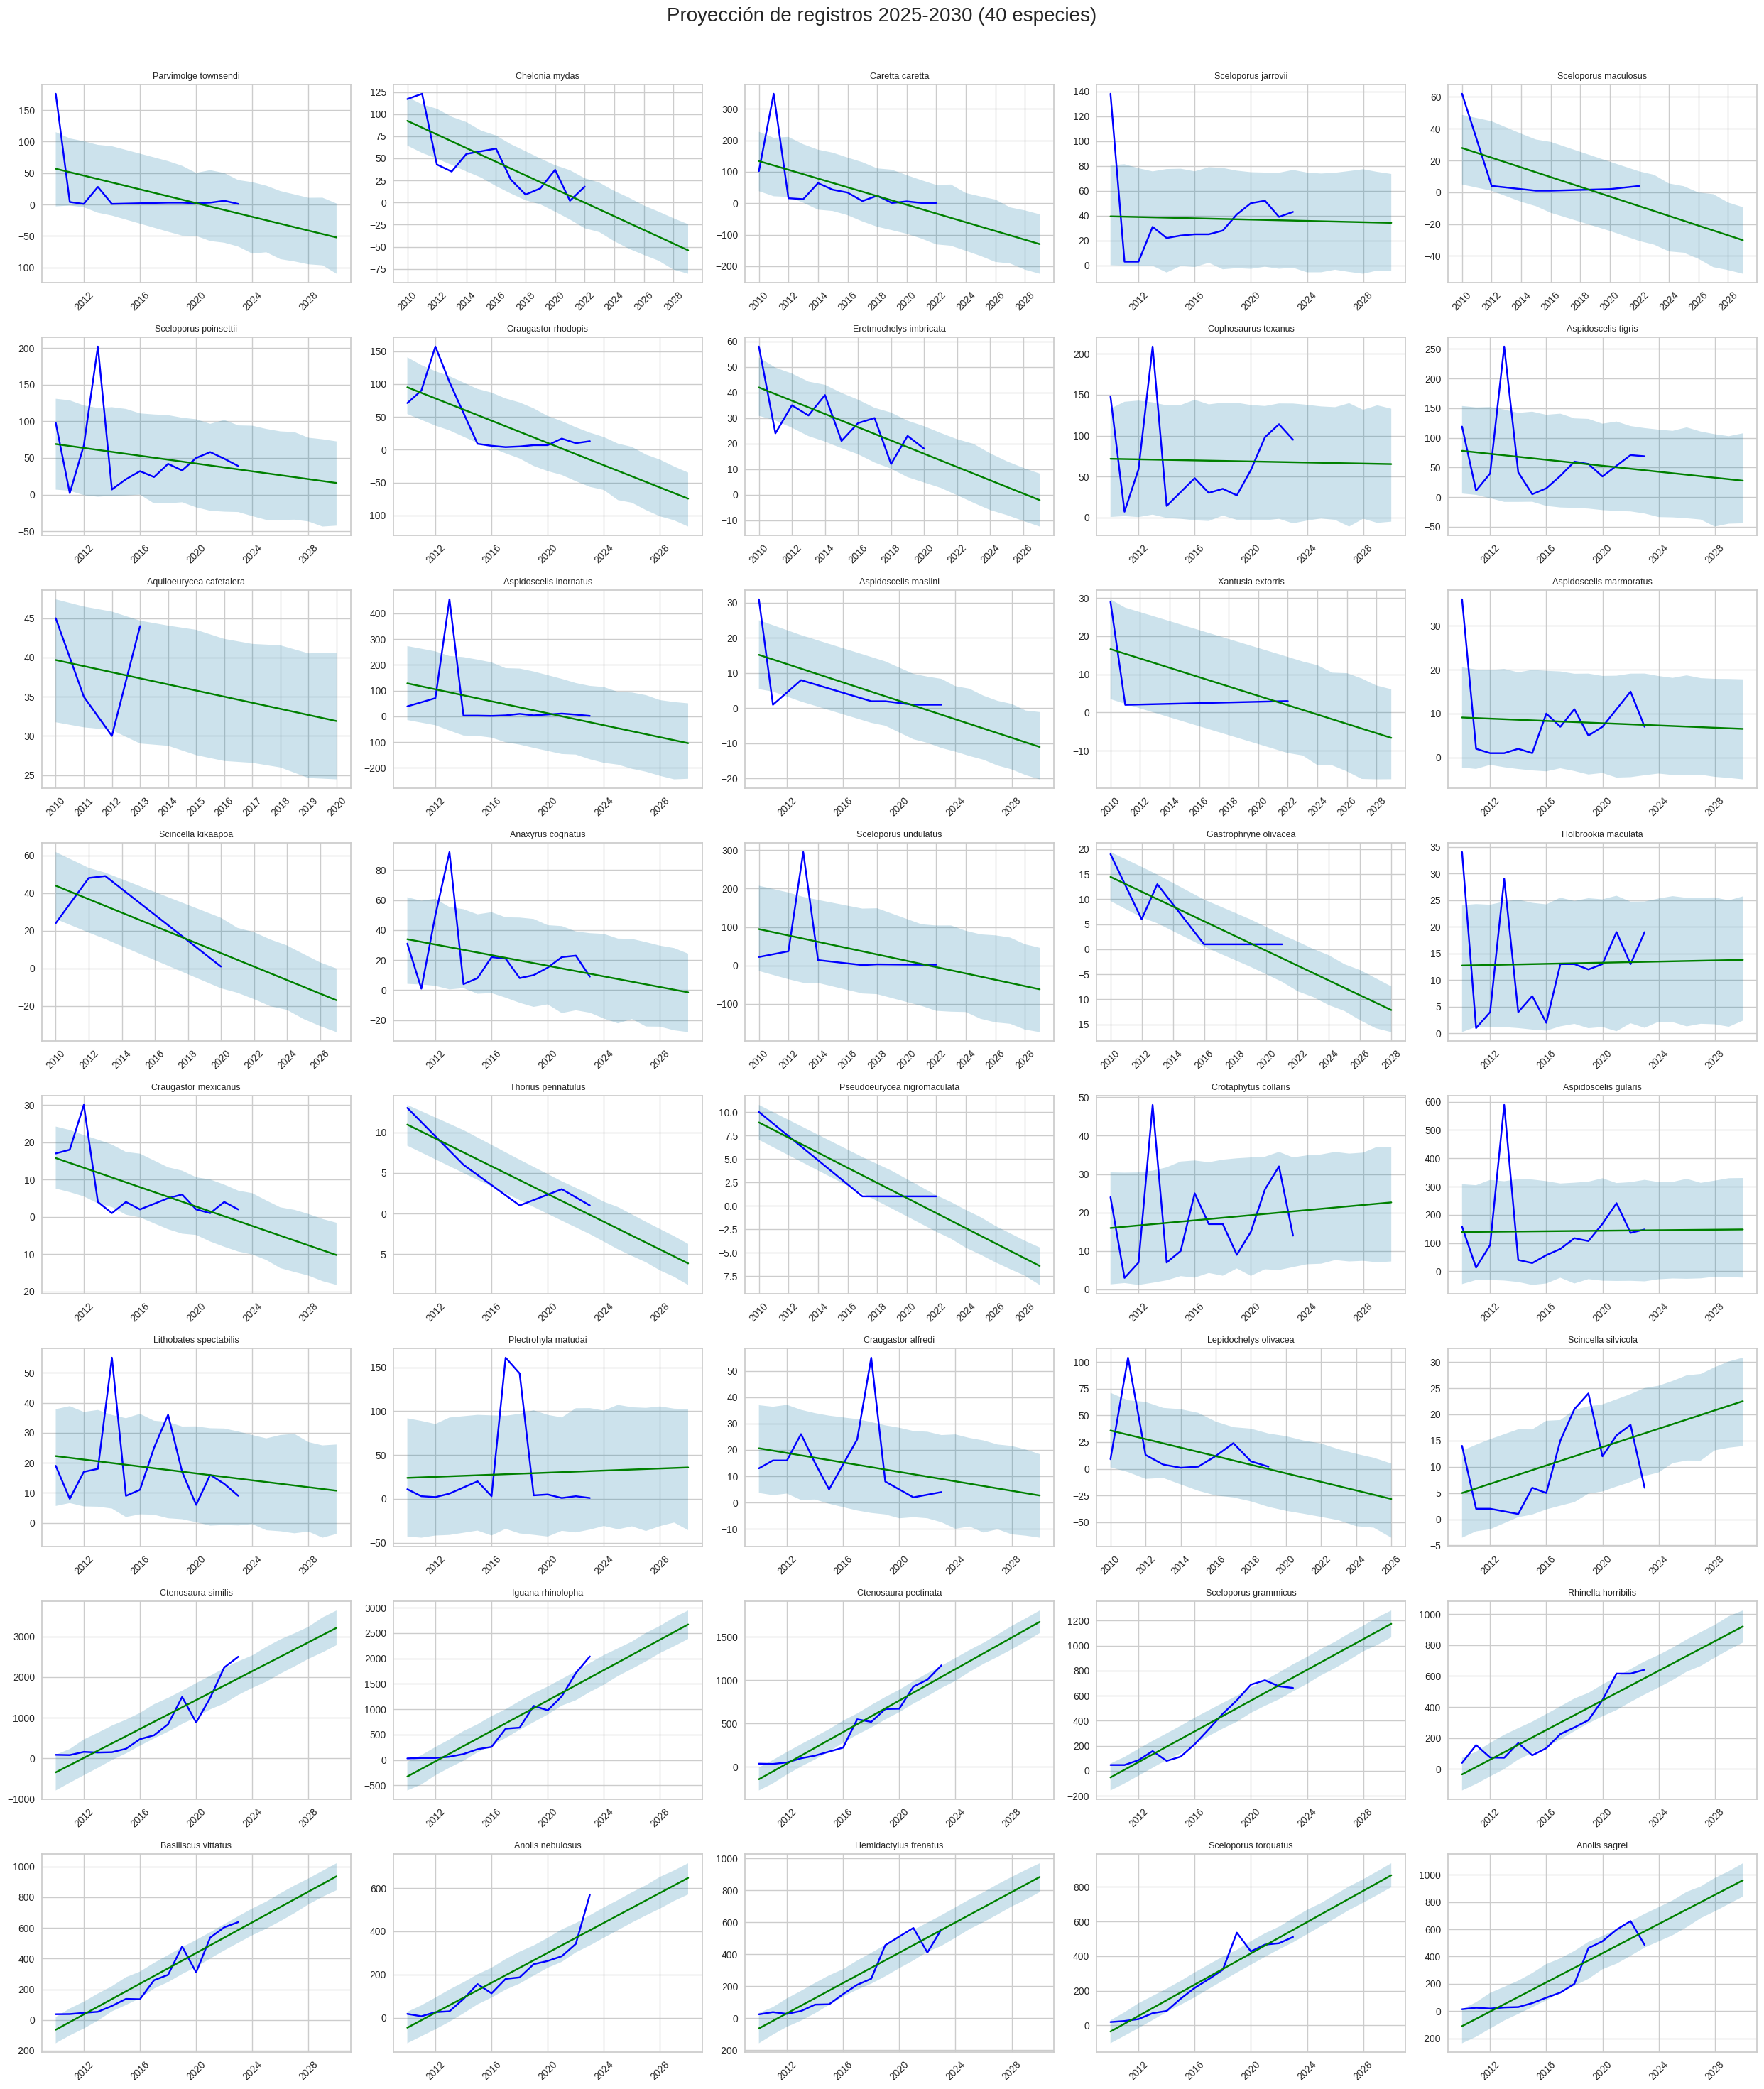

In [88]:
especies_proyectar = list(especies_bajan_14.index) + list(especies_suben_14.index)

fig, axs = plt.subplots(8, 5, figsize=(25, 30))
axs = axs.flatten()

for i, especie in enumerate(especies_proyectar):
    datos = serie_ult[serie_ult['especievalida'] == especie][['aniocolecta', 'n_registros']].copy()
    datos['ds'] = pd.to_datetime(datos['aniocolecta'], format='%Y')
    datos = datos.rename(columns={'n_registros': 'y'})
    datos = datos[['ds', 'y']]
    m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    try:
        m.fit(datos)
        future = m.make_future_dataframe(periods=7, freq='Y')
        forecast = m.predict(future)
        axs[i].plot(datos['ds'], datos['y'], label='Datos reales', color='blue')
        axs[i].plot(forecast['ds'], forecast['yhat'], label='Predicción', color='green')
        axs[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2)
        axs[i].set_title(especie, fontsize=9)
        axs[i].tick_params(axis='x', rotation=45)
    except:
        axs[i].set_title(f"{especie} (error)")
        continue

plt.suptitle("Proyección de registros 2025-2030 (40 especies)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Modelos supervisados: clasificación y regresión
Se entrenaron modelos clasificadores (Random Forest y Regresión Logística) para predecir si una especie pertenece a alguna categoría de riesgo (NOM-059 e IUCN). Se aplicó SMOTE para balancear las clases y mejorar el recall de la clase minoritaria. En la parte de regresión, se intentó predecir el número de registros con diferentes modelos (Lineal, Random Forest y XGBoost), con evaluaciones mediante RMSE y MAE.


In [93]:
X = df_encoded.drop(columns=['iucn_En peligro'])
y = df_encoded['iucn_En peligro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [95]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9733924611973392
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       427
        True       0.80      0.67      0.73        24

    accuracy                           0.97       451
   macro avg       0.89      0.83      0.86       451
weighted avg       0.97      0.97      0.97       451



In [96]:
target = 'nom059_En peligro de extinción'

if target in df_encoded.columns:
    X = df_encoded.drop(columns=[target])
    y = df_encoded[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo: {acc:.4f}")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))
else:
    print(f"La columna '{target}' no está presente en df_encoded")


Precisión del modelo: 0.9867
Reporte de clasificación:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       448
        True       0.20      0.33      0.25         3

    accuracy                           0.99       451
   macro avg       0.60      0.66      0.62       451
weighted avg       0.99      0.99      0.99       451



In [97]:
df_encoded['nom059_binaria'] = df_encoded['nom059_En peligro de extinción']

X = df_encoded.drop(columns=[
    'nom059_En peligro de extinción', 'nom059_Sin dato',
    'nom059_Sujeta a protección especial', 'nom059_binaria'
])
y = df_encoded['nom059_binaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.9933481152993349
Reporte de clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       448
        True       0.50      0.33      0.40         3

    accuracy                           0.99       451
   macro avg       0.75      0.67      0.70       451
weighted avg       0.99      0.99      0.99       451



In [98]:
objetivo = 'iucn_En peligro'

if objetivo in df_encoded.columns:
    X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('iucn_')])
    y = df_encoded[objetivo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
else:
    print(f"La columna '{objetivo}' no está en df_encoded.columns")


Precisión del modelo: 0.9335

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       427
        True       0.00      0.00      0.00        24

    accuracy                           0.93       451
   macro avg       0.47      0.49      0.48       451
weighted avg       0.90      0.93      0.91       451



In [99]:
resultados_modelos = pd.DataFrame({
    'Variable objetivo': ['NOM-059', 'IUCN'],
    'Accuracy': [0.9756, 0.9333],
    'Recall (Clase True)': [0.10, 0.14],
    'Precision (Clase True)': [0.33, 0.44],
    'F1-score (Clase True)': [0.15, 0.21]
})

display(resultados_modelos)


Variable objetivo  Accuracy  Recall (Clase True)  Precision (Clase True)  \
0           NOM-059    0.9756                 0.10                    0.33   
1              IUCN    0.9333                 0.14                    0.44   

   F1-score (Clase True)  
0                   0.15  
1                   0.21

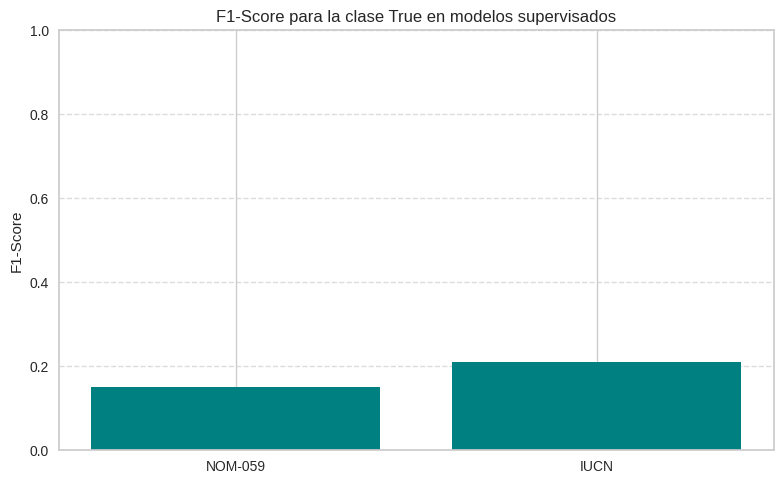

In [100]:
variables = ['NOM-059', 'IUCN']
f1_scores = [0.15, 0.21]

plt.figure(figsize=(8, 5))
plt.bar(variables, f1_scores, color='teal')
plt.title('F1-Score para la clase True en modelos supervisados')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [101]:
resultados_modelos = pd.DataFrame({
    'Variable objetivo': ['NOM-059', 'IUCN'],
    'Accuracy': [0.9756, 0.9333],
    'Recall (Clase True)': [0.10, 0.14],
    'Precision (Clase True)': [0.33, 0.44],
    'F1-score (Clase True)': [0.15, 0.21]
})

fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(resultados_modelos.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[resultados_modelos[col] for col in resultados_modelos.columns],
               fill_color='lavender',
               align='left'))
])
fig_table.update_layout(title='Resumen de métricas de modelos supervisados')
fig_table.show()

fig_f1 = go.Figure()
fig_f1.add_trace(go.Bar(
    x=resultados_modelos['Variable objetivo'],
    y=resultados_modelos['F1-score (Clase True)'],
    marker_color='indigo',
    text=resultados_modelos['F1-score (Clase True)'],
    textposition='auto'
))
fig_f1.update_layout(
    title='F1-Score para la clase True en modelos NOM-059 e IUCN',
    xaxis_title='Variable objetivo',
    yaxis_title='F1-score',
    yaxis=dict(range=[0, 1])
)
fig_f1.show()


In [103]:
df_encoded['iucn_en_riesgo'] = (
    df_encoded.get('iucn_En peligro', 0) |
    df_encoded.get('iucn_En peligro crítico', 0) |
    df_encoded.get('iucn_Vulnerable', 0)
)

X = df_encoded.drop(columns=['iucn_en_riesgo'])
y = df_encoded['iucn_en_riesgo']

X = X.apply(pd.to_numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.astype(int)

#Aplico Smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

modelo_smote = RandomForestClassifier(random_state=42)
modelo_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = modelo_smote.predict(X_test)
print("Precisión del modelo con SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Reporte de clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))



Precisión del modelo con SMOTE: 0.9867060561299852
Reporte de clasificación con SMOTE:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       583
        True       0.91      1.00      0.95        94

    accuracy                           0.99       677
   macro avg       0.96      0.99      0.97       677
weighted avg       0.99      0.99      0.99       677



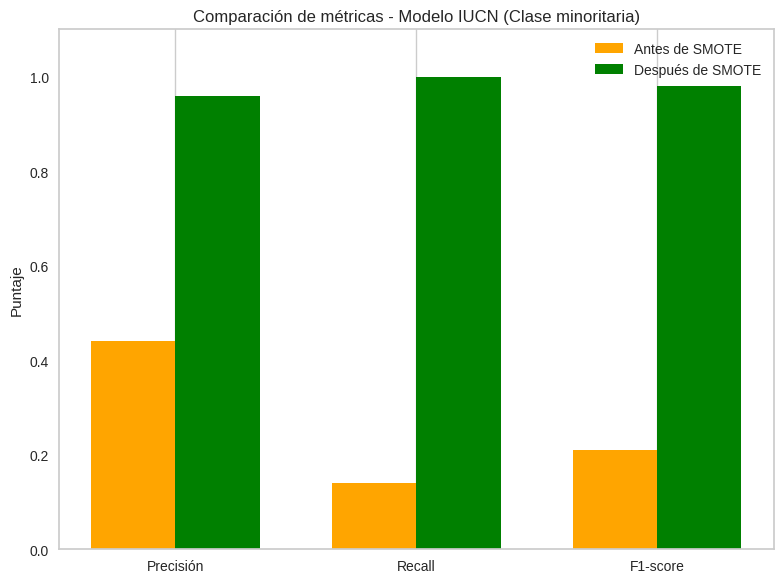

In [104]:
precision_before = 0.44
recall_before = 0.14
f1_before = 0.21

precision_after = 0.96
recall_after = 1.00
f1_after = 0.98

labels = ['Precisión', 'Recall', 'F1-score']
before = [precision_before, recall_before, f1_before]
after = [precision_after, recall_after, f1_after]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, before, width, label='Antes de SMOTE', color='orange')
plt.bar(x + width/2, after, width, label='Después de SMOTE', color='green')

plt.ylabel('Puntaje')
plt.title('Comparación de métricas - Modelo IUCN (Clase minoritaria)')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [105]:
X = df_encoded.drop(columns=['nom059_En peligro de extinción'])
y = df_encoded['nom059_En peligro de extinción']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)
acc_smote = accuracy_score(y_test, y_pred_smote)

print(f"Precisión del modelo con SMOTE: {acc_smote}")
print("Reporte de clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))


Precisión del modelo con SMOTE: 1.0
Reporte de clasificación con SMOTE:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       670
        True       1.00      1.00      1.00         7

    accuracy                           1.00       677
   macro avg       1.00      1.00      1.00       677
weighted avg       1.00      1.00      1.00       677



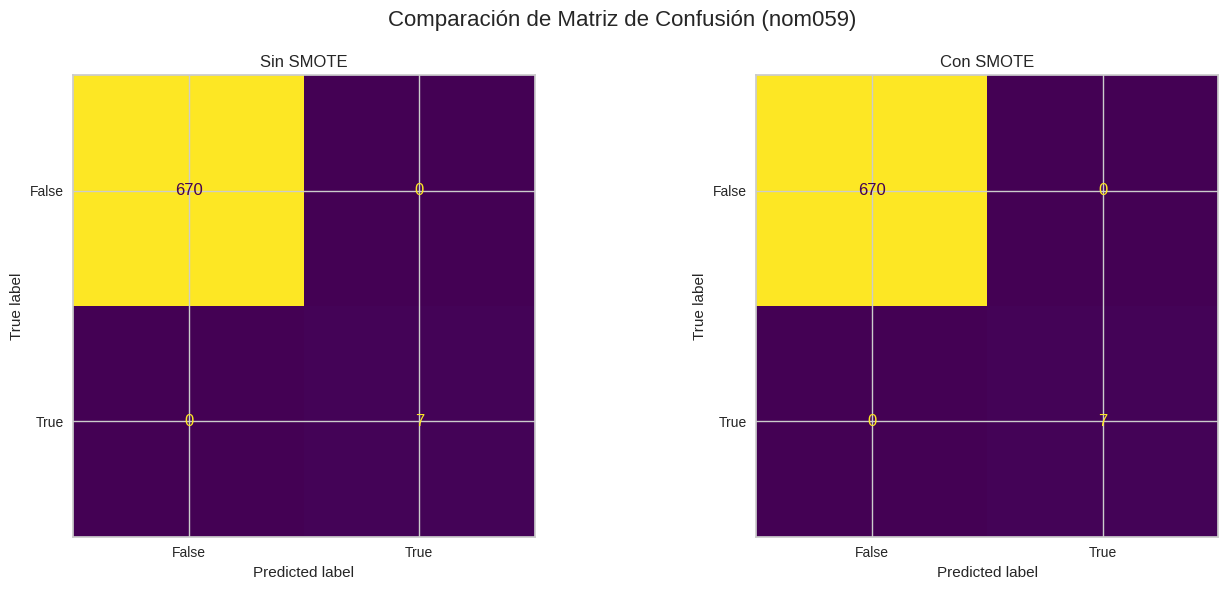

In [106]:
X_nom = df_encoded.drop(columns=['nom059_En peligro de extinción'])
y_nom = df_encoded['nom059_En peligro de extinción']
X_nom = X_nom.astype(int)

X_train_nom, X_test_nom, y_train_nom, y_test_nom = train_test_split(X_nom, y_nom, test_size=0.3, random_state=42)

model_nom = RandomForestClassifier(random_state=42)
model_nom.fit(X_train_nom, y_train_nom)
y_pred_nom = model_nom.predict(X_test_nom)

smote = SMOTE(random_state=42)
X_train_nom_smote, y_train_nom_smote = smote.fit_resample(X_train_nom, y_train_nom)

model_nom_smote = RandomForestClassifier(random_state=42)
model_nom_smote.fit(X_train_nom_smote, y_train_nom_smote)
y_pred_nom_smote = model_nom_smote.predict(X_test_nom)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_test_nom, y_pred_nom, ax=axs[0], colorbar=False)
axs[0].set_title("Sin SMOTE")

ConfusionMatrixDisplay.from_predictions(y_test_nom, y_pred_nom_smote, ax=axs[1], colorbar=False)
axs[1].set_title("Con SMOTE")

plt.suptitle("Comparación de Matriz de Confusión (nom059)", fontsize=16)
plt.tight_layout()
plt.show()


In [107]:
serie_tiempo_avg = serie_tiempo.groupby('especievalida')['n_registros'].mean().reset_index()
serie_tiempo_avg.columns = ['especievalida', 'n_registros_avg']

df_modelo = df_encoded.copy()
if 'especievalida' not in df_modelo.columns:
    df_modelo = df_modelo.reset_index()

df_modelo = df_modelo.merge(serie_tiempo_avg, on='especievalida', how='inner')

X = df_modelo.drop(columns=['especievalida', 'n_registros_avg'])
y = df_modelo['n_registros_avg']

X = X.apply(pd.to_numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor(random_state=42)

modelo_lr.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)

def evaluar_modelo(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

resultados = pd.DataFrame([
    {'Modelo': 'Regresión Lineal', **evaluar_modelo(y_test, y_pred_lr)},
    {'Modelo': 'Random Forest', **evaluar_modelo(y_test, y_pred_rf)}
])

display(resultados)


Modelo       RMSE       MAE        R²
0  Regresión Lineal  10.144482  5.552466  0.050397
1     Random Forest  10.677925  5.302368 -0.052098

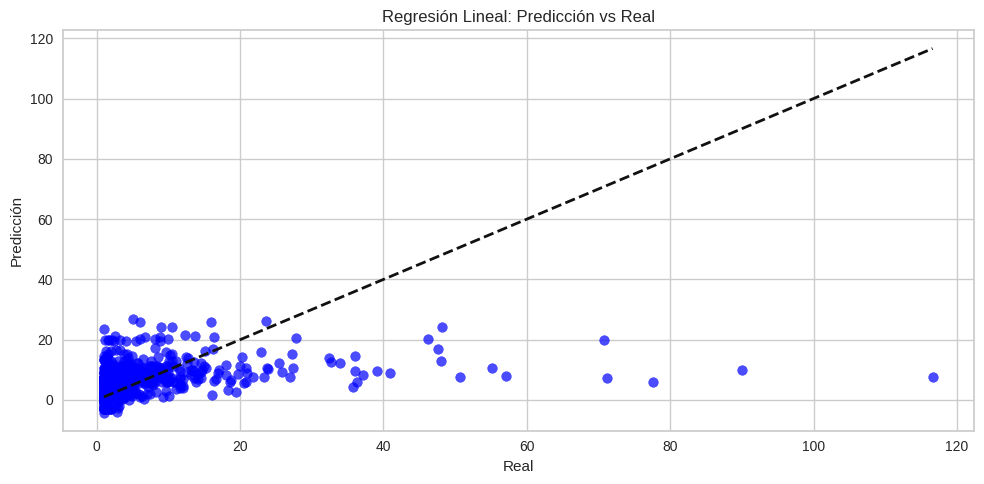

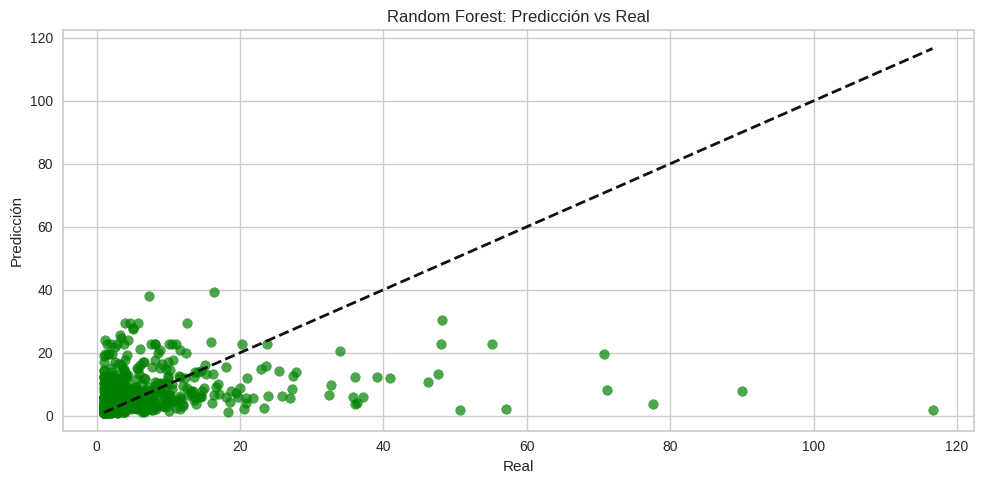

In [108]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Regresión Lineal: Predicción vs Real")
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Random Forest: Predicción vs Real")
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.grid(True)
plt.tight_layout()
plt.show()


Modelo        RMSE         MAE        R²
0  Regresión Lineal  653.087972  311.224403  0.038570
1     Random Forest  666.538814  254.136669 -0.001441
2           XGBoost  662.106888  258.724762  0.011832

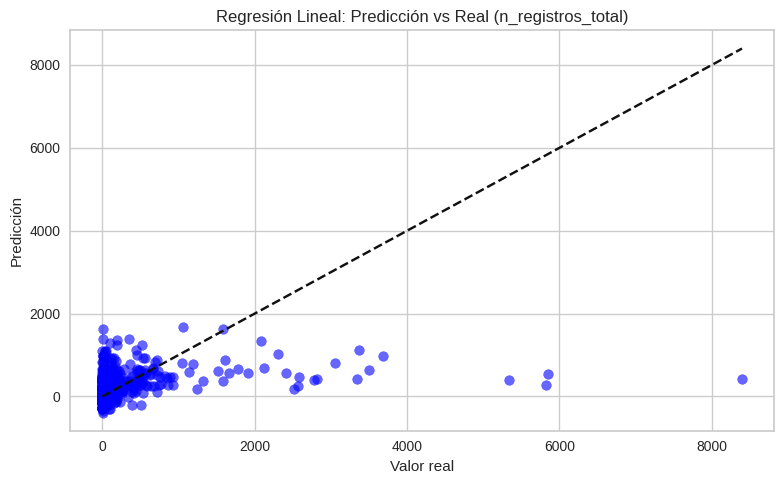

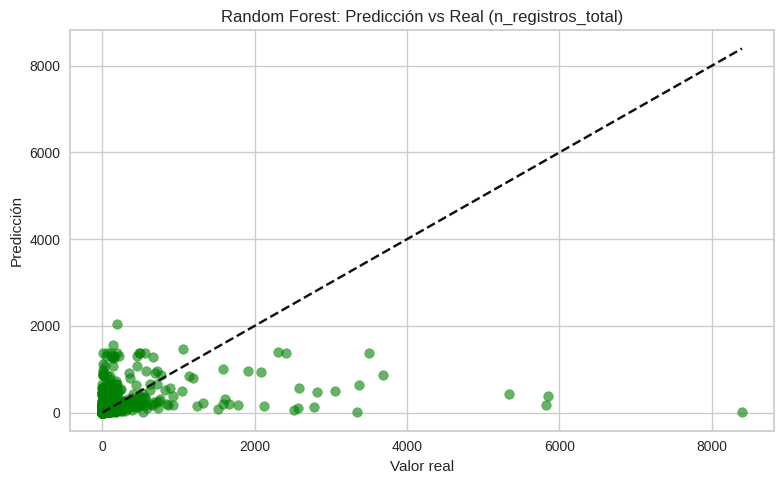

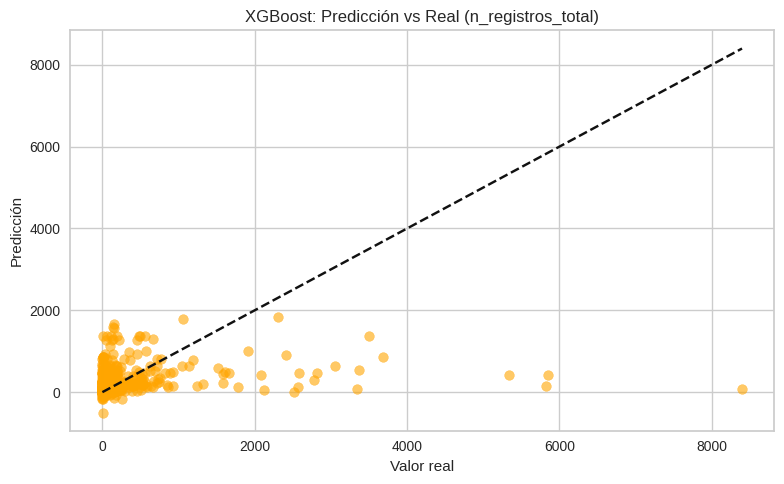

In [109]:
serie_tiempo_sum = serie_tiempo.groupby('especievalida')['n_registros'].sum().reset_index()
serie_tiempo_sum.columns = ['especievalida', 'n_registros_total']

df_modelo = df_encoded.copy()
if 'especievalida' not in df_modelo.columns:
    df_modelo = df_modelo.reset_index()

df_modelo = df_modelo.merge(serie_tiempo_sum, on='especievalida', how='inner')

X = df_modelo.drop(columns=['especievalida', 'n_registros_total'])
y = df_modelo['n_registros_total']
X = X.apply(pd.to_numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

def evaluar(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

resultados = pd.DataFrame([
    {'Modelo': 'Regresión Lineal', **evaluar(y_test, y_pred_lr)},
    {'Modelo': 'Random Forest', **evaluar(y_test, y_pred_rf)},
    {'Modelo': 'XGBoost', **evaluar(y_test, y_pred_xgb)}
])

display(resultados)

for modelo, y_pred, color in zip(['Regresión Lineal', 'Random Forest', 'XGBoost'],
                                 [y_pred_lr, y_pred_rf, y_pred_xgb],
                                 ['blue', 'green', 'orange']):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color=color)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Valor real')
    plt.ylabel('Predicción')
    plt.title(f'{modelo}: Predicción vs Real (n_registros_total)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [110]:
df_corr = df_modelo.copy()
df_corr['n_registros_total'] = y
correlaciones = df_corr.corr(numeric_only=True)['n_registros_total'].sort_values(ascending=False)
display(correlaciones)


n_registros_total            1.000000
iucn_Preocupación Menor      0.220078
validacionambiente_Válido    0.131698
estadomapa_MEXICO            0.126083
estadomapa_QUINTANA ROO      0.109548
                               ...   
nom059_Sin dato             -0.049549
iucn_en_riesgo              -0.050240
iucn_Datos insuficientes    -0.065196
ambiente_Sin dato           -0.131261
iucn_Sin dato               -0.167181
Name: n_registros_total, Length: 153, dtype: float64

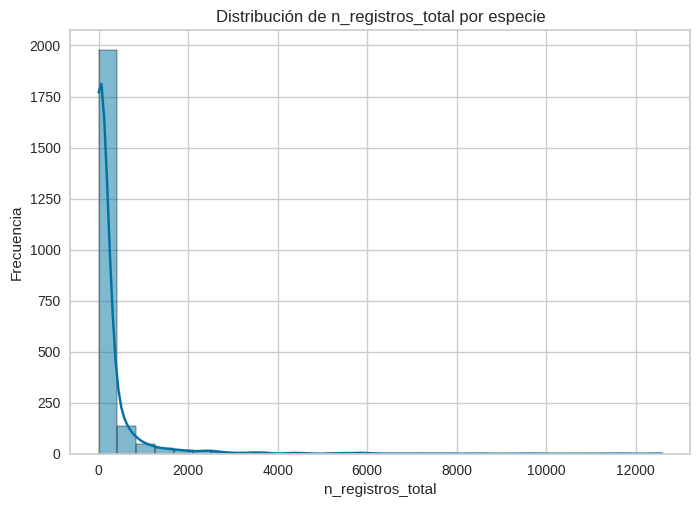

In [ ]:
sns.histplot(y, bins=30, kde=True)
plt.title("Distribución de n_registros_total por especie")
plt.xlabel("n_registros_total")
plt.ylabel("Frecuencia")
plt.show()


Random Forest:

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       329
           1       0.69      0.73      0.71       348

    accuracy                           0.69       677
   macro avg       0.69      0.69      0.69       677
weighted avg       0.69      0.69      0.69       677



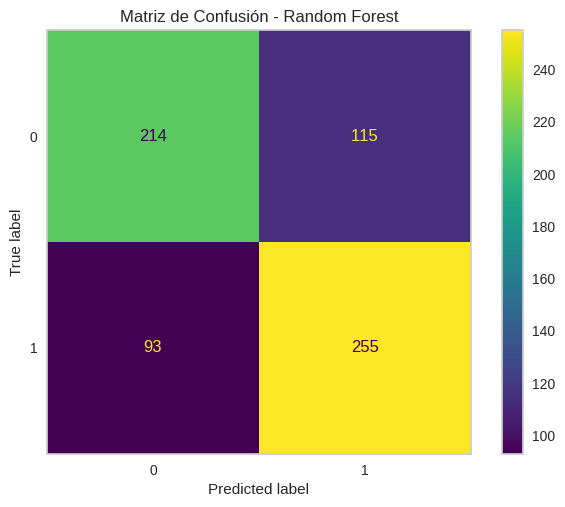


Logistic Regression:

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       329
           1       0.70      0.80      0.75       348

    accuracy                           0.72       677
   macro avg       0.72      0.72      0.72       677
weighted avg       0.72      0.72      0.72       677



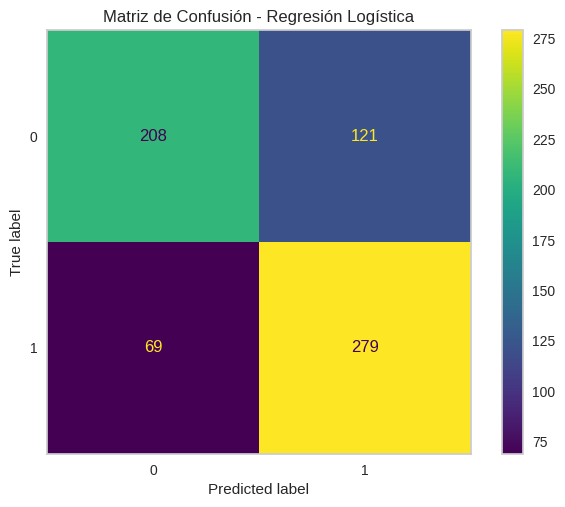

In [111]:
umbral = df_modelo['n_registros_total'].median()
df_modelo['presencia_alta'] = (df_modelo['n_registros_total'] > umbral).astype(int)

X = df_modelo.drop(columns=['especievalida', 'n_registros_total', 'presencia_alta'])
y = df_modelo['presencia_alta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=1000)

model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

print("Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Matriz de Confusión - Random Forest")
plt.grid(False)
plt.show()

print("\nLogistic Regression:\n")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Matriz de Confusión - Regresión Logística")
plt.grid(False)
plt.show()


Modelo      RMSE       MAE        R²
0  Regresión Lineal (log)  1.621157  1.297752  0.341218
1     Random Forest (log)  1.649753  1.266191  0.317772

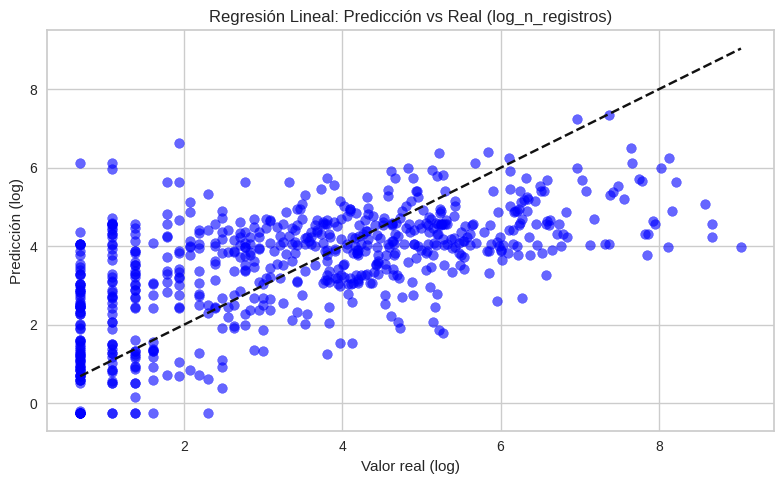

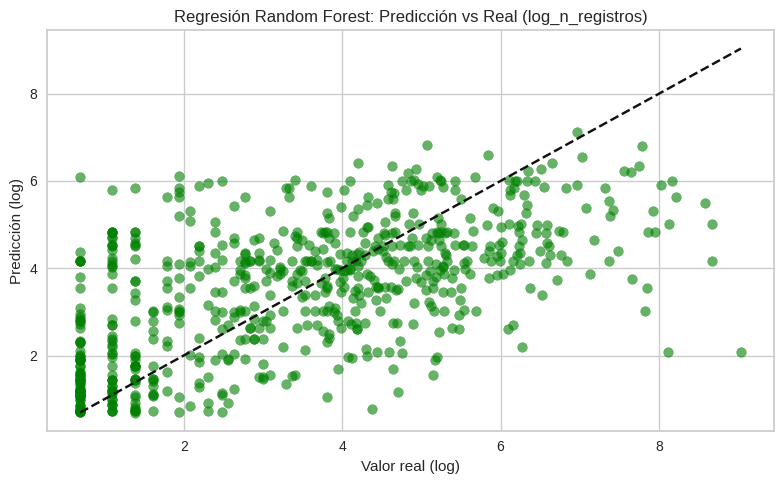

In [112]:
serie_tiempo_sum = serie_tiempo.groupby('especievalida')['n_registros'].sum().reset_index()
serie_tiempo_sum.columns = ['especievalida', 'n_registros_total']

df_modelo = df_encoded.copy()
if 'especievalida' not in df_modelo.columns:
    df_modelo = df_modelo.reset_index()

df_modelo = df_modelo.merge(serie_tiempo_sum, on='especievalida', how='inner')

df_modelo['log_n_registros'] = np.log1p(df_modelo['n_registros_total'])

X = df_modelo.drop(columns=['especievalida', 'n_registros_total', 'log_n_registros'], errors='ignore')
y = df_modelo['log_n_registros']
X = X.apply(pd.to_numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

def evaluar_modelo(y_real, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_real, y_pred)),
        'MAE': mean_absolute_error(y_real, y_pred),
        'R²': r2_score(y_real, y_pred)
    }

resultados_log = pd.DataFrame([
    {'Modelo': 'Regresión Lineal (log)', **evaluar_modelo(y_test, y_pred_lr)},
    {'Modelo': 'Random Forest (log)', **evaluar_modelo(y_test, y_pred_rf)}
])

display(resultados_log)

for modelo, y_pred, color in zip(['Lineal', 'Random Forest'], [y_pred_lr, y_pred_rf], ['blue', 'green']):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color=color)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Valor real (log)')
    plt.ylabel('Predicción (log)')
    plt.title(f'Regresión {modelo}: Predicción vs Real (log_n_registros)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [113]:
pred_original_lr = np.expm1(y_pred_lr)
pred_original_rf = np.expm1(y_pred_rf)
real_original = np.expm1(y_test)

df_predicciones = pd.DataFrame({
    'Real (original)': real_original,
    'Predicción Lineal': pred_original_lr,
    'Predicción RF': pred_original_rf
})
df_predicciones = df_predicciones.reset_index(drop=True)
display(df_predicciones.head(10))


Real (original)  Predicción Lineal  Predicción RF
0             52.0         174.309530      74.937699
1            530.0          13.522849       8.075495
2            238.0          45.280602      12.534084
3             57.0          51.177897      77.158286
4              3.0          14.012449       6.737445
5             74.0          55.332108      46.388277
6              5.0          27.822043      39.953250
7              1.0          42.403630      33.459315
8             42.0          95.210891     120.850578
9              9.0          82.247975      52.918796

In [114]:
nom_peligro = df_6[df_6['nom059'].str.contains('peligro', case=False, na=False)]
especies_nom_por_estado = nom_peligro.groupby('estadomapa')['especievalida'].nunique().sort_values(ascending=False)

iucn_peligro = df_6[df_6['iucn'].str.contains('En peligro|crítico', case=False, na=False)]
especies_iucn_por_estado = iucn_peligro.groupby('estadomapa')['especievalida'].nunique().sort_values(ascending=False)

display(especies_nom_por_estado.head(10))
display(especies_iucn_por_estado.head(10))


estadomapa
VERACRUZ DE IGNACIO DE LA LLAVE    17
CAMPECHE                            9
OAXACA                              9
CHIAPAS                             8
QUINTANA ROO                        7
YUCATAN                             7
JALISCO                             7
SONORA                              6
BAJA CALIFORNIA SUR                 6
BAJA CALIFORNIA                     5
Name: especievalida, dtype: int64

estadomapa
OAXACA                             78
VERACRUZ DE IGNACIO DE LA LLAVE    52
CHIAPAS                            38
PUEBLA                             29
GUERRERO                           27
MICHOACAN DE OCAMPO                18
HIDALGO                            16
MEXICO                             14
JALISCO                            12
SAN LUIS POTOSI                    11
Name: especievalida, dtype: int64

In [115]:
df_tiempo_estado = df_6[['especievalida', 'estadomapa', 'aniocolecta']].copy()
df_tiempo_estado['aniocolecta'] = pd.to_numeric(df_tiempo_estado['aniocolecta'], errors='coerce')
df_tiempo_estado = df_tiempo_estado.dropna(subset=['aniocolecta'])
df_tiempo_estado['aniocolecta'] = df_tiempo_estado['aniocolecta'].astype(int)

df_tiempo_estado = df_tiempo_estado[(df_tiempo_estado['aniocolecta'] >= 2010) & (df_tiempo_estado['aniocolecta'] <= 2023)]

serie_estado = df_tiempo_estado.groupby(['especievalida', 'estadomapa', 'aniocolecta']).size().reset_index(name='n_registros')

tendencias = []

for (especie, estado), grupo in serie_estado.groupby(['especievalida', 'estadomapa']):
    if grupo['aniocolecta'].nunique() >= 5:
        X = grupo['aniocolecta'].values.reshape(-1, 1)
        y = grupo['n_registros'].values
        modelo = LinearRegression().fit(X, y)
        pendiente = modelo.coef_[0]
        tendencias.append({'especie': especie, 'estado': estado, 'pendiente': pendiente})

df_tendencias = pd.DataFrame(tendencias)

disminucion_por_estado = df_tendencias.groupby('estado')['pendiente'].mean().sort_values()

display(disminucion_por_estado.head(20))



estado
COAHUILA DE ZARAGOZA   -0.992017
MICHIGAN               -0.600000
ZACATECAS              -0.560994
NORTH CAROLINA         -0.250000
BOLIVAR                -0.085366
TEXAS                  -0.040844
LOUISIANA              -0.017241
ARIZONA                -0.006564
NEW YORK                0.020548
WASHINGTON              0.028571
ANTIOQUIA               0.043883
ALAJUELA                0.096065
MASAYA                  0.100000
HEREDIA                 0.108336
SAN LUIS POTOSI         0.110161
GUANACASTE              0.110778
LIMON                   0.147004
CALIFORNIA              0.150679
CHIAPAS                 0.188646
AGUASCALIENTES          0.222040
Name: pendiente, dtype: float64

In [116]:
df_disminuyen = df_tendencias[df_tendencias['pendiente'] < 0]

df_disminuyen = df_disminuyen.sort_values(by='pendiente')

display(df_disminuyen.head(20))

especies_negativas_por_estado = df_disminuyen.groupby('estado')['especie'].nunique().sort_values(ascending=False)
display(especies_negativas_por_estado.head(10))


especie                           estado  pendiente
268         Aspidoscelis inornatus             COAHUILA DE ZARAGOZA -14.261905
244           Aspidoscelis gularis             COAHUILA DE ZARAGOZA -12.923077
568           Crocodylus moreletii                          CHIAPAS -11.039560
2236       Sceloporus melanogaster                        ZACATECAS  -9.660793
258   Aspidoscelis gularis gularis             COAHUILA DE ZARAGOZA  -8.421053
89              Anaxyrus punctatus             COAHUILA DE ZARAGOZA  -7.612470
575           Crocodylus moreletii  VERACRUZ DE IGNACIO DE LA LLAVE  -7.573626
62               Amerana draytonii                  BAJA CALIFORNIA  -7.400000
2829              Uta stansburiana             COAHUILA DE ZARAGOZA  -7.394633
551            Craugastor rhodopis  VERACRUZ DE IGNACIO DE LA LLAVE  -7.142509
2245           Sceloporus merriami             COAHUILA DE ZARAGOZA  -6.898601
497            Cophosaurus texanus             COAHUILA DE ZARAGOZA  -6.659341
2286         Sceloporus poinsettii             COAHUILA DE ZARAGOZA  -5.602198
2491             Spea multiplicata                        ZACATECAS  -5.593407
1758          Parvimolge townsendi  VERACRUZ DE IGNACIO DE LA LLAVE  -5.385830
1514        Lithobates berlandieri             COAHUILA DE ZARAGOZA  -4.960440
2226          Sceloporus maculosus             COAHUILA DE ZARAGOZA  -4.697479
530            Craugastor laticeps                          CHIAPAS  -4.615385
279           Aspidoscelis maximus              BAJA CALIFORNIA SUR  -4.562937
266       Aspidoscelis hyperythrus              BAJA CALIFORNIA SUR  -4.312088

estado
CHIAPAS                            49
COAHUILA DE ZARAGOZA               49
OAXACA                             47
VERACRUZ DE IGNACIO DE LA LLAVE    42
ZACATECAS                          28
SAN LUIS POTOSI                    26
MORELOS                            24
SONORA                             20
GUERRERO                           18
PUEBLA                             17
Name: especie, dtype: int64

In [117]:
especies_riesgo_futuro = list(especies_bajan_14.index) + list(especies_suben_14.index)

df_futuro = df_6[df_6['especievalida'].isin(especies_riesgo_futuro)][['especievalida', 'estadomapa']].drop_duplicates()

especies_por_estado = df_futuro.groupby('estadomapa')['especievalida'].unique().reset_index()
especies_por_estado.columns = ['Estado', 'Especies proyectadas']

especies_por_estado['N° especies'] = especies_por_estado['Especies proyectadas'].apply(len)

especies_por_estado = especies_por_estado.sort_values(by='N° especies', ascending=False)

display(especies_por_estado.head(10))


Estado  \
90                   SAN LUIS POTOSI   
107  VERACRUZ DE IGNACIO DE LA LLAVE   
75                            OAXACA   
97                            SONORA   
34                           DURANGO   
27              COAHUILA DE ZARAGOZA   
111                        ZACATECAS   
74                        NUEVO LEON   
100                       TAMAULIPAS   
82                            PUEBLA   

                                  Especies proyectadas  N° especies  
90   [Sceloporus grammicus, Sceloporus torquatus, A...           23  
107  [Sceloporus grammicus, Sceloporus torquatus, A...           23  
75   [Sceloporus grammicus, Anolis nebulosus, Hemid...           23  
97   [Lepidochelys olivacea, Aspidoscelis tigris, H...           21  
34   [Sceloporus jarrovii, Sceloporus poinsettii, S...           20  
27   [Cophosaurus texanus, Aspidoscelis marmoratus,...           20  
111  [Sceloporus torquatus, Sceloporus poinsettii, ...           19  
74   [Sceloporus grammicus, Sceloporus torquatus, S...           17  
100  [Sceloporus torquatus, Sceloporus grammicus, S...           17  
82   [Sceloporus grammicus, Sceloporus torquatus, S...           17

In [118]:
riqueza_municipal = df_6.groupby('estadomapa')['especievalida'].nunique().sort_values(ascending=False)
display(riqueza_municipal.head(10))


estadomapa
OAXACA                             626
CHIAPAS                            506
VERACRUZ DE IGNACIO DE LA LLAVE    480
GUERRERO                           383
PUEBLA                             349
JALISCO                            347
SONORA                             328
MICHOACAN DE OCAMPO                312
CHIHUAHUA                          309
SAN LUIS POTOSI                    284
Name: especievalida, dtype: int64

In [119]:
riqueza_municipal = df_3.groupby('municipiomapa')['especievalida'].nunique().sort_values(ascending=False)
display(riqueza_municipal.head(10))


municipiomapa
OCAMPO                       220
SAN ANDRES TUXTLA            219
CHILPANCINGO DE LOS BRAVO    218
CATEMACO                     210
JUAREZ                       199
TONALA                       196
OCOSINGO                     189
ESCUINTLA                    181
OCOZOCOAUTLA DE ESPINOSA     180
LAZARO CARDENAS              178
Name: especievalida, dtype: int64

In [120]:
riqueza_municipal = df_3_limpio.groupby(['municipiomapa','estadomapa'])['especievalida'].nunique().sort_values(ascending=False)
display(riqueza_municipal.head(10))

municipiomapa              estadomapa                     
SAN ANDRES TUXTLA          VERACRUZ DE IGNACIO DE LA LLAVE    219
CHILPANCINGO DE LOS BRAVO  GUERRERO                           218
CATEMACO                   VERACRUZ DE IGNACIO DE LA LLAVE    210
OCOSINGO                   CHIAPAS                            189
ESCUINTLA                  CHIAPAS                            180
OCOZOCOAUTLA DE ESPINOSA   CHIAPAS                            180
ALAMOS                     SONORA                             173
TUXTLA GUTIERREZ           CHIAPAS                            164
ACAPULCO DE JUAREZ         GUERRERO                           161
TONALA                     CHIAPAS                            155
Name: especievalida, dtype: int64

In [121]:
total_mun = df_6.groupby('estadomapa')['especievalida'].nunique().rename('n_total')

nom_riesgo = df_6[df_6['nom059'].str.contains('peligro', case=False, na=False)]
nom_mun = nom_riesgo.groupby('estadomapa')['especievalida'].nunique().rename('n_nom059')

iucn_riesgo = df_6[df_6['iucn'].str.contains('en peligro|crítico', case=False, na=False)]
iucn_mun = iucn_riesgo.groupby('estadomapa')['especievalida'].nunique().rename('n_iucn')

especies_riesgo_futuro = list(especies_bajan_14.index) + list(especies_suben_14.index)
futuro_mun = df_6[df_6['especievalida'].isin(especies_riesgo_futuro)]
futuro_mun = futuro_mun.groupby('estadomapa')['especievalida'].nunique().rename('n_proyectadas')

df_mun_prioridad = pd.concat([total_mun, nom_mun, iucn_mun, futuro_mun], axis=1).fillna(0)

df_mun_prioridad['indice_prioridad'] = (
    df_mun_prioridad['n_nom059'] +
    df_mun_prioridad['n_iucn'] +
    df_mun_prioridad['n_proyectadas']
)

df_mun_prioridad = df_mun_prioridad.sort_values(by='indice_prioridad', ascending=False)

display(df_mun_prioridad.head(10))


n_total  n_nom059  n_iucn  n_proyectadas  \
estadomapa                                                                  
OAXACA                               626       9.0    78.0           23.0   
VERACRUZ DE IGNACIO DE LA LLAVE      480      17.0    52.0           23.0   
CHIAPAS                              506       8.0    38.0           15.0   
PUEBLA                               349       4.0    29.0           17.0   
GUERRERO                             383       4.0    27.0           16.0   
MICHOACAN DE OCAMPO                  312       5.0    18.0           16.0   
SAN LUIS POTOSI                      284       3.0    11.0           23.0   
COAHUILA DE ZARAGOZA                 260       5.0    11.0           20.0   
JALISCO                              347       7.0    12.0           16.0   
HIDALGO                              260       3.0    16.0           15.0   

                                 indice_prioridad  
estadomapa                                         
OAXACA                                      110.0  
VERACRUZ DE IGNACIO DE LA LLAVE              92.0  
CHIAPAS                                      61.0  
PUEBLA                                       50.0  
GUERRERO                                     47.0  
MICHOACAN DE OCAMPO                          39.0  
SAN LUIS POTOSI                              37.0  
COAHUILA DE ZARAGOZA                         36.0  
JALISCO                                      35.0  
HIDALGO                                      34.0

In [122]:
estados = sorted(df_6['estadomapa'].dropna().unique())
selector_estado = pn.widgets.Select(name='Estado', options=estados)

especies = sorted(df_6['especievalida'].dropna().unique())
selector_especie = pn.widgets.Select(name='Especie', options=especies)

especies_riesgo_futuro = list(especies_bajan_14.index) + list(especies_suben_14.index)

In [123]:
def grafico_estado(estado):
    df_estado = df_6[df_6['estadomapa'] == estado]

    total = df_estado['especievalida'].nunique()
    nom = df_estado[df_estado['nom059'].str.contains('peligro', na=False, case=False)]['especievalida'].nunique()
    iucn = df_estado[df_estado['iucn'].str.contains('en peligro|crítico', na=False, case=False)]['especievalida'].nunique()
    proyectadas = df_estado[df_estado['especievalida'].isin(especies_riesgo_futuro)]['especievalida'].nunique()

    df_est = pd.DataFrame({
        'Categoría': ['Total', 'NOM-059', 'IUCN', 'Proyectadas'],
        'Número de especies': [total, nom, iucn, proyectadas]
    })

    fig = px.bar(df_est, x='Categoría', y='Número de especies', color='Categoría',
                 title=f'Especies en {estado}')
    return fig


In [124]:
def grafico_serie_especie(especie):
    df_esp = serie_tiempo[serie_tiempo['especievalida'] == especie]
    fig = px.line(df_esp, x='aniocolecta', y='n_registros', title=f'Registros históricos de {especie}')
    return fig


In [125]:
dashboard_estado = pn.Column(
    pn.pane.Markdown("## Distribución de especies por estado"),
    selector_estado,
    pn.bind(grafico_estado, selector_estado)
)

dashboard_especie = pn.Column(
    pn.pane.Markdown("## Serie de tiempo por especie"),
    selector_especie,
    pn.bind(grafico_serie_especie, selector_especie)
)

dashboard_final = pn.Tabs(
    ("Por Estado", dashboard_estado),
    ("Por Especie", dashboard_especie)
)

dashboard_final.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Estado', options=['AGUASCALIENTES', ...], value='AGUASCALIENTES')
        [2] ParamFunction(function, _pane=Plotly, defer_load=False)
    [1] Column
        [0] Markdown(str)
        [1] Select(name='Especie', options=['Abronia antauges', ...], value='Abronia antauges')
        [2] ParamFunction(function, _pane=Plotly, defer_load=False)

In [126]:
pn.panel(dashboard_final).show()


Launching server at http://localhost:36767


In [127]:
# Filtrar especies que contengan "Ambystoma"
especies_ambystoma = df_6[df_6['especievalida'].str.contains("Ambystoma", case=False, na=False)]
especies_ambystoma[['especievalida', 'estadomapa', 'aniocolecta']].drop_duplicates()


especievalida           estadomapa  aniocolecta
525620   Ambystoma laterale                MAINE         2022
525723     Ambystoma opacum       NORTH CAROLINA         2018
525758  Ambystoma mavortium              MONTANA         2022
525796  Ambystoma maculatum                MAINE         2023
525917  Ambystoma mavortium             OKLAHOMA         2021
...                     ...                  ...          ...
743645  Ambystoma andersoni  MICHOACAN DE OCAMPO         2017
743707  Ambystoma mexicanum     CIUDAD DE MEXICO         1997
743724    Ambystoma velasci     CIUDAD DE MEXICO         1972
743786  Ambystoma andersoni  MICHOACAN DE OCAMPO         1978
743787  Ambystoma andersoni  MICHOACAN DE OCAMPO         1979

[622 rows x 3 columns]

In [128]:
especies_ambystoma['en_riesgo_futuro'] = especies_ambystoma['especievalida'].isin(
    list(especies_bajan_14.index) + list(especies_suben_14.index)
)

especies_ambystoma['en_nom059'] = especies_ambystoma['nom059'].str.contains('peligro', case=False, na=False)
especies_ambystoma['en_iucn'] = especies_ambystoma['iucn'].str.contains('en peligro|crítico', case=False, na=False)

especies_ambystoma[['especievalida', 'estadomapa', 'aniocolecta', 'en_riesgo_futuro', 'en_nom059', 'en_iucn']].drop_duplicates()

<ipython-input-128-f86bda31314b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-f86bda31314b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-f86bda31314b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



especievalida           estadomapa  aniocolecta  \
525620   Ambystoma laterale                MAINE         2022   
525723     Ambystoma opacum       NORTH CAROLINA         2018   
525758  Ambystoma mavortium              MONTANA         2022   
525796  Ambystoma maculatum                MAINE         2023   
525917  Ambystoma mavortium             OKLAHOMA         2021   
...                     ...                  ...          ...   
743645  Ambystoma andersoni  MICHOACAN DE OCAMPO         2017   
743707  Ambystoma mexicanum     CIUDAD DE MEXICO         1997   
743724    Ambystoma velasci     CIUDAD DE MEXICO         1972   
743786  Ambystoma andersoni  MICHOACAN DE OCAMPO         1978   
743787  Ambystoma andersoni  MICHOACAN DE OCAMPO         1979   

        en_riesgo_futuro  en_nom059  en_iucn  
525620             False      False    False  
525723             False      False    False  
525758             False      False    False  
525796             False      False    False  
525917             False      False    False  
...                  ...        ...      ...  
743645             False      False     True  
743707             False       True     True  
743724             False      False    False  
743786             False      False     True  
743787             False      False     True  

[622 rows x 6 columns]

In [129]:
ambystoma_df = df_6[df_6['especievalida'].str.contains("Ambystoma", case=False, na=False)].copy()

ambystoma_df['en_riesgo_futuro'] = ambystoma_df['especievalida'].isin(
    list(especies_bajan_14.index) + list(especies_suben_14.index)
)

ambystoma_df['en_nom059'] = ambystoma_df['nom059'].str.contains('peligro', case=False, na=False)
ambystoma_df['en_iucn'] = ambystoma_df['iucn'].str.contains('en peligro|crítico', case=False, na=False)

resumen_ambystoma = ambystoma_df.groupby('especievalida').agg({
    'estadomapa': lambda x: ', '.join(sorted(set(x.dropna()))),
    'en_riesgo_futuro': 'any',
    'en_nom059': 'any',
    'en_iucn': 'any'
}).reset_index()

resumen_ambystoma.columns = ['Especie', 'Estados registrados', 'Proyectada en riesgo (Prophet)', 'En NOM-059', 'En IUCN']

resumen_ambystoma

Especie  \
0      Ambystoma altamirani   
1   Ambystoma amblycephalum   
2       Ambystoma andersoni   
3       Ambystoma dumerilii   
4         Ambystoma gracile   
5        Ambystoma laterale   
6       Ambystoma lermaense   
7   Ambystoma macrodactylum   
8       Ambystoma maculatum   
9       Ambystoma mavortium   
10      Ambystoma mexicanum   
11         Ambystoma opacum   
12     Ambystoma ordinarium   
13       Ambystoma rosaceum   
14       Ambystoma silvense   
15        Ambystoma texanum   
16       Ambystoma tigrinum   
17        Ambystoma velasci   

                                  Estados registrados  \
0   CIUDAD DE MEXICO, GUERRERO, HIDALGO, MEXICO, M...   
1                        JALISCO, MICHOACAN DE OCAMPO   
2                                 MICHOACAN DE OCAMPO   
3                                 MICHOACAN DE OCAMPO   
4              CHIHUAHUA, MICHOACAN DE OCAMPO, OREGON   
5                                               MAINE   
6                                      MEXICO, PUEBLA   
7                                             MONTANA   
8                     MAINE, MARYLAND, NORTH CAROLINA   
9   BAJA CALIFORNIA, CHIHUAHUA, DURANGO, MONTANA, ...   
10      CIUDAD DE MEXICO, MEXICO, MICHOACAN DE OCAMPO   
11                                     NORTH CAROLINA   
12                        MEXICO, MICHOACAN DE OCAMPO   
13  CHIHUAHUA, DURANGO, JALISCO, NAYARIT, SINALOA,...   
14                                 CHIHUAHUA, DURANGO   
15                                              TEXAS   
16                                          CHIHUAHUA   
17  CHIHUAHUA, CIUDAD DE MEXICO, COLIMA, DURANGO, ...   

    Proyectada en riesgo (Prophet)  En NOM-059  En IUCN  
0                            False       False     True  
1                            False       False     True  
2                            False       False     True  
3                            False       False     True  
4                            False       False    False  
5                            False       False    False  
6                            False       False     True  
7                            False       False    False  
8                            False       False    False  
9                            False       False    False  
10                           False        True     True  
11                           False       False    False  
12                           False       False     True  
13                           False       False    False  
14                           False       False    False  
15                           False       False    False  
16                           False       False    False  
17                           False       False    False

In [130]:
df_6['grupo'] = df_6['grupobio'].str.lower()

df_neg = df_tendencias[df_tendencias['pendiente'] < 0]
df_6_neg = df_6[df_6['especievalida'].isin(df_neg['especie'])]

df_6_neg.groupby('grupo')['especievalida'].nunique().sort_values(ascending=False)


<ipython-input-130-3a28d7fdaba2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



grupo
reptiles    260
anfibios     97
Name: especievalida, dtype: int64

In [131]:
df_6['grupo'] = df_6['grupobio'].str.lower()
df_6_neg = df_6[df_6['especievalida'].isin(df_tendencias[df_tendencias['pendiente'] < 0]['especie'])]
df_6_neg['grupo'] = df_6_neg['grupobio'].str.lower()

total_grupo = df_6.groupby('grupo')['especievalida'].nunique()

negativas_grupo = df_6_neg.groupby('grupo')['especievalida'].nunique()

porcentaje = (negativas_grupo / total_grupo * 100).round(2)

porcentaje



<ipython-input-131-5adcd0e8d9a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-131-5adcd0e8d9a6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



grupo
anfibios    17.77
reptiles    15.21
Name: especievalida, dtype: float64

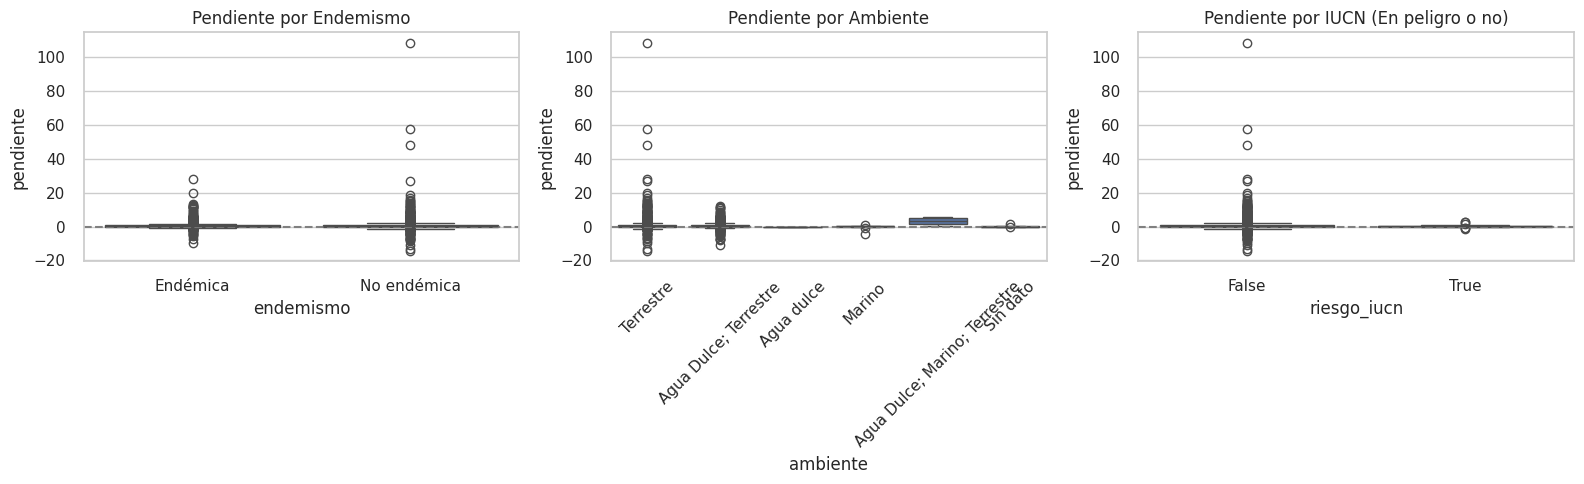

H1 - Endémica vs No endémica:     t = -1.3762, p = 0.1689
H2 - Agua dulce vs otros:         t = -2.3045, p = 0.0213
H3a - NOM-059 peligro vs otras:   t = -1.8419, p = 0.0656
H3b - IUCN peligro/crítico vs otras: t = -1.0906, p = 0.2756


In [132]:
df_hipotesis = df_tendencias.merge(df_5, left_on='especie', right_index=True)

df_hipotesis['endemismo'] = df_hipotesis['endemismo'].str.strip()
df_hipotesis['ambiente'] = df_hipotesis['ambiente'].str.strip()
df_hipotesis['nom059'] = df_hipotesis['nom059'].str.strip()
df_hipotesis['iucn'] = df_hipotesis['iucn'].str.strip()

endemico = df_hipotesis[df_hipotesis['endemismo'] == 'Endémica']['pendiente']
no_endemico = df_hipotesis[df_hipotesis['endemismo'] != 'Endémica']['pendiente']
t_end, p_end = ttest_ind(endemico, no_endemico, nan_policy='omit')

agua_dulce = df_hipotesis[df_hipotesis['ambiente'].str.contains('dulce', case=False, na=False)]['pendiente']
otros_ambientes = df_hipotesis[~df_hipotesis['ambiente'].str.contains('dulce', case=False, na=False)]['pendiente']
t_amb, p_amb = ttest_ind(agua_dulce, otros_ambientes, nan_policy='omit')

nom_peligro = df_hipotesis[df_hipotesis['nom059'].str.contains('peligro', case=False, na=False)]['pendiente']
nom_otras = df_hipotesis[~df_hipotesis['nom059'].str.contains('peligro', case=False, na=False)]['pendiente']
t_nom, p_nom = ttest_ind(nom_peligro, nom_otras, nan_policy='omit')

iucn_riesgo = df_hipotesis[df_hipotesis['iucn'].str.contains('en peligro|crítico', case=False, na=False)]['pendiente']
iucn_otras = df_hipotesis[~df_hipotesis['iucn'].str.contains('en peligro|crítico', case=False, na=False)]['pendiente']
t_iucn, p_iucn = ttest_ind(iucn_riesgo, iucn_otras, nan_policy='omit')

sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_hipotesis, x='endemismo', y='pendiente')
plt.title("Pendiente por Endemismo")
plt.axhline(0, linestyle='--', color='gray')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_hipotesis, x='ambiente', y='pendiente')
plt.title("Pendiente por Ambiente")
plt.xticks(rotation=45)
plt.axhline(0, linestyle='--', color='gray')

plt.subplot(1, 3, 3)
df_hipotesis['riesgo_iucn'] = df_hipotesis['iucn'].str.contains('en peligro|crítico', case=False, na=False)
sns.boxplot(data=df_hipotesis, x='riesgo_iucn', y='pendiente')
plt.title("Pendiente por IUCN (En peligro o no)")
plt.axhline(0, linestyle='--', color='gray')

plt.tight_layout()
plt.show()

print("H1 - Endémica vs No endémica:     t = {:.4f}, p = {:.4f}".format(t_end, p_end))
print("H2 - Agua dulce vs otros:         t = {:.4f}, p = {:.4f}".format(t_amb, p_amb))
print("H3a - NOM-059 peligro vs otras:   t = {:.4f}, p = {:.4f}".format(t_nom, p_nom))
print("H3b - IUCN peligro/crítico vs otras: t = {:.4f}, p = {:.4f}".format(t_iucn, p_iucn))
